# EDA and Data Cleansing

In [1]:
import pyodbc
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
### Using the ODBC:
driver_name = "SQL Server Native Client 11.0"
server = "ITZIK\SQLEXPRESS"
dbname = "BoxOffice"

In [4]:
conn = pyodbc.connect('Driver={};'
                      'Server={};'
                      'Database={};'
                      'Trusted_Connection=yes;'.format(driver_name, server, dbname))




df_movies = pd.read_sql_query('SELECT * FROM dsuser01.final_movies',conn)

In [5]:
df_movies.head()

id    budget  homepage original_language  popularity popularity_cat  \
0   1  14000000         0                en    6.575393           High   
1   2  40000000         0                en    8.248895           High   
2   3   3300000         1                en   64.299988         Superb   
3   4   1200000         1                hi    3.174936         Medium   
4   5         0         0                ko    1.148070            Low   

  release_date  year  month  runtime  ...  TV Movie  War  Western  lang_cnt  \
0      2/20/15  2015      2     93.0  ...       0.0  0.0      0.0       1.0   
1       8/6/04  2004      8    113.0  ...       0.0  0.0      0.0       1.0   
2     10/10/14  2014     10    105.0  ...       0.0  0.0      0.0       1.0   
3       3/9/12  2012      3    122.0  ...       0.0  0.0      0.0       2.0   
4       2/5/09  2009      2    118.0  ...       0.0  0.0      0.0       1.0   

   performance_lead_actor  female_actor_count  male_actor_count  \
0                     1.0                 5.0              11.0   
1                    10.0                 3.0               9.0   
2                     6.0                 8.0              19.0   
3                     1.0                 0.0               6.0   
4                     1.0                 1.0               3.0   

   unkown_gender_actor_count  country_cnt  cnt_crew  
0                        0.0          1.0      72.0  
1                        0.0          1.0       9.0  
2                        0.0          1.0      64.0  
3                        0.0          1.0       3.0  
4                        0.0          1.0       2.0  

[5 rows x 39 columns]

In [6]:
df_movies.to_csv("movies.csv")

# PART 2 - Exploratory data analysis

## 1- Descriptive Statistics

In [7]:
df_movies.shape

(7398, 39)

In [8]:
df_movies.describe()

id        budget     homepage    popularity         year  \
count  7398.000000  7.398000e+03  7398.000000  7.398000e+03  7398.000000   
mean   3698.996215  2.260957e+07     0.319951  8.516580e+00  2001.218167   
std    2136.171952  3.695030e+07     0.466489  1.216546e+01    14.005908   
min       1.000000  0.000000e+00     0.000000  1.000000e-06  1950.000000   
25%    1849.250000  0.000000e+00     0.000000  3.934017e+00  1993.000000   
50%    3698.500000  7.500000e+06     0.000000  7.436379e+00  2005.000000   
75%    5548.750000  2.800000e+07     1.000000  1.092110e+01  2011.000000   
max    7398.000000  3.800000e+08     1.000000  5.474883e+02  2049.000000   

             month      runtime       revenue  best_seller       Action  ...  \
count  7398.000000  7392.000000  3.001000e+03  7398.000000  7375.000000  ...   
mean      6.843606   107.723350  6.680810e+07     0.925656     0.235254  ...   
std       3.386588    21.481395  1.375832e+08     0.262348     0.424186  ...   
min       1.000000     0.000000  1.000000e+00     0.000000     0.000000  ...   
25%       4.000000    94.000000  2.387127e+06     1.000000     0.000000  ...   
50%       7.000000   104.000000  1.681038e+07     1.000000     0.000000  ...   
75%      10.000000   118.000000  6.892915e+07     1.000000     0.000000  ...   
max      12.000000   338.000000  1.519558e+09     1.000000     1.000000  ...   

          TV Movie          War      Western     lang_cnt  \
count  7375.000000  7375.000000  7375.000000  7337.000000   
mean      0.000136     0.032949     0.015864     1.458225   
std       0.011644     0.178516     0.124959     0.888053   
min       0.000000     0.000000     0.000000     1.000000   
25%       0.000000     0.000000     0.000000     1.000000   
50%       0.000000     0.000000     0.000000     1.000000   
75%       0.000000     0.000000     0.000000     2.000000   
max       1.000000     1.000000     1.000000     9.000000   

       performance_lead_actor  female_actor_count  male_actor_count  \
count             7069.000000         7330.000000       7330.000000   
mean                 7.932805            3.232879          8.900409   
std                  8.778681            2.699319          5.759937   
min                  1.000000            0.000000          0.000000   
25%                  1.000000            1.000000          6.000000   
50%                  4.000000            3.000000          8.000000   
75%                 11.000000            4.000000         10.000000   
max                 40.000000           21.000000         56.000000   

       unkown_gender_actor_count  country_cnt     cnt_crew  
count                7330.000000  7242.000000  7361.000000  
mean                    0.086085     1.361640    24.405651  
std                     0.449174     0.773817    28.159109  
min                     0.000000     1.000000     1.000000  
25%                     0.000000     1.000000     8.000000  
50%                     0.000000     1.000000    14.000000  
75%                     0.000000     1.000000    28.000000  
max                    10.000000    12.000000   194.000000  

[8 rows x 36 columns]

In [9]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 39 columns):
id                           7398 non-null int64
budget                       7398 non-null int64
homepage                     7398 non-null int64
original_language            7398 non-null object
popularity                   7398 non-null float64
popularity_cat               7398 non-null object
release_date                 7398 non-null object
year                         7398 non-null int64
month                        7398 non-null int64
runtime                      7392 non-null float64
revenue                      3001 non-null float64
best_seller                  7398 non-null int64
Action                       7375 non-null float64
Adventure                    7375 non-null float64
Animation                    7375 non-null float64
Comedy                       7375 non-null float64
Crime                        7375 non-null float64
Documentary                  7375 non-nul

In [10]:
print(df_movies.isnull().sum())

id                              0
budget                          0
homepage                        0
original_language               0
popularity                      0
popularity_cat                  0
release_date                    0
year                            0
month                           0
runtime                         6
revenue                      4397
best_seller                     0
Action                         23
Adventure                      23
Animation                      23
Comedy                         23
Crime                          23
Documentary                    23
Drama                          23
Family                         23
Fantasy                        23
Foreign                        23
History                        23
Horror                         23
Music                          23
Mystery                        23
Romance                        23
Science Fiction                23
Thriller                       23
TV Movie      

### fixing the variables year and release_date

In [11]:
dict_count_years = df_movies['year'].value_counts().to_dict()
for key in sorted(dict_count_years):
    print("%s: %s" % (key, dict_count_years[key]))

1950: 6
1951: 10
1952: 7
1953: 11
1954: 14
1955: 10
1956: 13
1957: 7
1958: 8
1959: 10
1960: 14
1961: 16
1962: 15
1963: 15
1964: 14
1965: 12
1966: 15
1967: 24
1968: 23
1969: 15
1970: 23
1971: 20
1972: 16
1973: 23
1974: 19
1975: 26
1976: 22
1977: 29
1978: 43
1979: 40
1980: 59
1981: 65
1982: 67
1983: 80
1984: 78
1985: 94
1986: 103
1987: 112
1988: 132
1989: 102
1990: 104
1991: 116
1992: 116
1993: 139
1994: 124
1995: 134
1996: 138
1997: 158
1998: 152
1999: 159
2000: 155
2001: 177
2002: 199
2003: 180
2004: 209
2005: 236
2006: 281
2007: 258
2008: 266
2009: 284
2010: 306
2011: 311
2012: 305
2013: 335
2014: 320
2015: 312
2016: 300
2017: 98
2018: 1
2021: 1
2022: 1
2023: 1
2024: 1
2025: 6
2026: 2
2027: 3
2028: 5
2029: 1
2030: 2
2031: 4
2032: 3
2033: 6
2034: 3
2035: 5
2036: 6
2037: 2
2038: 3
2039: 6
2040: 5
2041: 6
2042: 6
2043: 2
2044: 7
2045: 6
2046: 4
2047: 2
2048: 9
2049: 5


In [12]:
df_movies['fixed_year']= df_movies['year'].apply(lambda x: x if x<=2020  else x-100)

In [13]:
df_movies['fixed_year']

0       2015
1       2004
2       2014
3       2012
4       2009
        ... 
7393    2001
7394    2004
7395    1982
7396    2015
7397    1962
Name: fixed_year, Length: 7398, dtype: int64

In [14]:
dict_count_years = df_movies['fixed_year'].value_counts().to_dict()
for key in sorted(dict_count_years):
    print("%s: %s" % (key, dict_count_years[key]))

1921: 1
1922: 1
1923: 1
1924: 1
1925: 6
1926: 2
1927: 3
1928: 5
1929: 1
1930: 2
1931: 4
1932: 3
1933: 6
1934: 3
1935: 5
1936: 6
1937: 2
1938: 3
1939: 6
1940: 5
1941: 6
1942: 6
1943: 2
1944: 7
1945: 6
1946: 4
1947: 2
1948: 9
1949: 5
1950: 6
1951: 10
1952: 7
1953: 11
1954: 14
1955: 10
1956: 13
1957: 7
1958: 8
1959: 10
1960: 14
1961: 16
1962: 15
1963: 15
1964: 14
1965: 12
1966: 15
1967: 24
1968: 23
1969: 15
1970: 23
1971: 20
1972: 16
1973: 23
1974: 19
1975: 26
1976: 22
1977: 29
1978: 43
1979: 40
1980: 59
1981: 65
1982: 67
1983: 80
1984: 78
1985: 94
1986: 103
1987: 112
1988: 132
1989: 102
1990: 104
1991: 116
1992: 116
1993: 139
1994: 124
1995: 134
1996: 138
1997: 158
1998: 152
1999: 159
2000: 155
2001: 177
2002: 199
2003: 180
2004: 209
2005: 236
2006: 281
2007: 258
2008: 266
2009: 284
2010: 306
2011: 311
2012: 305
2013: 335
2014: 320
2015: 312
2016: 300
2017: 98
2018: 1


In [15]:
df_movies['release_date2'] = pd.to_datetime(df_movies['release_date'])
df_movies[['release_date','release_date2']]

release_date release_date2
0         2/20/15    2015-02-20
1          8/6/04    2004-08-06
2        10/10/14    2014-10-10
3          3/9/12    2012-03-09
4          2/5/09    2009-02-05
...           ...           ...
7393       8/3/01    2001-08-03
7394      8/20/04    2004-08-20
7395      12/8/82    1982-12-08
7396       2/4/15    2015-02-04
7397      9/20/62    2062-09-20

[7398 rows x 2 columns]

In [16]:
from dateutil.relativedelta import relativedelta

df_movies['fixed_release_date'] = df_movies['release_date2'].apply(lambda x: x if x.year<=2020 else x - relativedelta(years=100))
df_movies[['release_date','release_date2', 'fixed_release_date']]

release_date release_date2 fixed_release_date
0         2/20/15    2015-02-20         2015-02-20
1          8/6/04    2004-08-06         2004-08-06
2        10/10/14    2014-10-10         2014-10-10
3          3/9/12    2012-03-09         2012-03-09
4          2/5/09    2009-02-05         2009-02-05
...           ...           ...                ...
7393       8/3/01    2001-08-03         2001-08-03
7394      8/20/04    2004-08-20         2004-08-20
7395      12/8/82    1982-12-08         1982-12-08
7396       2/4/15    2015-02-04         2015-02-04
7397      9/20/62    2062-09-20         1962-09-20

[7398 rows x 3 columns]

In [17]:
df_movies[['release_date','release_date2', 'fixed_release_date']].describe()

release_date        release_date2   fixed_release_date
count          7398                 7398                 7398
unique         4703                 4703                 4703
top         9/10/10  2010-09-10 00:00:00  2010-09-10 00:00:00
freq             10                   10                   10
first           NaN  1971-01-15 00:00:00  1921-01-21 00:00:00
last            NaN  2070-12-23 00:00:00  2018-08-01 00:00:00

In [18]:
df_movies.head()

id    budget  homepage original_language  popularity popularity_cat  \
0   1  14000000         0                en    6.575393           High   
1   2  40000000         0                en    8.248895           High   
2   3   3300000         1                en   64.299988         Superb   
3   4   1200000         1                hi    3.174936         Medium   
4   5         0         0                ko    1.148070            Low   

  release_date  year  month  runtime  ...  lang_cnt  performance_lead_actor  \
0      2/20/15  2015      2     93.0  ...       1.0                     1.0   
1       8/6/04  2004      8    113.0  ...       1.0                    10.0   
2     10/10/14  2014     10    105.0  ...       1.0                     6.0   
3       3/9/12  2012      3    122.0  ...       2.0                     1.0   
4       2/5/09  2009      2    118.0  ...       1.0                     1.0   

   female_actor_count  male_actor_count  unkown_gender_actor_count  \
0                 5.0              11.0                        0.0   
1                 3.0               9.0                        0.0   
2                 8.0              19.0                        0.0   
3                 0.0               6.0                        0.0   
4                 1.0               3.0                        0.0   

   country_cnt  cnt_crew  fixed_year  release_date2  fixed_release_date  
0          1.0      72.0        2015     2015-02-20          2015-02-20  
1          1.0       9.0        2004     2004-08-06          2004-08-06  
2          1.0      64.0        2014     2014-10-10          2014-10-10  
3          1.0       3.0        2012     2012-03-09          2012-03-09  
4          1.0       2.0        2009     2009-02-05          2009-02-05  

[5 rows x 42 columns]

In [19]:
df_movies.drop(['release_date', 'year', 'release_date2'], axis=1, inplace=True)
df_movies.head()

id    budget  homepage original_language  popularity popularity_cat  month  \
0   1  14000000         0                en    6.575393           High      2   
1   2  40000000         0                en    8.248895           High      8   
2   3   3300000         1                en   64.299988         Superb     10   
3   4   1200000         1                hi    3.174936         Medium      3   
4   5         0         0                ko    1.148070            Low      2   

   runtime     revenue  best_seller  ...  Western  lang_cnt  \
0     93.0  12314651.0            1  ...      0.0       1.0   
1    113.0  95149435.0            1  ...      0.0       1.0   
2    105.0  13092000.0            1  ...      0.0       1.0   
3    122.0  16000000.0            1  ...      0.0       2.0   
4    118.0   3923970.0            1  ...      0.0       1.0   

   performance_lead_actor  female_actor_count  male_actor_count  \
0                     1.0                 5.0              11.0   
1                    10.0                 3.0               9.0   
2                     6.0                 8.0              19.0   
3                     1.0                 0.0               6.0   
4                     1.0                 1.0               3.0   

   unkown_gender_actor_count  country_cnt  cnt_crew  fixed_year  \
0                        0.0          1.0      72.0        2015   
1                        0.0          1.0       9.0        2004   
2                        0.0          1.0      64.0        2014   
3                        0.0          1.0       3.0        2012   
4                        0.0          1.0       2.0        2009   

   fixed_release_date  
0          2015-02-20  
1          2004-08-06  
2          2014-10-10  
3          2012-03-09  
4          2009-02-05  

[5 rows x 39 columns]

### 2- Distribution of variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CA0253A08>,
      dtype=object)

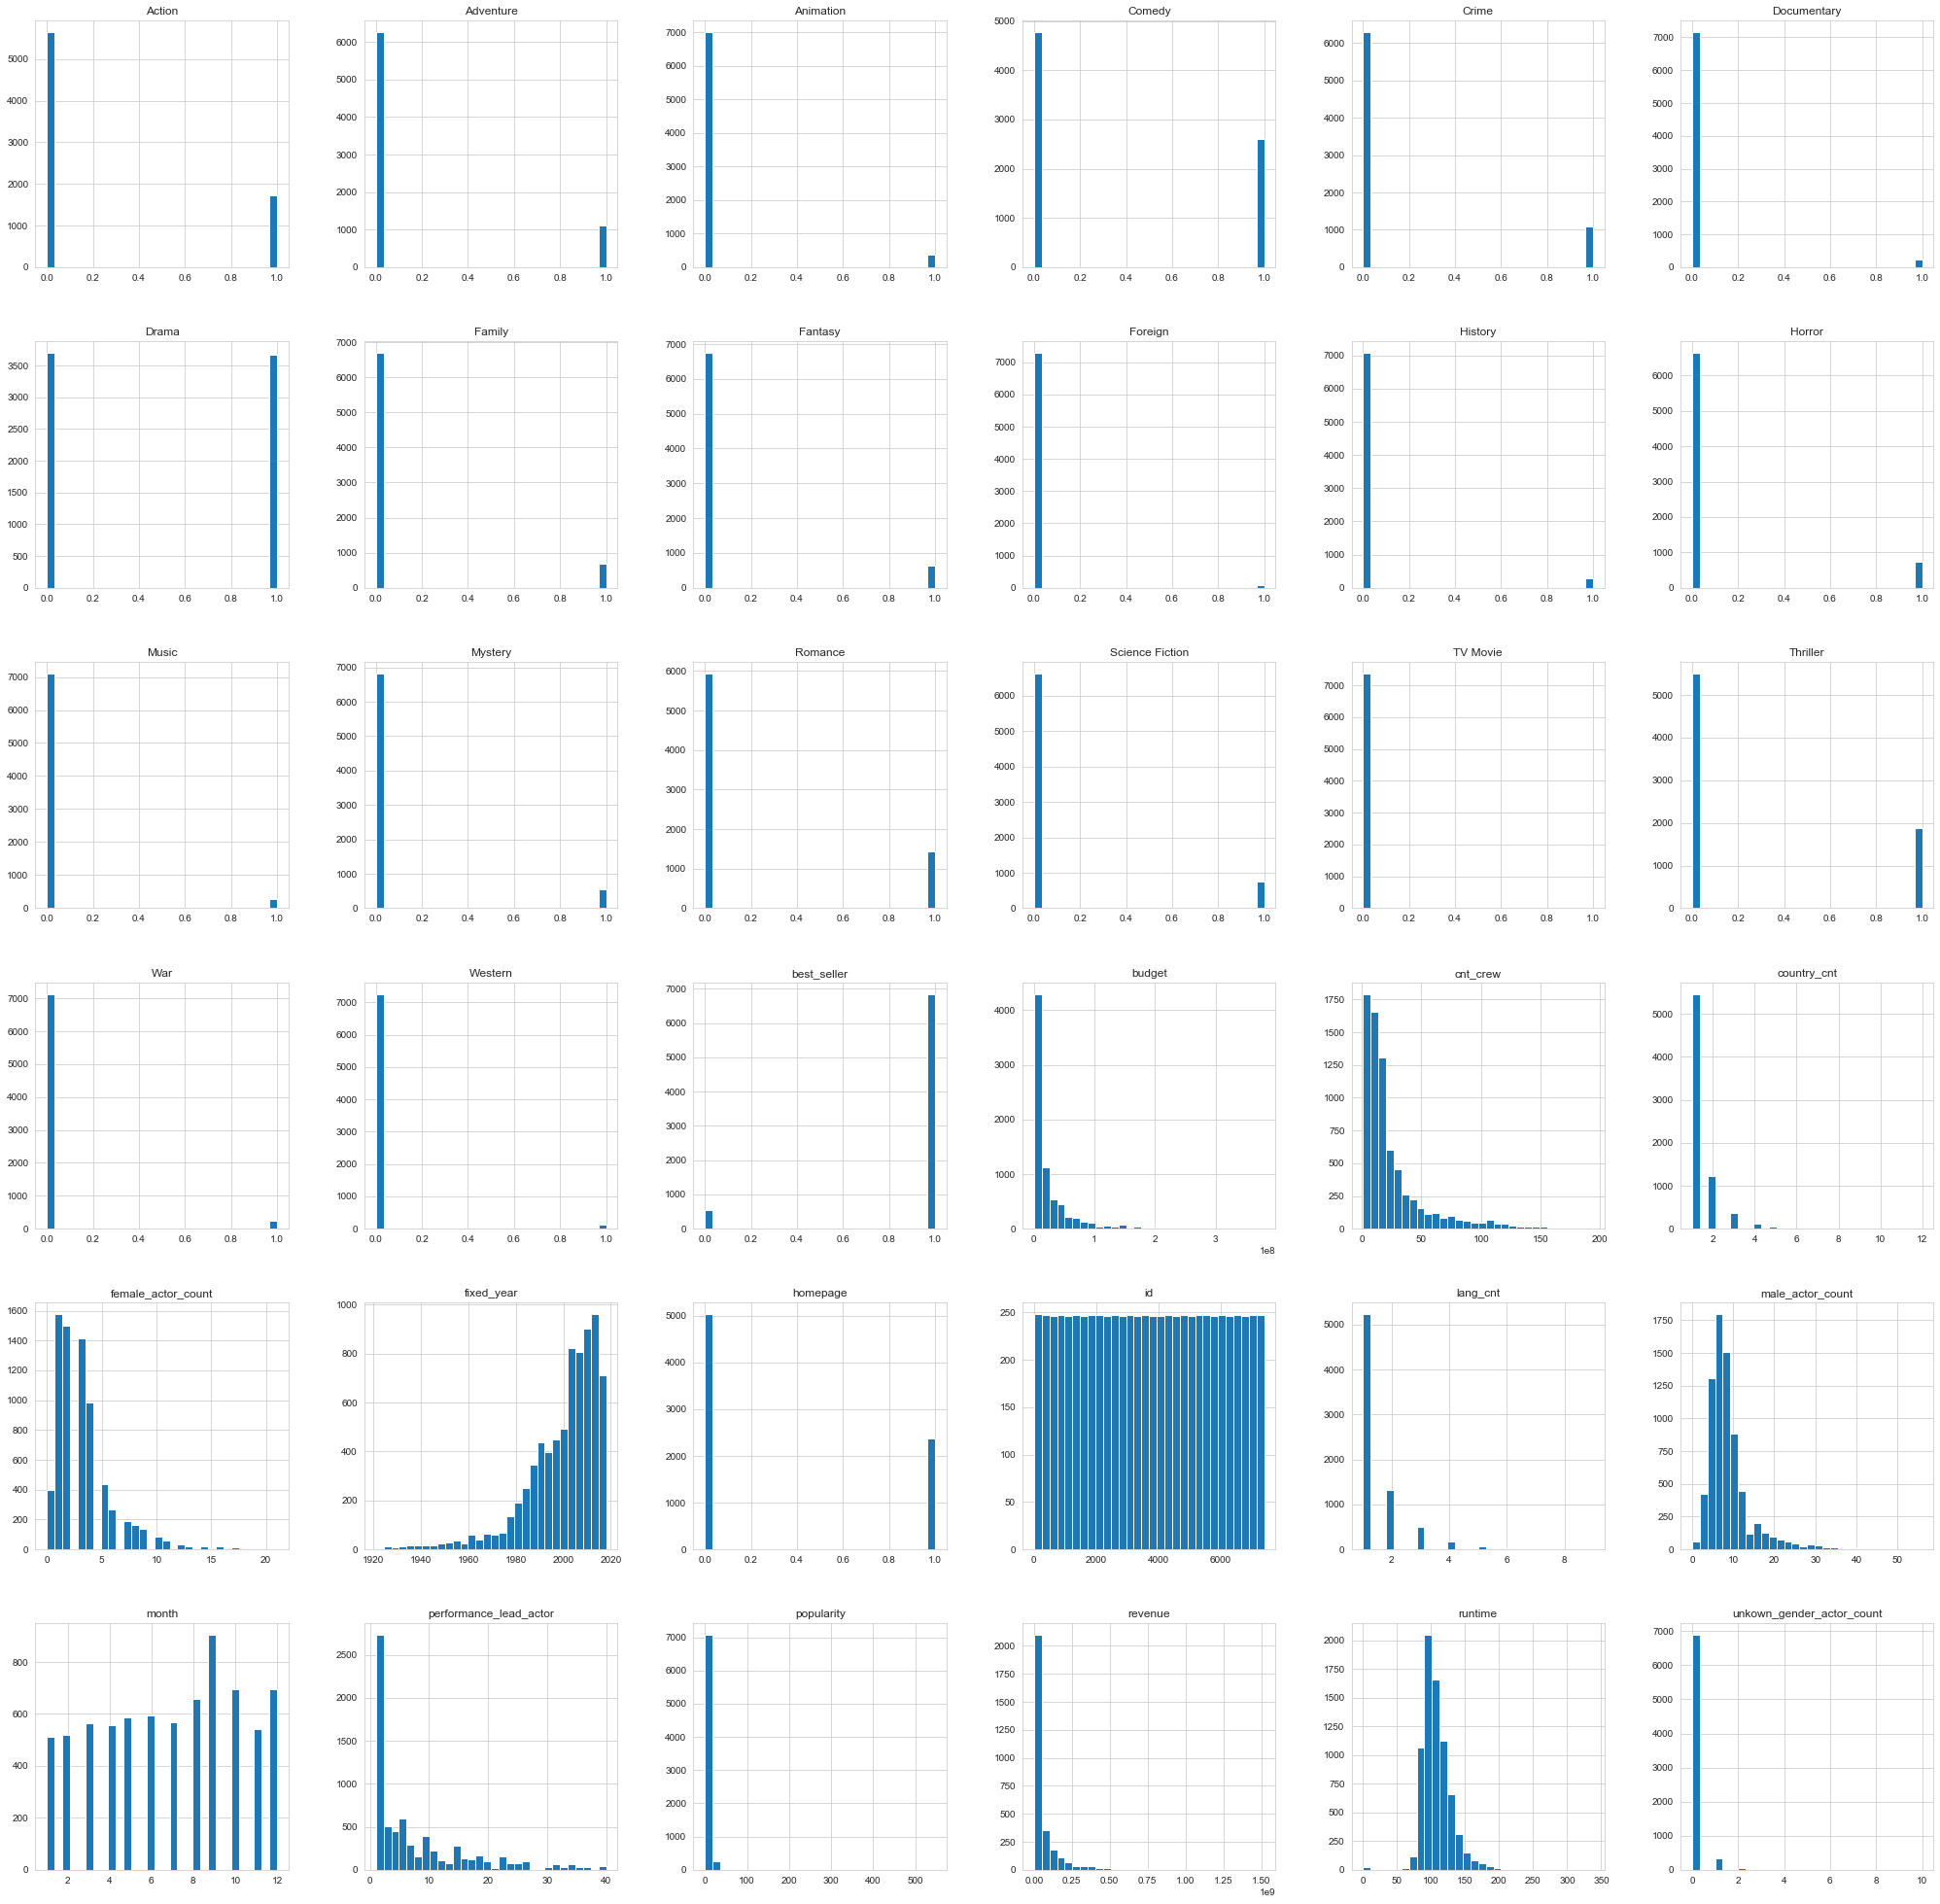

In [20]:
df_movies.hist(bins=30, figsize=(35, 35))

## 3- correlation matrix

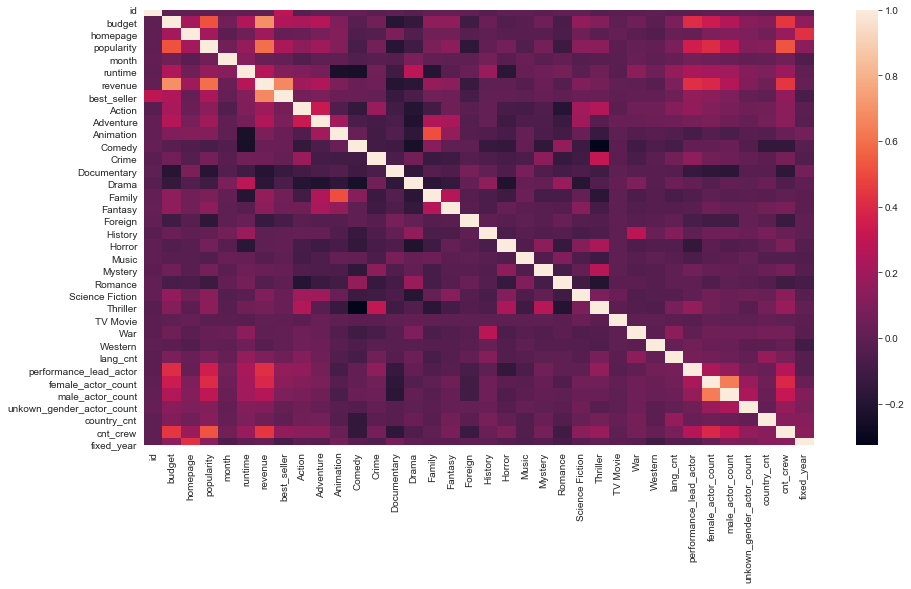

In [21]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df_movies.corr(method='spearman'))

In [22]:
corr = df_movies.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm', axis=None)

In [23]:
def get_dict_of_df_types(pdf):
    d_of_columns_types = {}

    for c,t in zip(pdf.columns, pdf.dtypes):
        t_str = str(t)
        if d_of_columns_types.get(t_str) == None:
            d_of_columns_types[t_str] = [c]
        else:
            d_of_columns_types[t_str].append(c)
    return d_of_columns_types

In [24]:
d_of_columns_types_local = get_dict_of_df_types(df_movies)
d_of_columns_types_local

{'int64': ['id', 'budget', 'homepage', 'month', 'best_seller', 'fixed_year'],
 'object': ['original_language', 'popularity_cat'],
 'float64': ['popularity',
  'runtime',
  'revenue',
  'Action',
  'Adventure',
  'Animation',
  'Comedy',
  'Crime',
  'Documentary',
  'Drama',
  'Family',
  'Fantasy',
  'Foreign',
  'History',
  'Horror',
  'Music',
  'Mystery',
  'Romance',
  'Science Fiction',
  'Thriller',
  'TV Movie',
  'War',
  'Western',
  'lang_cnt',
  'performance_lead_actor',
  'female_actor_count',
  'male_actor_count',
  'unkown_gender_actor_count',
  'country_cnt',
  'cnt_crew'],
 'datetime64[ns]': ['fixed_release_date']}

In [25]:
from scipy import stats
from itertools import combinations


def my_spearmanr(df, x1, x2):
    """
    
    """
    df_sub = df[[x1,x2]].dropna(axis=0, inplace=False)
    return stats.spearmanr(df_sub[x1],df_sub[x2])
   

def all_numric_correlations(df, numeric_columns_list):
    
    """
    res = list(combinations(['a' ,'b', 'c'], 2))
    res = [('a', 'b'), ('a', 'c'), ('b', 'c')]
    """
    numeric_combinations_list = list(combinations(numeric_columns_list, 2))
    results_list = []
    for col1, col2 in numeric_combinations_list:
        my_spearmanr_res = my_spearmanr(df, col1, col2)
        results_list.append({"var1": col1, "var2": col2, "correlation": my_spearmanr_res[0], "pvalue": my_spearmanr_res[1]})
    
    df_results = pd.DataFrame(results_list)
    return df_results



In [26]:
numeric_columns_list = d_of_columns_types_local['float64'] + ['budget']

df_numric_correlations = all_numric_correlations(df_movies,numeric_columns_list)
df_numric_correlations

var1       var2  correlation         pvalue
0                   popularity    runtime     0.171559   6.185070e-50
1                   popularity    revenue     0.596408  1.296824e-288
2                   popularity     Action     0.139574   2.105406e-33
3                   popularity  Adventure     0.197057   1.829259e-65
4                   popularity  Animation     0.113509   1.401808e-22
..                         ...        ...          ...            ...
460  unkown_gender_actor_count   cnt_crew     0.162384   1.859429e-44
461  unkown_gender_actor_count     budget     0.126085   2.318226e-27
462                country_cnt   cnt_crew     0.127212   2.129708e-27
463                country_cnt     budget     0.109193   1.179094e-20
464                   cnt_crew     budget     0.443574   0.000000e+00

[465 rows x 4 columns]

### 4- Revenue - Target variable

In [27]:
#percent missing in variable revenue:
percent_missing_revenue = df_movies.revenue.isnull().sum() * 100 / len(df_movies)
percent_missing_revenue

59.43498242768316

C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


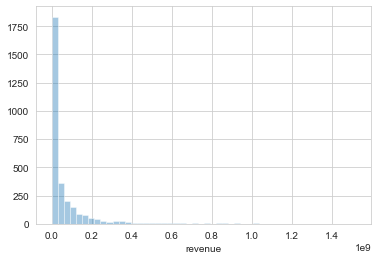

In [28]:
sns.distplot(df_movies['revenue'], kde=False, bins=50)

In [29]:
# df_movies['log_revenue']=np.log(df_movies['revenue'])

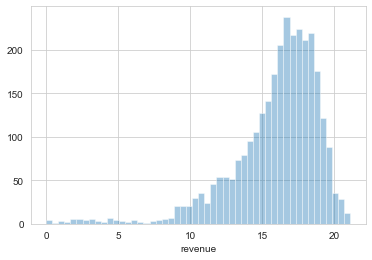

In [30]:
sns.distplot(np.log(df_movies['revenue']), kde=False, bins=50)

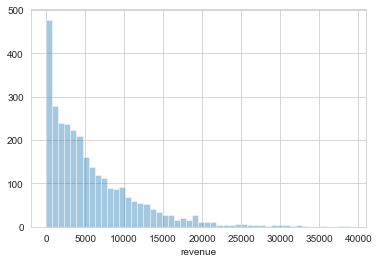

In [31]:
sns.distplot(np.sqrt(df_movies['revenue']), kde=False, bins=50)

In [32]:
category_cols = ['homepage','original_language', 'popularity_cat' , 'best_seller', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'TV Movie', 'War',
       'Western']

for col in category_cols:
    df_movies[col] = df_movies[col].astype('category')

df_movies.dtypes

id                                    int64
budget                                int64
homepage                           category
original_language                  category
popularity                          float64
popularity_cat                     category
month                                 int64
runtime                             float64
revenue                             float64
best_seller                        category
Action                             category
Adventure                          category
Animation                          category
Comedy                             category
Crime                              category
Documentary                        category
Drama                              category
Family                             category
Fantasy                            category
Foreign                            category
History                            category
Horror                             category
Music                           

In [33]:
df_movies.describe(include='all')

id        budget  homepage original_language    popularity  \
count   7398.000000  7.398000e+03    7398.0              7398  7.398000e+03   
unique          NaN           NaN       2.0                44           NaN   
top             NaN           NaN       0.0                en           NaN   
freq            NaN           NaN    5031.0              6351           NaN   
first           NaN           NaN       NaN               NaN           NaN   
last            NaN           NaN       NaN               NaN           NaN   
mean    3698.996215  2.260957e+07       NaN               NaN  8.516580e+00   
std     2136.171952  3.695030e+07       NaN               NaN  1.216546e+01   
min        1.000000  0.000000e+00       NaN               NaN  1.000000e-06   
25%     1849.250000  0.000000e+00       NaN               NaN  3.934017e+00   
50%     3698.500000  7.500000e+06       NaN               NaN  7.436379e+00   
75%     5548.750000  2.800000e+07       NaN               NaN  1.092110e+01   
max     7398.000000  3.800000e+08       NaN               NaN  5.474883e+02   

       popularity_cat        month      runtime       revenue  best_seller  \
count            7398  7398.000000  7392.000000  3.001000e+03       7398.0   
unique              4          NaN          NaN           NaN          2.0   
top            Superb          NaN          NaN           NaN          1.0   
freq             2784          NaN          NaN           NaN       6848.0   
first             NaN          NaN          NaN           NaN          NaN   
last              NaN          NaN          NaN           NaN          NaN   
mean              NaN     6.843606   107.723350  6.680810e+07          NaN   
std               NaN     3.386588    21.481395  1.375832e+08          NaN   
min               NaN     1.000000     0.000000  1.000000e+00          NaN   
25%               NaN     4.000000    94.000000  2.387127e+06          NaN   
50%               NaN     7.000000   104.000000  1.681038e+07          NaN   
75%               NaN    10.000000   118.000000  6.892915e+07          NaN   
max               NaN    12.000000   338.000000  1.519558e+09          NaN   

        ...  Western     lang_cnt  performance_lead_actor  female_actor_count  \
count   ...   7375.0  7337.000000             7069.000000         7330.000000   
unique  ...      2.0          NaN                     NaN                 NaN   
top     ...      0.0          NaN                     NaN                 NaN   
freq    ...   7258.0          NaN                     NaN                 NaN   
first   ...      NaN          NaN                     NaN                 NaN   
last    ...      NaN          NaN                     NaN                 NaN   
mean    ...      NaN     1.458225                7.932805            3.232879   
std     ...      NaN     0.888053                8.778681            2.699319   
min     ...      NaN     1.000000                1.000000            0.000000   
25%     ...      NaN     1.000000                1.000000            1.000000   
50%     ...      NaN     1.000000                4.000000            3.000000   
75%     ...      NaN     2.000000               11.000000            4.000000   
max     ...      NaN     9.000000               40.000000           21.000000   

        male_actor_count  unkown_gender_actor_count  country_cnt     cnt_crew  \
count        7330.000000                7330.000000  7242.000000  7361.000000   
unique               NaN                        NaN          NaN          NaN   
top                  NaN                        NaN          NaN          NaN   
freq                 NaN                        NaN          NaN          NaN   
first                NaN                        NaN          NaN          NaN   
last                 NaN                        NaN          NaN          NaN   
mean            8.900409                   0.086085     1.361640    24.405651   
std             5.759937          

In [34]:
def get_dict_of_df_types(pdf):
    d_of_columns_types = {}

    for c,t in zip(pdf.columns, pdf.dtypes):
        t_str = str(t)
        if d_of_columns_types.get(t_str) == None:
            d_of_columns_types[t_str] = [c]
        else:
            d_of_columns_types[t_str].append(c)
    return d_of_columns_types



In [35]:
d_of_columns_types_local = get_dict_of_df_types(df_movies)
d_of_columns_types_local

{'int64': ['id', 'budget', 'month', 'fixed_year'],
 'category': ['homepage',
  'original_language',
  'popularity_cat',
  'best_seller',
  'Action',
  'Adventure',
  'Animation',
  'Comedy',
  'Crime',
  'Documentary',
  'Drama',
  'Family',
  'Fantasy',
  'Foreign',
  'History',
  'Horror',
  'Music',
  'Mystery',
  'Romance',
  'Science Fiction',
  'Thriller',
  'TV Movie',
  'War',
  'Western'],
 'float64': ['popularity',
  'runtime',
  'revenue',
  'lang_cnt',
  'performance_lead_actor',
  'female_actor_count',
  'male_actor_count',
  'unkown_gender_actor_count',
  'country_cnt',
  'cnt_crew'],
 'datetime64[ns]': ['fixed_release_date']}

In [36]:
category_values = {}
category_dfs = {}
for x in d_of_columns_types_local['category']:
    category_values[x] = df_movies[x].value_counts().to_dict()
    category_value_list = list(category_values[x].keys())
    category_count_list = list(category_values[x].values())
    category_dfs[x] = pd.DataFrame({x: category_value_list, "count":category_count_list })
    display( category_dfs[x])


homepage  count
0         0   5031
1         1   2367

original_language  count
0                 en   6351
1                 fr    199
2                 hi    118
3                 ru    109
4                 es     95
5                 ja     90
6                 it     56
7                 de     49
8                 ko     49
9                 zh     46
10                cn     41
11                ta     31
12                sv     20
13                da     17
14                pt     13
15                ml     12
16                nl     11
17                te      9
18                ro      9
19                tr      9
20                he      6
21                fa      5
22                th      5
23                no      5
24                pl      5
25                fi      4
26                hu      4
27                el      3
28                bn      3
29                cs      3
30                sr      3
31                id      3
32                ur      2
33                xx      2
34                bm      2
35                is      1
36                vi      1
37                ka      1
38                kn      1
39                mr      1
40                ca      1
41                nb      1
42                ar      1
43                af      1

popularity_cat  count
0         Superb   2784
1           High   1794
2            Low   1516
3         Medium   1304

best_seller  count
0            1   6848
1            0    550

Action  count
0     0.0   5640
1     1.0   1735

Adventure  count
0        0.0   6259
1        1.0   1116

Animation  count
0        0.0   6993
1        1.0    382

Comedy  count
0     0.0   4770
1     1.0   2605

Crime  count
0    0.0   6291
1    1.0   1084

Documentary  count
0          0.0   7154
1          1.0    221

Drama  count
0    0.0   3699
1    1.0   3676

Family  count
0     0.0   6700
1     1.0    675

Fantasy  count
0      0.0   6747
1      1.0    628

Foreign  count
0      0.0   7291
1      1.0     84

History  count
0      0.0   7080
1      1.0    295

Horror  count
0     0.0   6640
1     1.0    735

Music  count
0    0.0   7108
1    1.0    267

Mystery  count
0      0.0   6825
1      1.0    550

Romance  count
0      0.0   5939
1      1.0   1436

Science Fiction  count
0              0.0   6631
1              1.0    744

Thriller  count
0       0.0   5506
1       1.0   1869

TV Movie  count
0       0.0   7374
1       1.0      1

War  count
0  0.0   7132
1  1.0    243

Western  count
0      0.0   7258
1      1.0    117

C:\Users\itzikjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\itzikjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\itzikjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `f

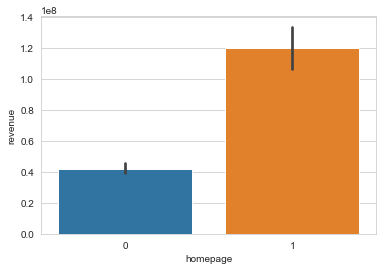

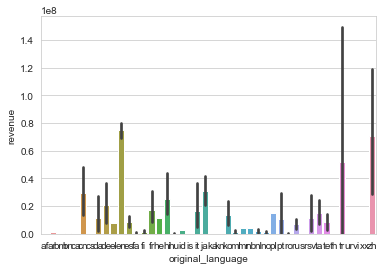

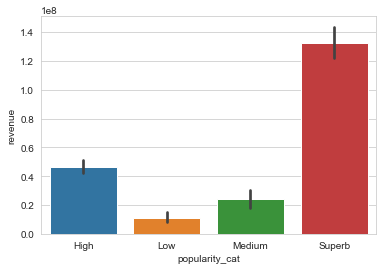

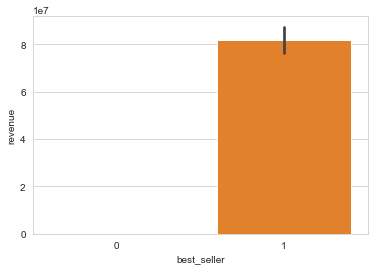

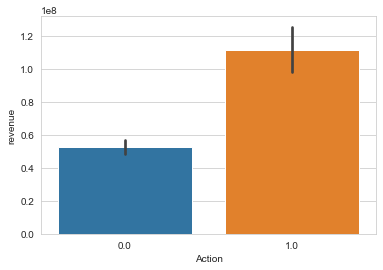

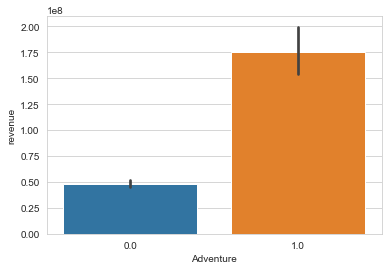

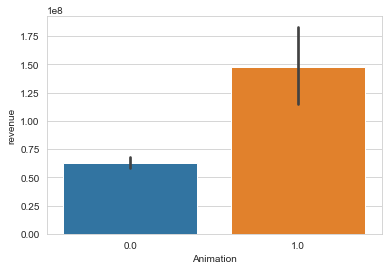

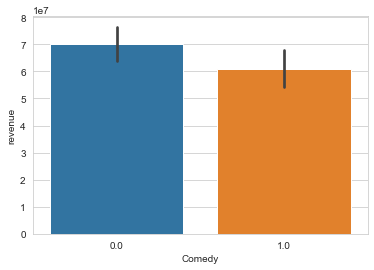

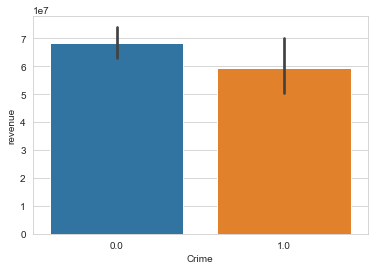

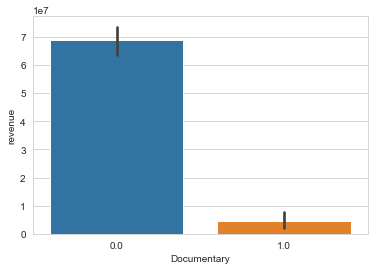

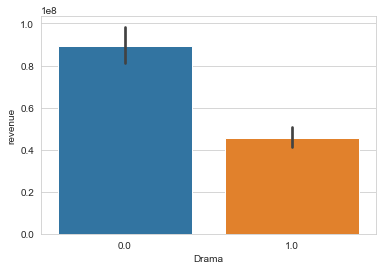

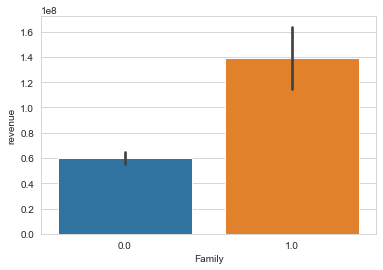

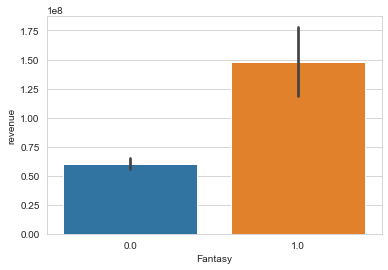

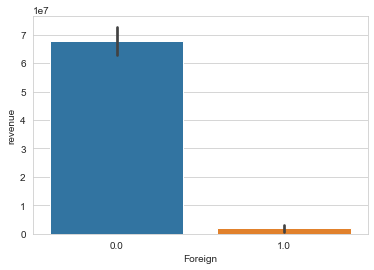

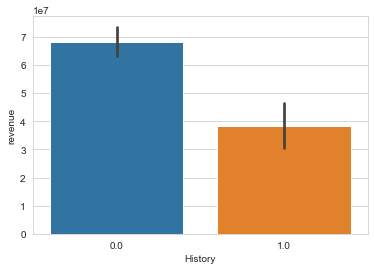

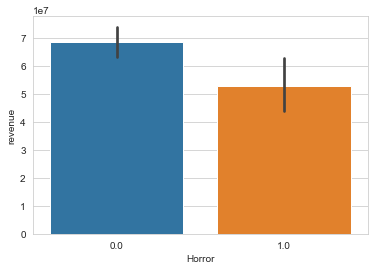

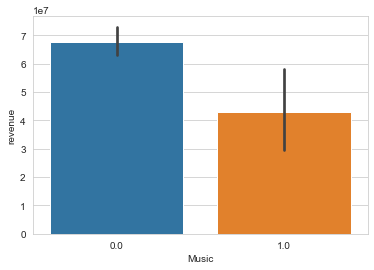

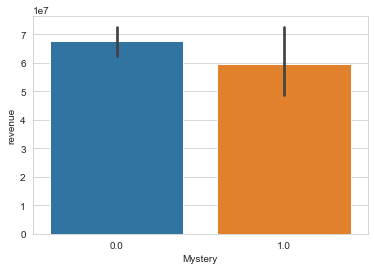

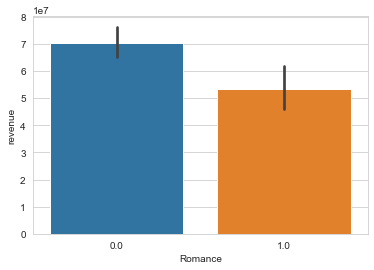

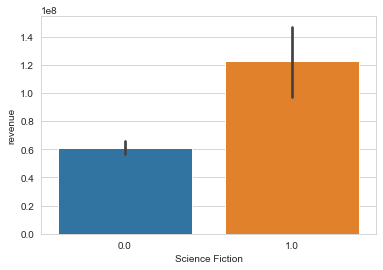

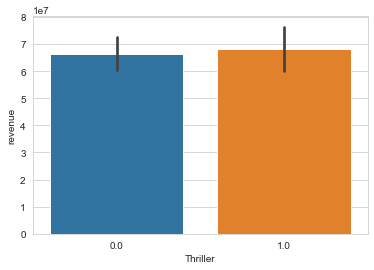

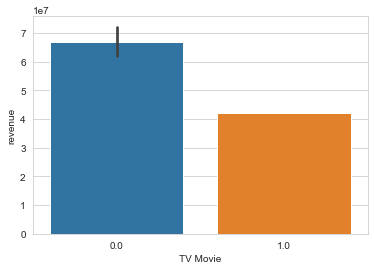

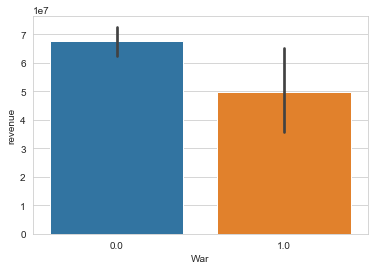

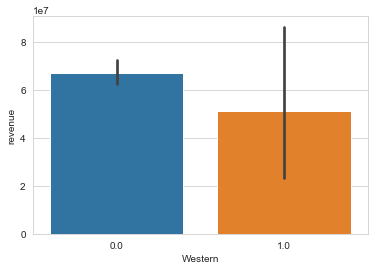

In [37]:
for x in d_of_columns_types_local['category']:
    plt.figure()
    sns.barplot(x=x, y='revenue', data=df_movies)

C:\Users\itzikjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\itzikjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\itzikjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `f

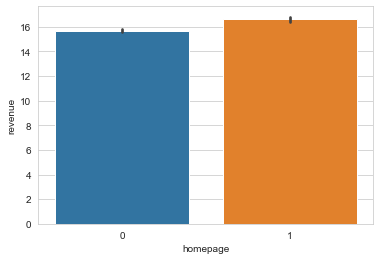

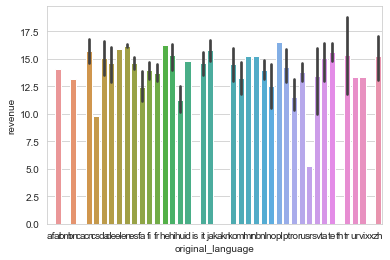

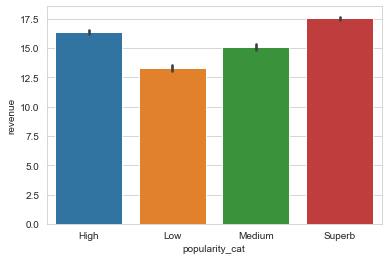

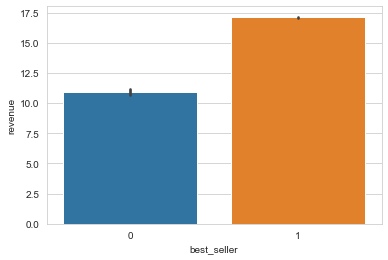

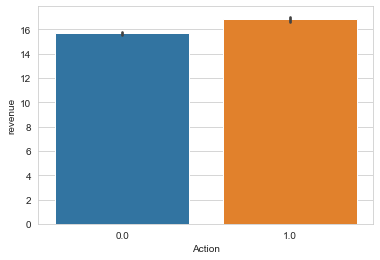

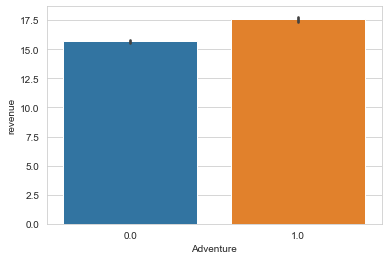

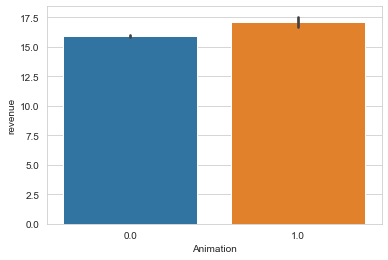

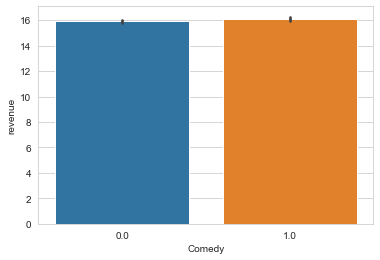

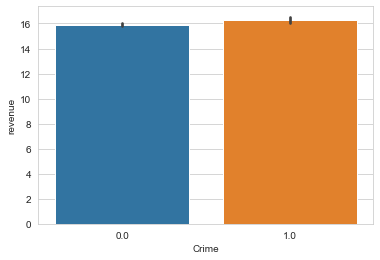

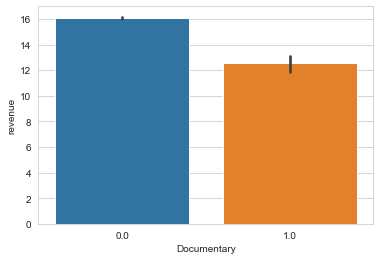

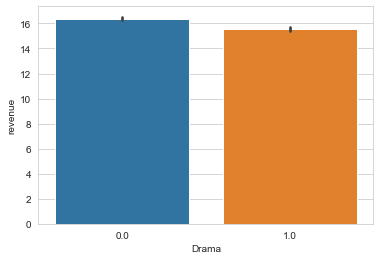

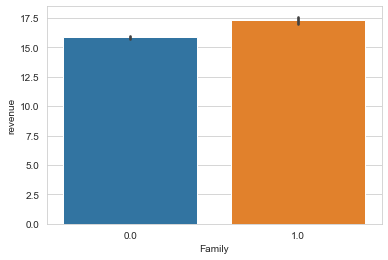

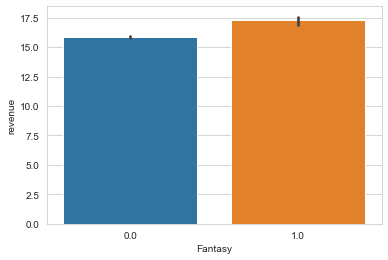

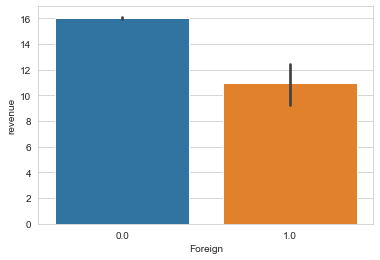

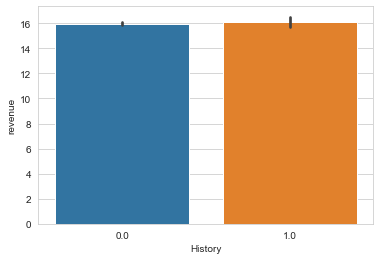

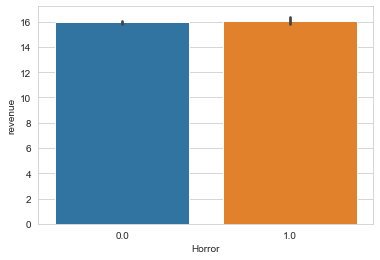

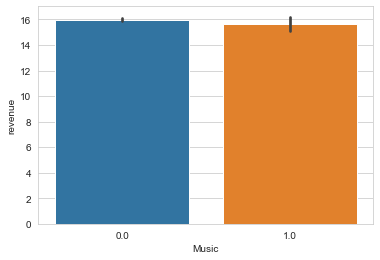

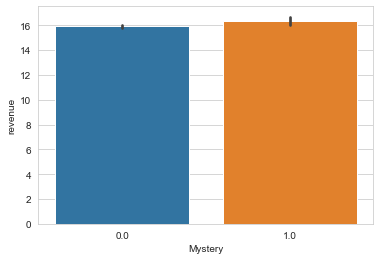

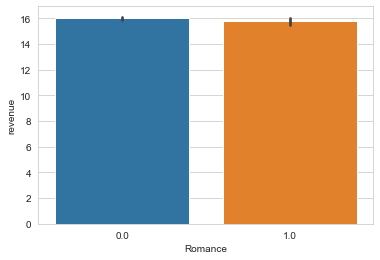

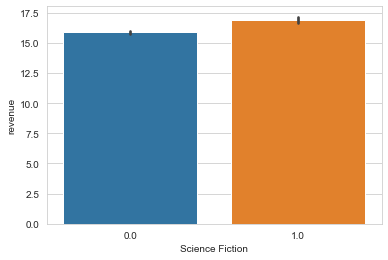

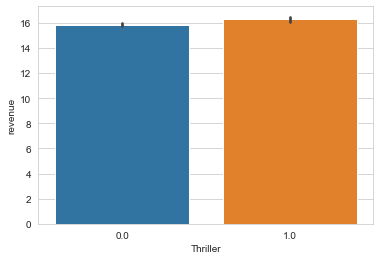

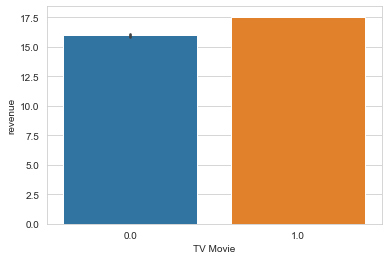

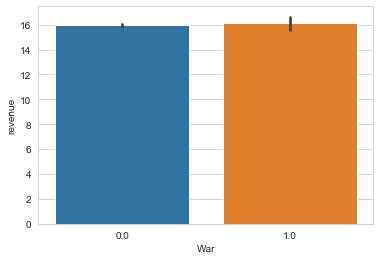

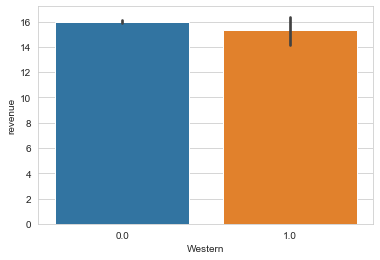

In [38]:
for x in d_of_columns_types_local['category']:
    plt.figure()
    sns.barplot(x=x, y=np.log(df_movies['revenue']), data=df_movies)

C:\Users\itzikjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\itzikjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\itzikjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `f

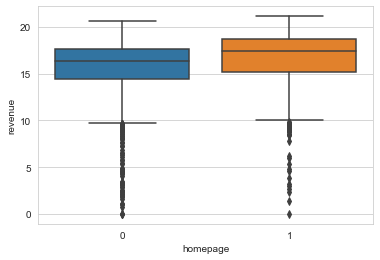

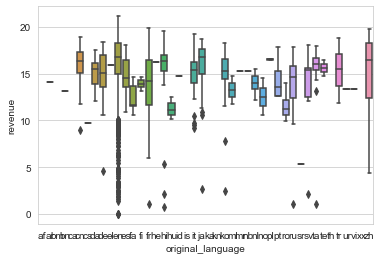

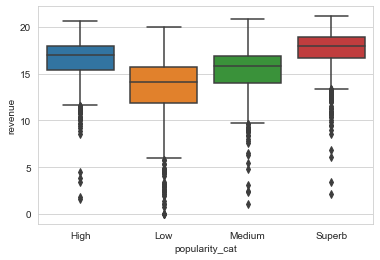

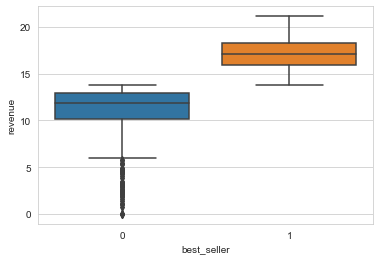

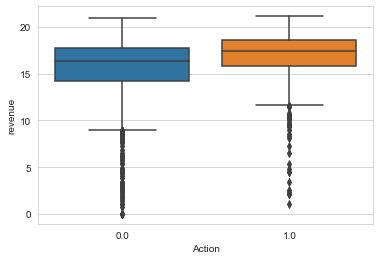

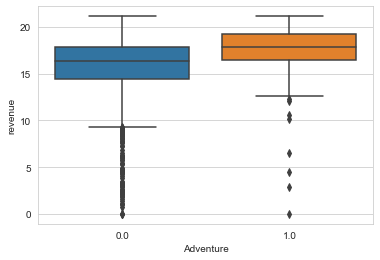

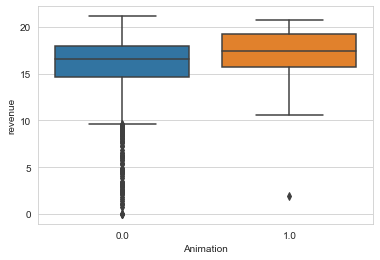

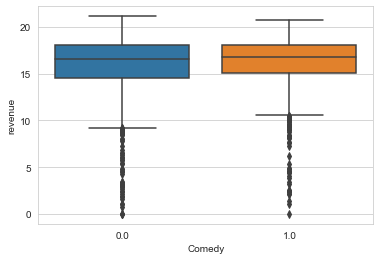

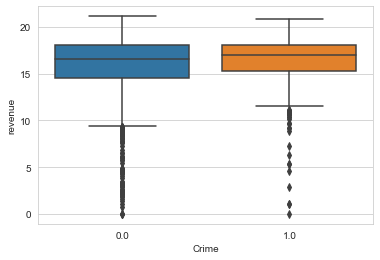

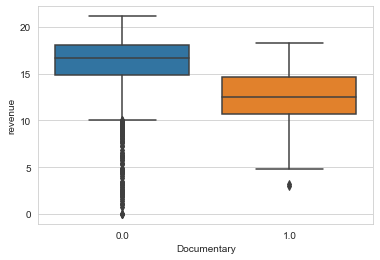

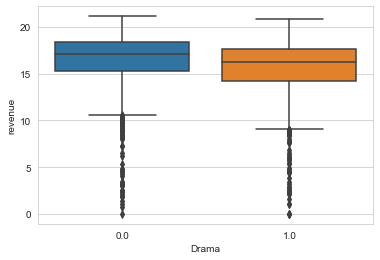

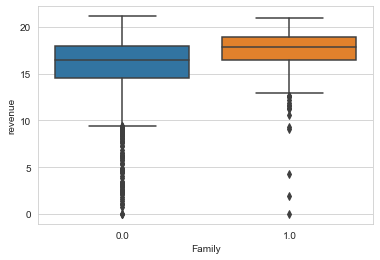

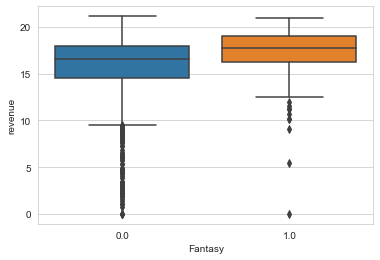

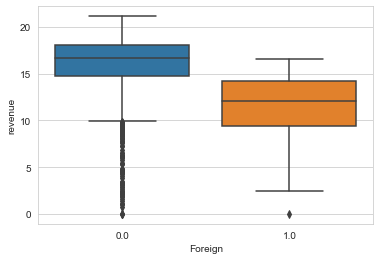

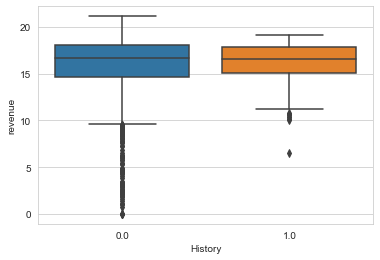

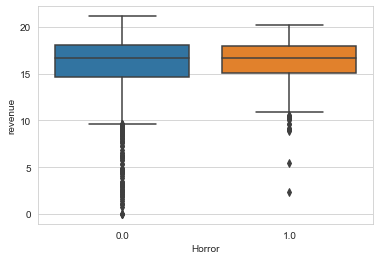

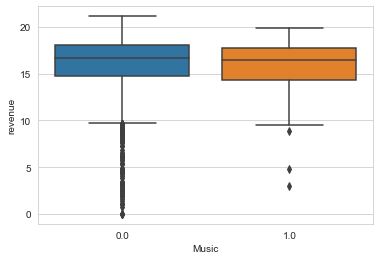

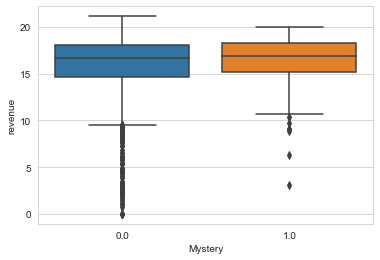

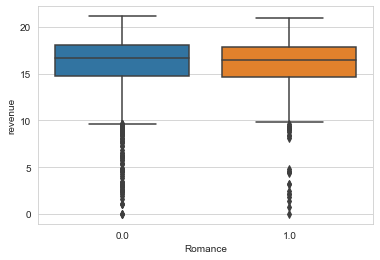

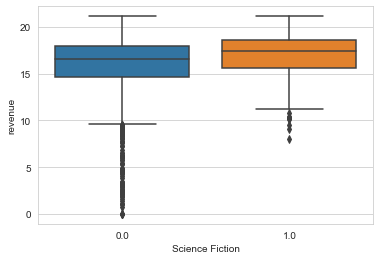

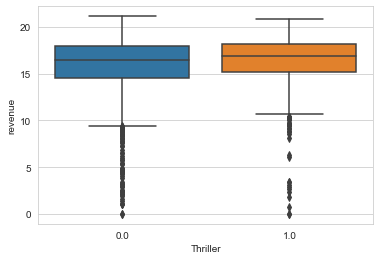

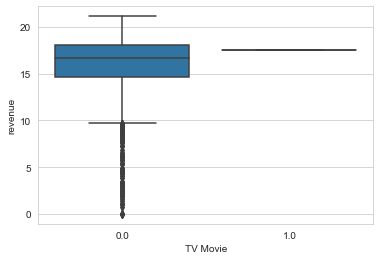

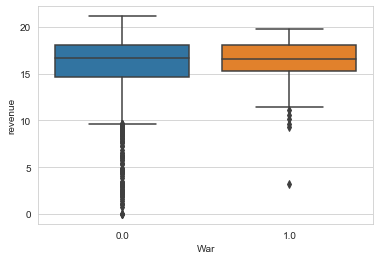

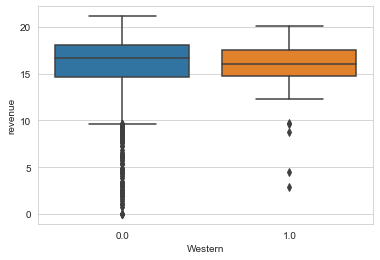

In [39]:
for x in d_of_columns_types_local['category']:
    plt.figure()
    sns.boxplot(x=x, y=np.log(df_movies['revenue']), data=df_movies)

In [40]:
#TV Movie - only one value for 1

df_movies.drop(['TV Movie'], axis=1, inplace=True)

### mann whitney u test

In [41]:
def my_mannwhitneyu(df, x, y):
    """
    
    """
    df_sub = df[[x,y]].dropna(axis=0, inplace=False)
    return stats.mannwhitneyu(df_sub[x],df_sub[y])


def all_categories_mannwhitneyu(df, ordinal_columns, y_target="revenue"):
    results_list = []
    for cat_col in ordinal_columns:
        mannwhitneyu_res = my_mannwhitneyu(df_movies, cat_col, y_target)
        res = {"x": cat_col, "y":y_target,"statistic":mannwhitneyu_res[0], "pvalue":mannwhitneyu_res[1]}
        results_list.append(res)
    df_results = pd.DataFrame(results_list)
    return df_results

In [42]:
ordinal_columns = ['homepage', 'Action', 
                   'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 
                   'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 
                   'Science Fiction', 'Thriller', 'War', 'Western', 'lang_cnt', 'country_cnt']

df_categories_mannwhitneyu = all_categories_mannwhitneyu(df_movies, ordinal_columns, "revenue")
df_categories_mannwhitneyu

x        y  statistic  pvalue
0          homepage  revenue     1894.0     0.0
1            Action  revenue     1482.0     0.0
2         Adventure  revenue      878.0     0.0
3         Animation  revenue      282.0     0.0
4            Comedy  revenue     2056.0     0.0
5             Crime  revenue      938.0     0.0
6       Documentary  revenue      174.0     0.0
7             Drama  revenue     3064.0     0.0
8            Family  revenue      520.0     0.0
9           Fantasy  revenue      464.0     0.0
10          Foreign  revenue       62.0     0.0
11          History  revenue      264.0     0.0
12           Horror  revenue      602.0     0.0
13            Music  revenue      200.0     0.0
14          Mystery  revenue      450.0     0.0
15          Romance  revenue     1144.0     0.0
16  Science Fiction  revenue      580.0     0.0
17         Thriller  revenue     1578.0     0.0
18              War  revenue      200.0     0.0
19          Western  revenue       86.0     0.0
20         lang_cnt  revenue     7163.0     0.0
21      country_cnt  revenue     8291.5     0.0

### 5- Checking for outliers

In [43]:
d_of_columns_types_local['int64']

['id', 'budget', 'month', 'fixed_year']

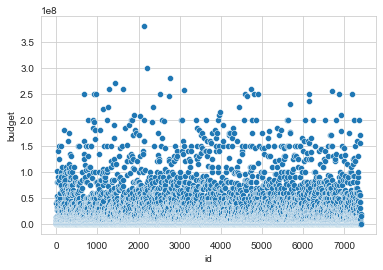

In [44]:
sns.scatterplot(data=df_movies, x="id", y="budget", palette="deep")

In [45]:
d_of_columns_types_local['float64']

['popularity',
 'runtime',
 'revenue',
 'lang_cnt',
 'performance_lead_actor',
 'female_actor_count',
 'male_actor_count',
 'unkown_gender_actor_count',
 'country_cnt',
 'cnt_crew']

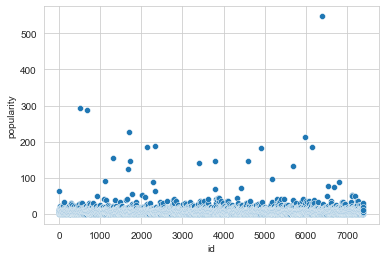

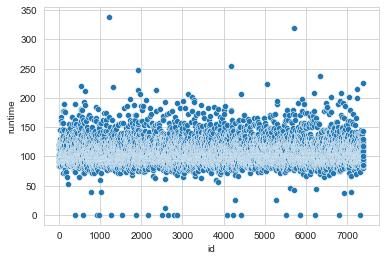

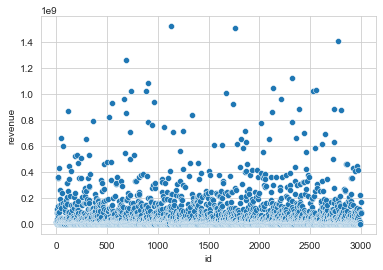

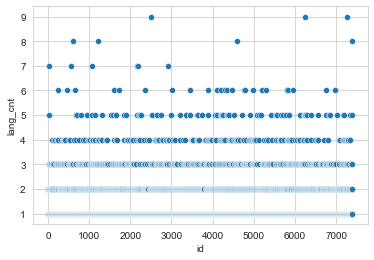

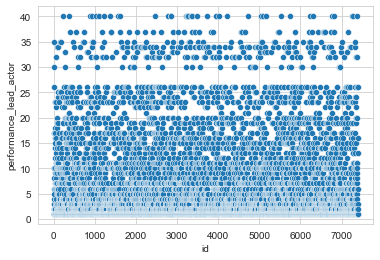

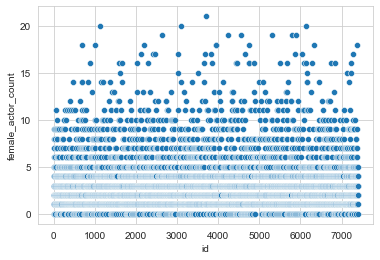

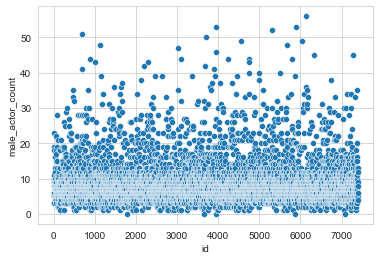

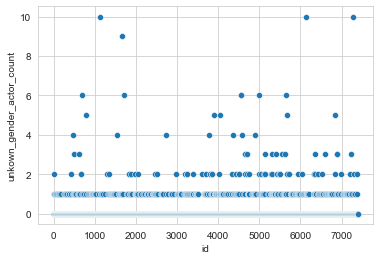

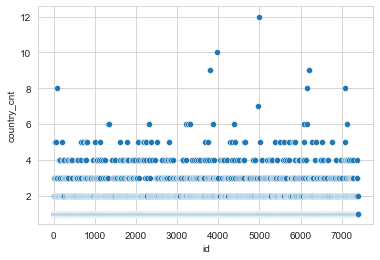

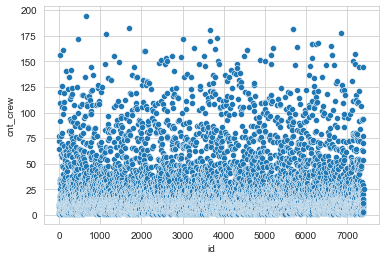

In [46]:
for x in d_of_columns_types_local['float64']:
    plt.figure()
    sns.scatterplot(data=df_movies, x="id", y=x, palette="deep")

### 6- Checking the Missing Mechanisms

In [47]:
print(df_movies.isnull().sum())

id                              0
budget                          0
homepage                        0
original_language               0
popularity                      0
popularity_cat                  0
month                           0
runtime                         6
revenue                      4397
best_seller                     0
Action                         23
Adventure                      23
Animation                      23
Comedy                         23
Crime                          23
Documentary                    23
Drama                          23
Family                         23
Fantasy                        23
Foreign                        23
History                        23
Horror                         23
Music                          23
Mystery                        23
Romance                        23
Science Fiction                23
Thriller                       23
War                            23
Western                        23
lang_cnt      

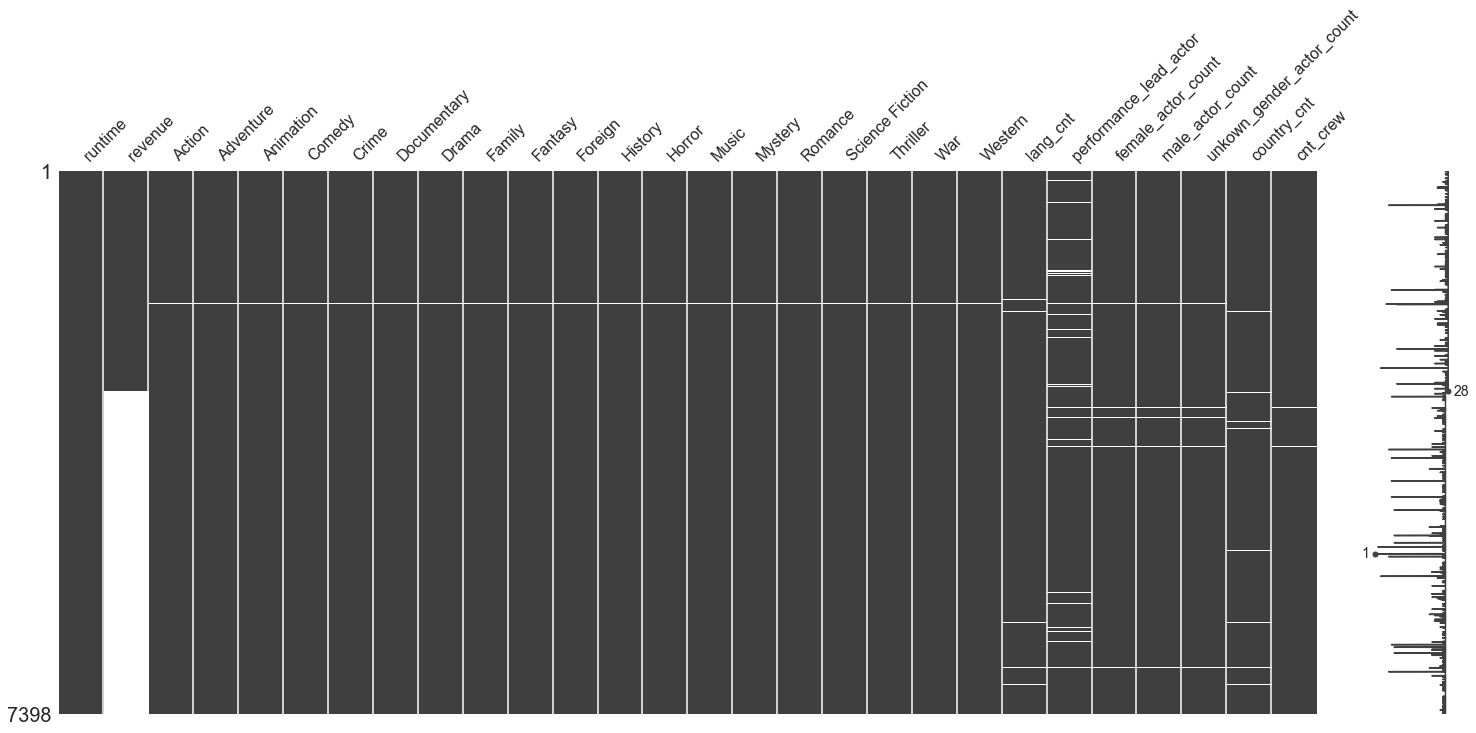

In [48]:
import missingno as msno

### plot the missingness (nullity) matrix
missingdata_df = df_movies.columns[df_movies.isnull().any()].tolist()
msno.matrix(df_movies[missingdata_df])

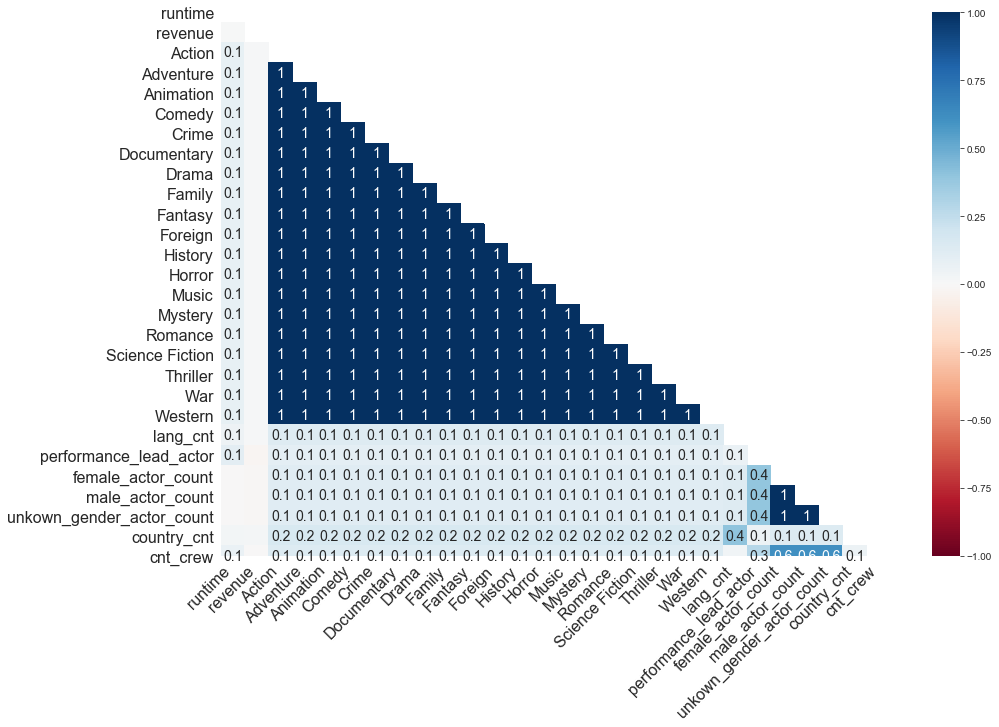

In [49]:
## missingness correlation heatmap

msno.heatmap(df_movies[missingdata_df], figsize=(15,10))

# PART 3  -Data cleansing

## 3.1 outliers check

In [50]:
d_of_columns_types_local = get_dict_of_df_types(df_movies)
d_of_columns_types_local

{'int64': ['id', 'budget', 'month', 'fixed_year'],
 'category': ['homepage',
  'original_language',
  'popularity_cat',
  'best_seller',
  'Action',
  'Adventure',
  'Animation',
  'Comedy',
  'Crime',
  'Documentary',
  'Drama',
  'Family',
  'Fantasy',
  'Foreign',
  'History',
  'Horror',
  'Music',
  'Mystery',
  'Romance',
  'Science Fiction',
  'Thriller',
  'War',
  'Western'],
 'float64': ['popularity',
  'runtime',
  'revenue',
  'lang_cnt',
  'performance_lead_actor',
  'female_actor_count',
  'male_actor_count',
  'unkown_gender_actor_count',
  'country_cnt',
  'cnt_crew'],
 'datetime64[ns]': ['fixed_release_date']}

In [51]:
df_desc = df_movies.describe()
df_desc

id        budget    popularity        month      runtime  \
count  7398.000000  7.398000e+03  7.398000e+03  7398.000000  7392.000000   
mean   3698.996215  2.260957e+07  8.516580e+00     6.843606   107.723350   
std    2136.171952  3.695030e+07  1.216546e+01     3.386588    21.481395   
min       1.000000  0.000000e+00  1.000000e-06     1.000000     0.000000   
25%    1849.250000  0.000000e+00  3.934017e+00     4.000000    94.000000   
50%    3698.500000  7.500000e+06  7.436379e+00     7.000000   104.000000   
75%    5548.750000  2.800000e+07  1.092110e+01    10.000000   118.000000   
max    7398.000000  3.800000e+08  5.474883e+02    12.000000   338.000000   

            revenue     lang_cnt  performance_lead_actor  female_actor_count  \
count  3.001000e+03  7337.000000             7069.000000         7330.000000   
mean   6.680810e+07     1.458225                7.932805            3.232879   
std    1.375832e+08     0.888053                8.778681            2.699319   
min    1.000000e+00     1.000000                1.000000            0.000000   
25%    2.387127e+06     1.000000                1.000000            1.000000   
50%    1.681038e+07     1.000000                4.000000            3.000000   
75%    6.892915e+07     2.000000               11.000000            4.000000   
max    1.519558e+09     9.000000               40.000000           21.000000   

       male_actor_count  unkown_gender_actor_count  country_cnt     cnt_crew  \
count       7330.000000                7330.000000  7242.000000  7361.000000   
mean           8.900409                   0.086085     1.361640    24.405651   
std            5.759937                   0.449174     0.773817    28.159109   
min            0.000000                   0.000000     1.000000     1.000000   
25%            6.000000                   0.000000     1.000000     8.000000   
50%            8.000000                   0.000000     1.000000    14.000000   
75%           10.000000                   0.000000     1.000000    28.000000   
max           56.000000                  10.000000    12.000000   194.000000   

        fixed_year  
count  7398.000000  
mean   1999.690727  
std      15.341220  
min    1921.000000  
25%    1992.000000  
50%    2004.000000  
75%    2011.000000  
max    2018.000000

In [52]:
from scipy.stats import iqr
def outliers_matrix(df, numeric_col_list, threshold=1.5):
    df_outliers = pd.DataFrame()
    for numeric_col in numeric_col_list:
        columnSeriesObj = df_desc[numeric_col]
        out_low = columnSeriesObj.quantile(.25)
        out_high = columnSeriesObj.quantile(.75)
        iqr_level = (out_high - out_low) * threshold

        out_low = out_low - iqr_level
        out_high = out_high +  iqr_level
        df_outliers[numeric_col] = df[numeric_col].apply(lambda x: 1 if ((x <out_low) or (x>out_high))  else 0)
    return df_outliers



In [53]:
df_outliers= outliers_matrix(df_movies, d_of_columns_types_local['float64'] + ['budget'], 1.5)
df_outliers.head()

popularity  runtime  revenue  lang_cnt  performance_lead_actor  \
0           0        0        0         0                       0   
1           0        0        0         0                       0   
2           0        0        0         0                       0   
3           0        0        0         0                       0   
4           0        0        0         0                       0   

   female_actor_count  male_actor_count  unkown_gender_actor_count  \
0                   0                 0                          0   
1                   0                 0                          0   
2                   0                 0                          0   
3                   0                 0                          0   
4                   0                 0                          0   

   country_cnt  cnt_crew  budget  
0            0         0       0  
1            0         0       0  
2            0         0       0  
3            0         0       0  
4            0         0       0

In [54]:
df_outliers.describe()

popularity      runtime      revenue     lang_cnt  \
count  7398.000000  7398.000000  7398.000000  7398.000000   
mean      0.000135     0.000270     0.032306     0.000946   
std       0.011626     0.016441     0.176824     0.030748   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000   

       performance_lead_actor  female_actor_count  male_actor_count  \
count                  7398.0         7398.000000       7398.000000   
mean                      0.0            0.002433          0.001892   
std                       0.0            0.049270          0.043464   
min                       0.0            0.000000          0.000000   
25%                       0.0            0.000000          0.000000   
50%                       0.0            0.000000          0.000000   
75%                       0.0            0.000000          0.000000   
max                       0.0            1.000000          1.000000   

       unkown_gender_actor_count  country_cnt     cnt_crew       budget  
count                7398.000000  7398.000000  7398.000000  7398.000000  
mean                    0.000541     0.000541     0.003514     0.076372  
std                     0.023248     0.023248     0.059183     0.265610  
min                     0.000000     0.000000     0.000000     0.000000  
25%                     0.000000     0.000000     0.000000     0.000000  
50%                     0.000000     0.000000     0.000000     0.000000  
75%                     0.000000     0.000000     0.000000     0.000000  
max                     1.000000     1.000000     1.000000     1.000000

### Checking for differences in the distribution

In [55]:
from scipy import stats
from scipy.stats import ks_2samp
revenue_out=df_movies['revenue']
revenue_non=df_movies['revenue'][df_outliers['revenue']==0]
ks_2samp(revenue_out, revenue_non)


def checking_differences_distribution(df_src, df_outliers_mask):
    results = []
    for col in df_outliers_mask.columns:
        df_col_src = df_src[col]
        df_col_no_outliers = df_src[col][df_outliers_mask[col] == 0]
        src_count = len(df_col_src)
        outlier_count = len(df_col_no_outliers)
        statistic, pvalue = ks_2samp(df_col_src, df_col_no_outliers,mode="asymp")
        res = {"col_name": col, "src_count": src_count, 
               "selected_values_count": outlier_count,
               "outliers_count": src_count-outlier_count, "statistic": statistic, "pvalue": pvalue, 
               "distribution_changed": "+" if pvalue < 0.05 else "-"}
        results.append(res)
    return pd.DataFrame(results)

df_differences_distribution = checking_differences_distribution(df_movies,df_outliers)

In [56]:
df_differences_distribution

col_name  src_count  selected_values_count  \
0                  popularity       7398                   7397   
1                     runtime       7398                   7396   
2                     revenue       7398                   7159   
3                    lang_cnt       7398                   7391   
4      performance_lead_actor       7398                   7398   
5          female_actor_count       7398                   7380   
6            male_actor_count       7398                   7384   
7   unkown_gender_actor_count       7398                   7394   
8                 country_cnt       7398                   7394   
9                    cnt_crew       7398                   7372   
10                     budget       7398                   6833   

    outliers_count  statistic        pvalue distribution_changed  
0                1   0.000135  1.000000e+00                    -  
1                2   0.000270  1.000000e+00                    -  
2              239   0.019842  1.139636e-01                    -  
3                7   0.000938  1.000000e+00                    -  
4                0  -0.000000  1.000000e+00                    -  
5               18   0.002411  1.000000e+00                    -  
6               14   0.001875  1.000000e+00                    -  
7                4   0.000536  1.000000e+00                    -  
8                4   0.000529  1.000000e+00                    -  
9               26   0.003497  1.000000e+00                    -  
10             565   0.076372  2.019104e-18                    +

In [57]:
def checking_correlation(df_src, df_outliers_mask):
    results = []
    for col in df_outliers_mask.columns:
        if col == "revenue":
            continue
        df_col_src = df_src[col]
        df_col_no_outliers = df_src[df_outliers[col] == 0] 
        src_count = len(df_col_src)
        outlier_count = len(df_col_no_outliers)
        correlation_src, pvalue_src = my_spearmanr(df_src, col, 'revenue')
        # my_spearmanr(df_col_no_outliers, col, 'revenue')
        correlation_no_outliers, pvalue_no_outliers = my_spearmanr(df_col_no_outliers, col, 'revenue')
        correlation_changed =""
        if (pvalue_src < 0.05 and pvalue_no_outliers <0.05) or (pvalue_src > 0.05 and pvalue_no_outliers > 0.05):
            correlation_changed = "-"
        else:
            correlation_changed = "+"
            
        res = {"col_name": col, "src_count": src_count, 
               "selected_values_count": outlier_count,
               "outliers_count": src_count-outlier_count, "correlation_src": correlation_src, "pvalue_src": pvalue_src, 
               "correlation_src": correlation_src, "correlation_no_outliers":correlation_no_outliers, 
               "pvalue_no_outliers": pvalue_no_outliers,
               "correlation_changed": correlation_changed}
        results.append(res)
    return pd.DataFrame(results)

df_correlations = checking_correlation(df_movies,df_outliers)

In [58]:

df_drop_outliers = df_correlations[['col_name','outliers_count','correlation_changed' ]].merge(df_differences_distribution[['col_name','distribution_changed']],  how='inner', on='col_name')

def drop_outliers_func(_correlation_changed, _distribution_changed):
    if _correlation_changed == '+' and _distribution_changed == '+':
        return "No"
    else:
        return "Yes"
    
df_drop_outliers['drop_outliers'] = df_drop_outliers.apply(lambda x: drop_outliers_func(x.correlation_changed, x.distribution_changed), axis=1)
df_drop_outliers

col_name  outliers_count correlation_changed  \
0                 popularity               1                   -   
1                    runtime               2                   -   
2                   lang_cnt               7                   -   
3     performance_lead_actor               0                   -   
4         female_actor_count              18                   -   
5           male_actor_count              14                   -   
6  unkown_gender_actor_count               4                   -   
7                country_cnt               4                   -   
8                   cnt_crew              26                   -   
9                     budget             565                   -   

  distribution_changed drop_outliers  
0                    -           Yes  
1                    -           Yes  
2                    -           Yes  
3                    -           Yes  
4                    -           Yes  
5                    -           Yes  
6                    -           Yes  
7                    -           Yes  
8                    -           Yes  
9                    +           Yes

### 3 - My way to removing the outliers and explanation:
I need to replace the outliers with na, because in all the variables the correlation and the distribution have not changed after I removed the outliers from the variables. 
Using "outliers_matrix" function, I found outliers of each of columns in the above table.
If correlation_changed and distribution_changed in df_drop_outliers then I decided that I can remove outliers ('def repalce_outliers_with_na'). 
In the bellow cell, "def repalce_outliers_with_na" function is implemented (using outlier flag to drop outliers - 'mask'). 
For checking the influnce of dropping the outliers, I have dropped in each time only one "variable"/"feature". 

### 4- replacing outliers with na

In [59]:
# def drop_outliers(_df_src, _df_outliers_mask, _cols):
#     df_outliers_mask_2 = _df_outliers_mask.add_prefix("mask_")
#     df_filter_ouliers = _df_src.merge(df_outliers_mask_2, left_index=True, right_index=True)
#     for col in _cols:
#         col_mask = "mask_" + col 
#         print("filter by: ", col_mask)
#         df_filter_ouliers = df_filter_ouliers[df_filter_ouliers[col_mask] == 0]
#     return df_filter_ouliers

def repalce_outliers_with_na(_df_src, _df_outliers_mask, _cols):
    def _replace_outliers_with_nan(orig_col_name, col_mask):
        if col_mask == 1:
            return None
        else:
            return orig_col_name
        
        
    df_outliers_mask_2 = _df_outliers_mask.add_prefix("mask_")
    df_ouliers_2_none = _df_src.merge(df_outliers_mask_2, left_index=True, right_index=True)
    for col in _cols:
        col_mask = "mask_" + col 
        print("replace by ", col_mask)
        df_ouliers_2_none[col] = df_ouliers_2_none.apply(lambda x: _replace_outliers_with_nan(x[col], x[col_mask]), axis=1)

    return df_ouliers_2_none


cols_to_remove = list(df_outliers.columns)
cols_to_remove.remove('revenue')

df_all_outliers_na = repalce_outliers_with_na(_df_src=df_movies, _df_outliers_mask=df_outliers, _cols=cols_to_remove)
df_popularity_outliers_na = repalce_outliers_with_na(_df_src=df_movies, _df_outliers_mask=df_outliers, _cols=['popularity'])
df_runtime_outliers_na = repalce_outliers_with_na(_df_src=df_movies, _df_outliers_mask=df_outliers, _cols=['runtime'])
df_lang_cnt_outliers_na = repalce_outliers_with_na(_df_src=df_movies, _df_outliers_mask=df_outliers, _cols=['lang_cnt'])
df_cnt_actor_performance_outliers_na = repalce_outliers_with_na(_df_src=df_movies, _df_outliers_mask=df_outliers, _cols=['performance_lead_actor'])
df_female_actor_count_outliers_na = repalce_outliers_with_na(_df_src=df_movies, _df_outliers_mask=df_outliers, _cols=['female_actor_count'])
df_male_actor_count_outliers_na = repalce_outliers_with_na(_df_src=df_movies, _df_outliers_mask=df_outliers, _cols=['male_actor_count'])
df_unkown_gender_actor_count_outliers_na = repalce_outliers_with_na(_df_src=df_movies, _df_outliers_mask=df_outliers, _cols=['unkown_gender_actor_count'])
df_country_cnt_outliers_na = repalce_outliers_with_na(_df_src=df_movies, _df_outliers_mask=df_outliers, _cols=['country_cnt'])
df_cnt_crew_outliers_na = repalce_outliers_with_na(_df_src=df_movies, _df_outliers_mask=df_outliers, _cols=['cnt_crew'])
df_budget_outliers_na = repalce_outliers_with_na(_df_src=df_movies, _df_outliers_mask=df_outliers, _cols=['budget'])

replace by  mask_popularity
replace by  mask_runtime
replace by  mask_lang_cnt
replace by  mask_performance_lead_actor
replace by  mask_female_actor_count
replace by  mask_male_actor_count
replace by  mask_unkown_gender_actor_count
replace by  mask_country_cnt
replace by  mask_cnt_crew
replace by  mask_budget
replace by  mask_popularity
replace by  mask_runtime
replace by  mask_lang_cnt
replace by  mask_performance_lead_actor
replace by  mask_female_actor_count
replace by  mask_male_actor_count
replace by  mask_unkown_gender_actor_count
replace by  mask_country_cnt
replace by  mask_cnt_crew
replace by  mask_budget


In [60]:
len(df_all_outliers_na)

7398

### 1- Distribution before and after remmoving outliers:

C:\Users\itzikjan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<Figure size 432x288 with 0 Axes>

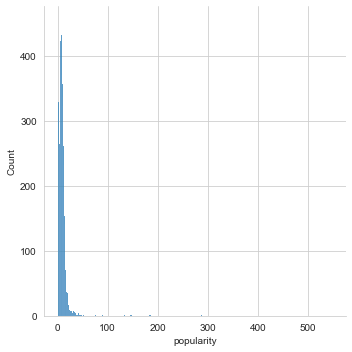

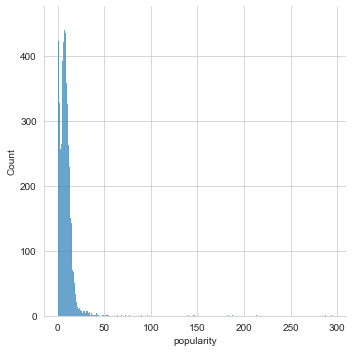

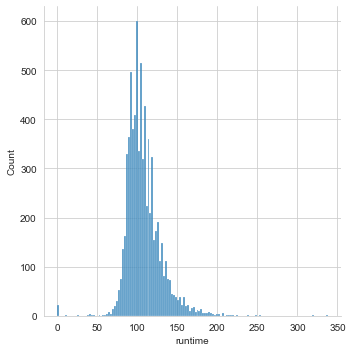

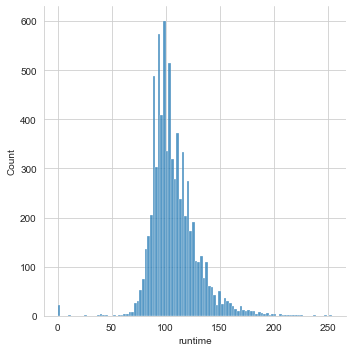

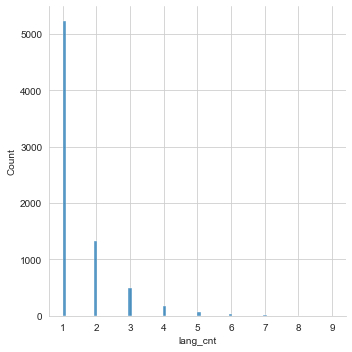

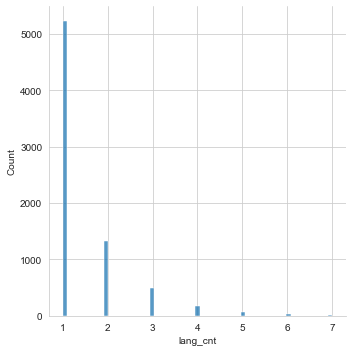

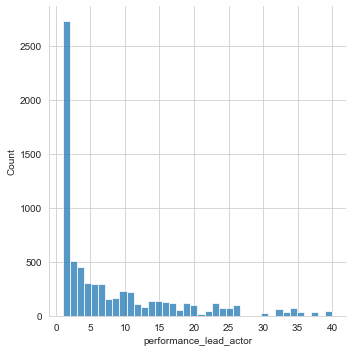

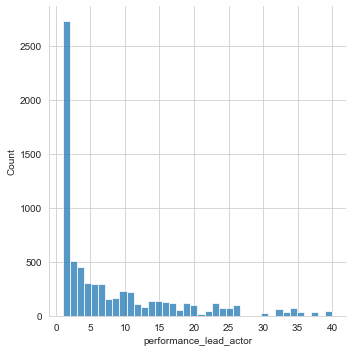

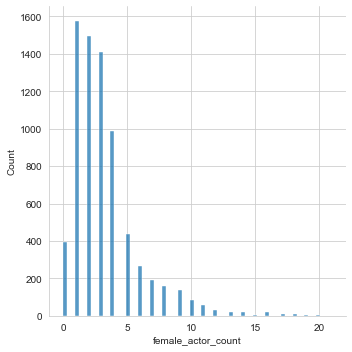

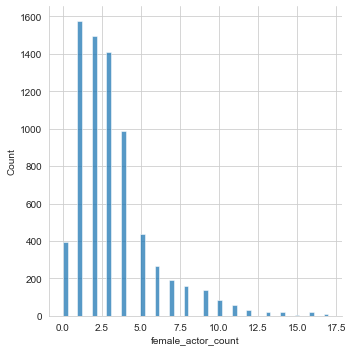

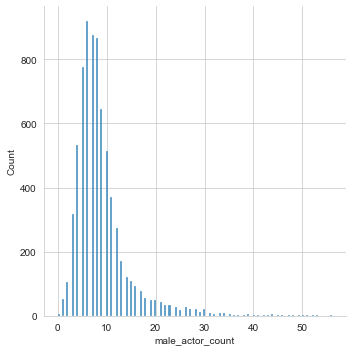

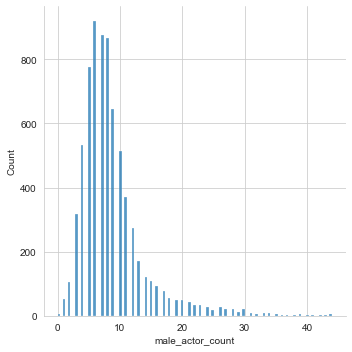

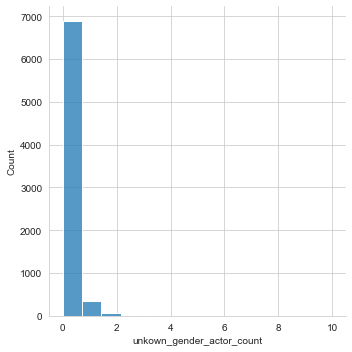

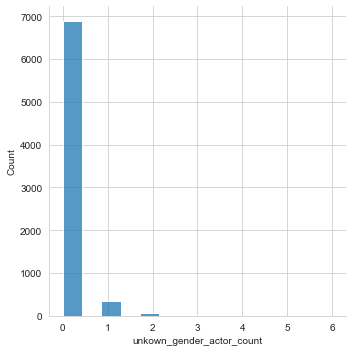

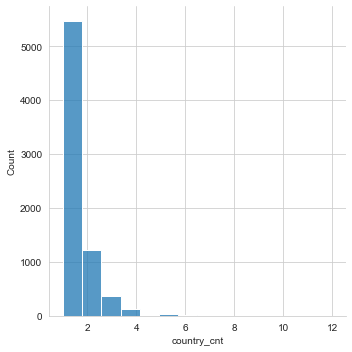

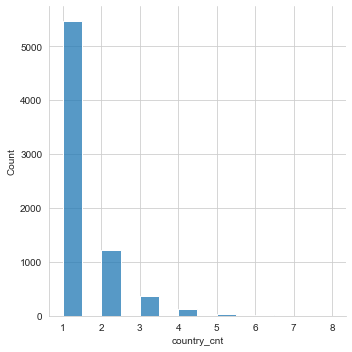

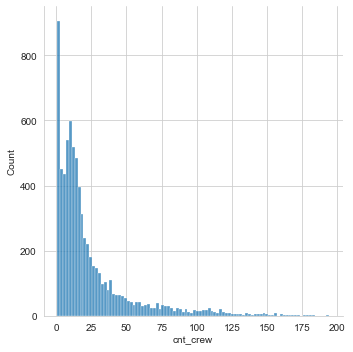

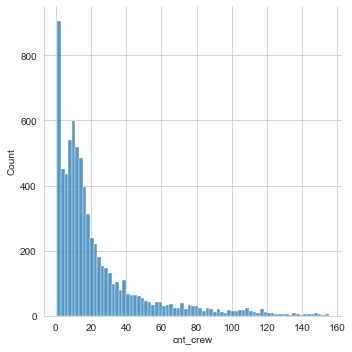

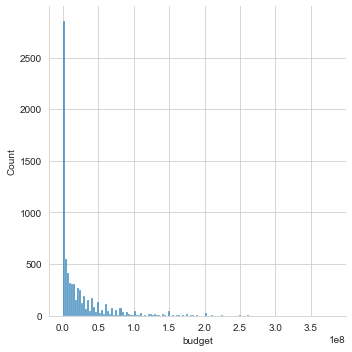

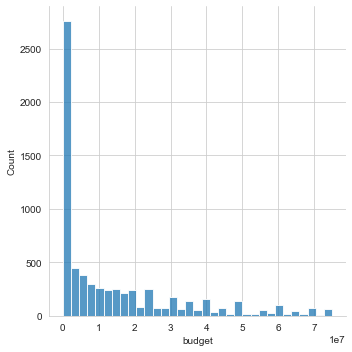

In [61]:
plt.figure()
sns.displot(df_movies, x='popularity')
sns.displot(df_popularity_outliers_na, x='popularity')
sns.displot(df_movies, x='runtime')
sns.displot(df_runtime_outliers_na, x='runtime')
sns.displot(df_movies, x='lang_cnt')
sns.displot(df_lang_cnt_outliers_na, x='lang_cnt')
sns.displot(df_movies, x='performance_lead_actor')
sns.displot(df_cnt_actor_performance_outliers_na, x='performance_lead_actor')
sns.displot(df_movies, x='female_actor_count')
sns.displot(df_female_actor_count_outliers_na, x='female_actor_count')
sns.displot(df_movies, x='male_actor_count')
sns.displot(df_male_actor_count_outliers_na, x='male_actor_count')
sns.displot(df_movies, x='unkown_gender_actor_count')
sns.displot(df_unkown_gender_actor_count_outliers_na, x='unkown_gender_actor_count')
sns.displot(df_movies, x='country_cnt')
sns.displot(df_country_cnt_outliers_na, x='country_cnt')
sns.displot(df_movies, x='cnt_crew')
sns.displot(df_cnt_crew_outliers_na, x='cnt_crew')
sns.displot(df_movies, x='budget')
sns.displot(df_budget_outliers_na, x='budget')



### 2- scatter plot for the variables + revenue before and after

Text(0.5, 1, 'with outliers')

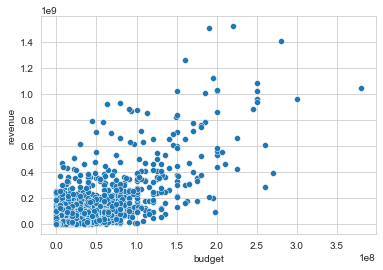

In [62]:
sns.scatterplot(data=df_movies, x='budget', y=df_movies['revenue'])
ax.set_title("with outliers")

Text(0.5, 1, 'without outliers')

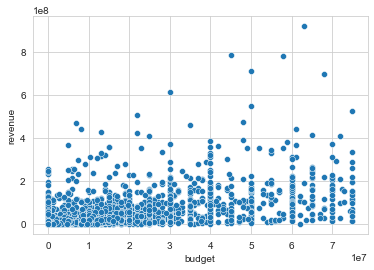

In [63]:
sns.scatterplot(data=df_budget_outliers_na, x='budget', y='revenue')
ax.set_title("without outliers")

Text(0.5, 1, 'with outliers')

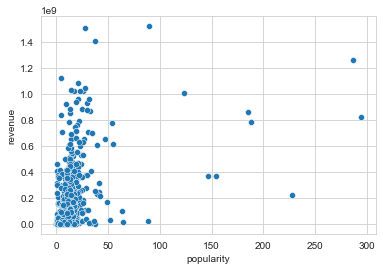

In [64]:
sns.scatterplot(data=df_movies, x='popularity', y='revenue')
ax.set_title("with outliers")

Text(0.5, 1, 'without outliers')

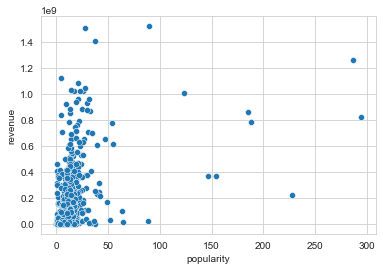

In [65]:
sns.scatterplot(data=df_popularity_outliers_na, x='popularity', y='revenue')
ax.set_title("without outliers")

Text(0.5, 1, 'with outliers')

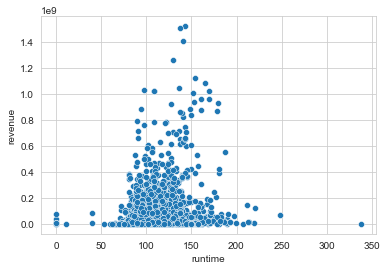

In [66]:
sns.scatterplot(data=df_movies, x='runtime', y='revenue')
ax.set_title("with outliers")

Text(0.5, 1, 'without outliers')

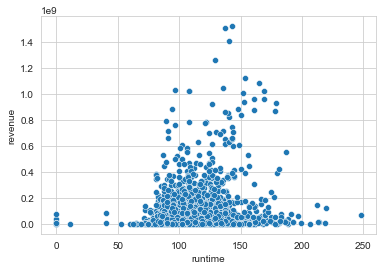

In [67]:
sns.scatterplot(data=df_runtime_outliers_na, x='runtime', y='revenue')
ax.set_title("without outliers")

Text(0.5, 1, 'with outliers')

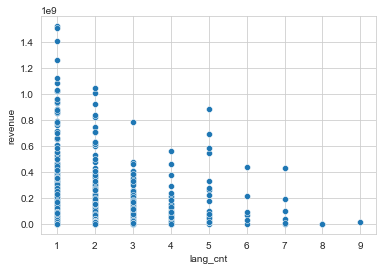

In [68]:
sns.scatterplot(data=df_movies, x='lang_cnt', y='revenue')
ax.set_title("with outliers")

Text(0.5, 1, 'without outliers')

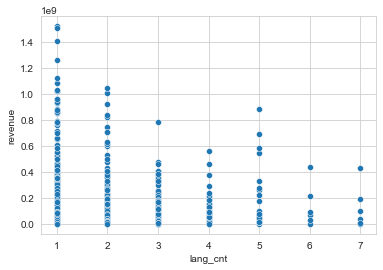

In [69]:
sns.scatterplot(data=df_lang_cnt_outliers_na, x='lang_cnt', y='revenue')
ax.set_title("without outliers")

Text(0.5, 1, 'with outliers')

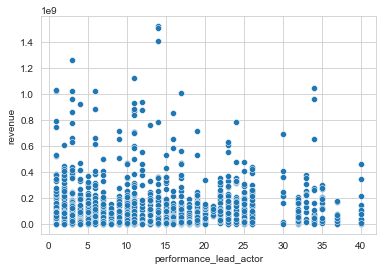

In [70]:
sns.scatterplot(data=df_movies, x='performance_lead_actor', y='revenue')
ax.set_title("with outliers")

Text(0.5, 1, 'without outliers')

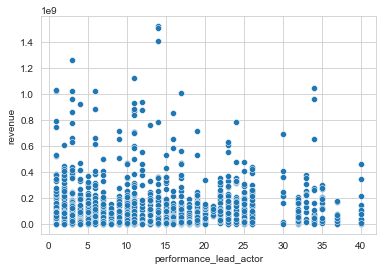

In [71]:
sns.scatterplot(data=df_cnt_actor_performance_outliers_na, x='performance_lead_actor', y='revenue')
ax.set_title("without outliers")

Text(0.5, 1, 'with outliers')

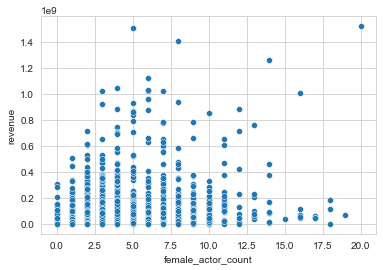

In [72]:
sns.scatterplot(data=df_movies, x='female_actor_count', y='revenue')
ax.set_title("with outliers")

Text(0.5, 1, 'without outliers')

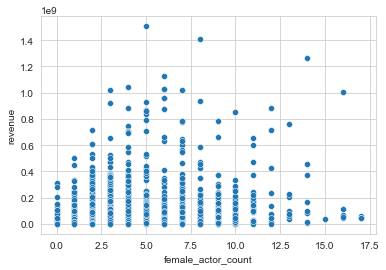

In [73]:
sns.scatterplot(data=df_female_actor_count_outliers_na, x='female_actor_count', y='revenue')
ax.set_title("without outliers")

Text(0.5, 1, 'with outliers')

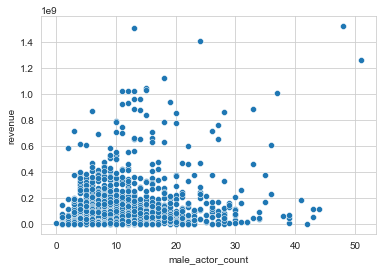

In [74]:
sns.scatterplot(data=df_movies, x='male_actor_count', y='revenue')
ax.set_title("with outliers")

Text(0.5, 1, 'without outliers')

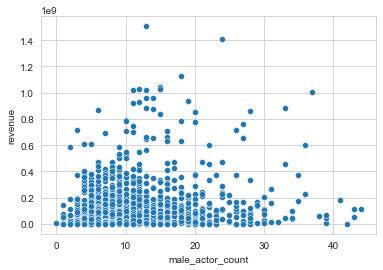

In [75]:
sns.scatterplot(data=df_male_actor_count_outliers_na, x='male_actor_count', y='revenue')
ax.set_title("without outliers")

Text(0.5, 1, 'with outliers')

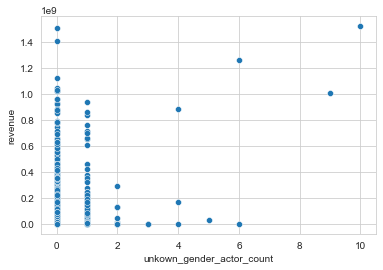

In [76]:
sns.scatterplot(data=df_movies, x='unkown_gender_actor_count', y='revenue')
ax.set_title("with outliers")

Text(0.5, 1, 'without outliers')

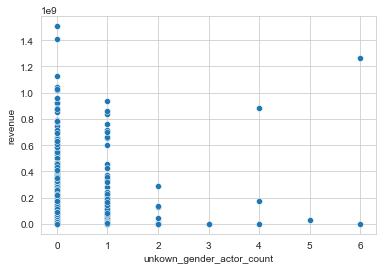

In [77]:
sns.scatterplot(data=df_unkown_gender_actor_count_outliers_na, x='unkown_gender_actor_count', y='revenue')
ax.set_title("without outliers")

Text(0.5, 1, 'with outliers')

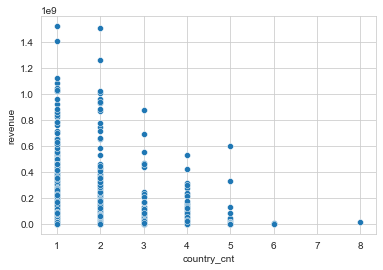

In [78]:
sns.scatterplot(data=df_movies, x='country_cnt', y='revenue')
ax.set_title("with outliers")

Text(0.5, 1, 'without outliers')

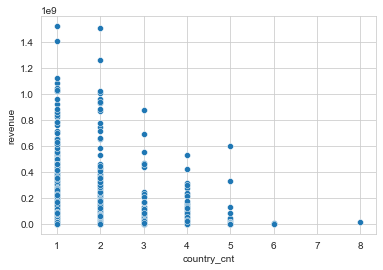

In [79]:
sns.scatterplot(data=df_country_cnt_outliers_na, x='country_cnt', y='revenue')
ax.set_title("without outliers")

Text(0.5, 1, 'with outliers')

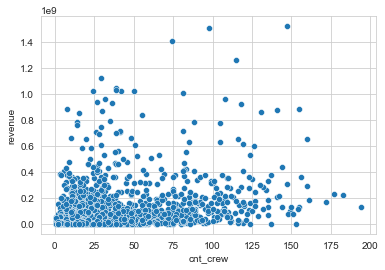

In [80]:
sns.scatterplot(data=df_movies, x='cnt_crew', y='revenue')
ax.set_title("with outliers")

Text(0.5, 1, 'without outliers')

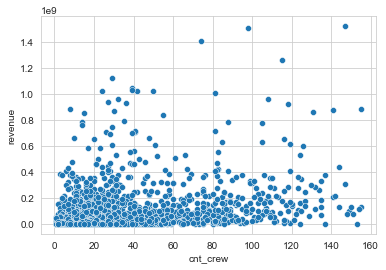

In [81]:
sns.scatterplot(data=df_cnt_crew_outliers_na, x='cnt_crew', y='revenue')
ax.set_title("without outliers")

In [82]:
mask_cols_list =[x for x in df_all_outliers_na.columns if x.startswith("mask")]
mask_cols_list
df_movies_2 = df_all_outliers_na.drop(mask_cols_list,  axis = 1)


### 3.2 Missing values

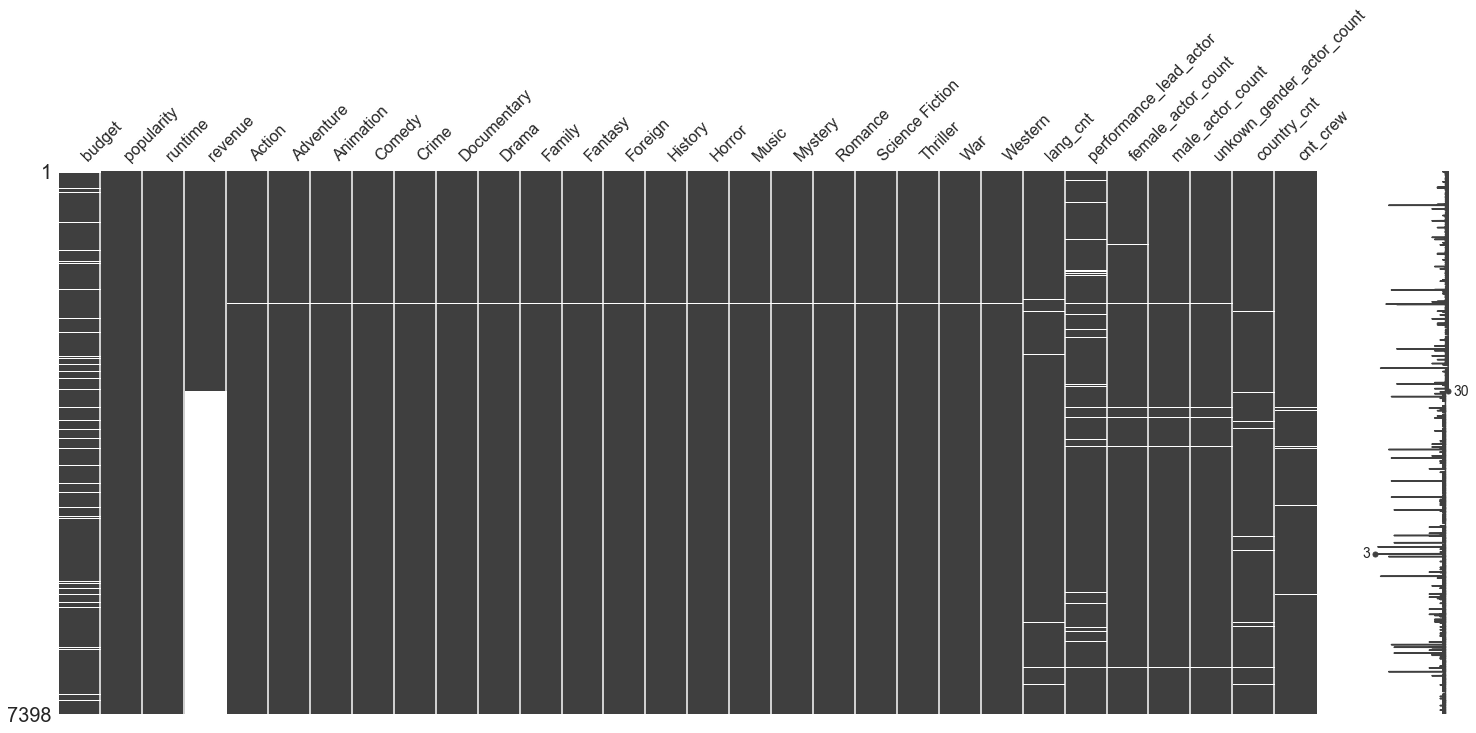

In [83]:
### plot the missingness (nullity) matrix
df_missing_data = df_movies_2.columns[df_movies_2.isnull().any()].tolist()
msno.matrix(df_movies_2[df_missing_data])

In [84]:
print(df_movies_2.isnull().sum())

id                              0
budget                        565
homepage                        0
original_language               0
popularity                      1
popularity_cat                  0
month                           0
runtime                         8
revenue                      4397
best_seller                     0
Action                         23
Adventure                      23
Animation                      23
Comedy                         23
Crime                          23
Documentary                    23
Drama                          23
Family                         23
Fantasy                        23
Foreign                        23
History                        23
Horror                         23
Music                          23
Mystery                        23
Romance                        23
Science Fiction                23
Thriller                       23
War                            23
Western                        23
lang_cnt      

In [85]:
def get_rate_table_of_na_in_columns(df):
    col_list = df.columns
    df_sum_of_na =  df.isna().sum() # pandas.core.series.Series
    num_of_records = len(df)
    results = []
    for col in col_list:
        na_count = df_sum_of_na[col]
        res = {"var": col, "na.count": na_count, "rate": na_count/num_of_records*100.0}
        results.append(res)
    return pd.DataFrame(results).sort_values("rate", ascending=False)

In [86]:
get_rate_table_of_na_in_columns(df_movies_2)

var  na.count       rate
8                     revenue      4397  59.434982
1                      budget       565   7.637199
30     performance_lead_actor       329   4.447148
34                country_cnt       160   2.162747
31         female_actor_count        86   1.162476
32           male_actor_count        82   1.108408
33  unkown_gender_actor_count        72   0.973236
29                   lang_cnt        68   0.919167
35                   cnt_crew        63   0.851582
27                        War        23   0.310895
28                    Western        23   0.310895
26                   Thriller        23   0.310895
25            Science Fiction        23   0.310895
24                    Romance        23   0.310895
23                    Mystery        23   0.310895
22                      Music        23   0.310895
21                     Horror        23   0.310895
20                    History        23   0.310895
19                    Foreign        23   0.310895
18                    Fantasy        23   0.310895
17                     Family        23   0.310895
16                      Drama        23   0.310895
14                      Crime        23   0.310895
13                     Comedy        23   0.310895
12                  Animation        23   0.310895
11                  Adventure        23   0.310895
10                     Action        23   0.310895
15                Documentary        23   0.310895
7                     runtime         8   0.108137
4                  popularity         1   0.013517
36                 fixed_year         0   0.000000
0                          id         0   0.000000
9                 best_seller         0   0.000000
6                       month         0   0.000000
5              popularity_cat         0   0.000000
3           original_language         0   0.000000
2                    homepage         0   0.000000
37         fixed_release_date         0   0.000000

### checking number of NA in rows, and dropping rows with NA>50%

In [87]:
def get_rate_table_of_na_in_rows(df_orig):
    """
    df is orig dataframe before adding Accessory Columns
    """
   
    num_of_columns = len(df_orig.columns)
    df_num_of_nans = df_orig.isna().sum(axis = 1).to_frame(name="num_of_nan")
    df_orif_with_nans =  df_orig.merge(df_num_of_nans, left_index=True, right_index=True)
    df_orif_with_nans["nan_rate"] = df_orif_with_nans["num_of_nan"].apply(lambda x: x/num_of_columns*100.0)
    return df_orif_with_nans

def filter_by_na_rows(df_orig, threshold_perx=50):
    """
    df is orig dataframe before adding Accessory Columns
    """
    df_orig_with_nan = get_rate_table_of_na_in_rows(df_orig)
    return df_orig[df_orig_with_nan['nan_rate']<threshold_perx]

In [88]:
df_movies_3 = filter_by_na_rows(df_movies_2, threshold_perx=50)
df_movies_3.head()

id      budget homepage original_language  popularity popularity_cat  \
0   1  14000000.0        0                en    6.575393           High   
1   2  40000000.0        0                en    8.248895           High   
2   3   3300000.0        1                en   64.299988         Superb   
3   4   1200000.0        1                hi    3.174936         Medium   
4   5         0.0        0                ko    1.148070            Low   

   month  runtime     revenue best_seller  ... Western lang_cnt  \
0      2     93.0  12314651.0           1  ...     0.0      1.0   
1      8    113.0  95149435.0           1  ...     0.0      1.0   
2     10    105.0  13092000.0           1  ...     0.0      1.0   
3      3    122.0  16000000.0           1  ...     0.0      2.0   
4      2    118.0   3923970.0           1  ...     0.0      1.0   

  performance_lead_actor female_actor_count male_actor_count  \
0                    1.0                5.0             11.0   
1                   10.0                3.0              9.0   
2                    6.0                8.0             19.0   
3                    1.0                0.0              6.0   
4                    1.0                1.0              3.0   

  unkown_gender_actor_count country_cnt cnt_crew fixed_year fixed_release_date  
0                       0.0         1.0     72.0       2015         2015-02-20  
1                       0.0         1.0      9.0       2004         2004-08-06  
2                       0.0         1.0     64.0       2014         2014-10-10  
3                       0.0         1.0      3.0       2012         2012-03-09  
4                       0.0         1.0      2.0       2009         2009-02-05  

[5 rows x 38 columns]

In [89]:
get_rate_table_of_na_in_columns(df_movies_3)

var  na.count       rate
8                     revenue      4381  59.403390
1                      budget       565   7.661017
30     performance_lead_actor       320   4.338983
34                country_cnt       150   2.033898
31         female_actor_count        81   1.098305
32           male_actor_count        77   1.044068
33  unkown_gender_actor_count        67   0.908475
29                   lang_cnt        63   0.854237
35                   cnt_crew        59   0.800000
7                     runtime         7   0.094915
4                  popularity         1   0.013559
26                   Thriller         0   0.000000
23                    Mystery         0   0.000000
24                    Romance         0   0.000000
25            Science Fiction         0   0.000000
0                          id         0   0.000000
27                        War         0   0.000000
28                    Western         0   0.000000
21                     Horror         0   0.000000
36                 fixed_year         0   0.000000
22                      Music         0   0.000000
19                    Foreign         0   0.000000
20                    History         0   0.000000
18                    Fantasy         0   0.000000
17                     Family         0   0.000000
16                      Drama         0   0.000000
15                Documentary         0   0.000000
14                      Crime         0   0.000000
13                     Comedy         0   0.000000
12                  Animation         0   0.000000
11                  Adventure         0   0.000000
10                     Action         0   0.000000
9                 best_seller         0   0.000000
6                       month         0   0.000000
5              popularity_cat         0   0.000000
3           original_language         0   0.000000
2                    homepage         0   0.000000
37         fixed_release_date         0   0.000000

In [90]:
# popularity has only 1 na - so I drop it
df_movies_3 = df_movies_3.dropna(subset=["popularity"])
get_rate_table_of_na_in_columns(df_movies_3)

var  na.count       rate
8                     revenue      4380  59.397884
1                      budget       565   7.662056
30     performance_lead_actor       320   4.339571
34                country_cnt       150   2.034174
31         female_actor_count        81   1.098454
32           male_actor_count        77   1.044209
33  unkown_gender_actor_count        67   0.908598
29                   lang_cnt        63   0.854353
35                   cnt_crew        59   0.800108
7                     runtime         7   0.094928
36                 fixed_year         0   0.000000
21                     Horror         0   0.000000
28                    Western         0   0.000000
27                        War         0   0.000000
26                   Thriller         0   0.000000
25            Science Fiction         0   0.000000
24                    Romance         0   0.000000
23                    Mystery         0   0.000000
22                      Music         0   0.000000
0                          id         0   0.000000
19                    Foreign         0   0.000000
20                    History         0   0.000000
10                     Action         0   0.000000
2                    homepage         0   0.000000
3           original_language         0   0.000000
4                  popularity         0   0.000000
5              popularity_cat         0   0.000000
6                       month         0   0.000000
9                 best_seller         0   0.000000
11                  Adventure         0   0.000000
18                    Fantasy         0   0.000000
12                  Animation         0   0.000000
13                     Comedy         0   0.000000
14                      Crime         0   0.000000
15                Documentary         0   0.000000
16                      Drama         0   0.000000
17                     Family         0   0.000000
37         fixed_release_date         0   0.000000

In [91]:
# runtime has only 7 na - so I drop it
df_movies_3 = df_movies_3.dropna(subset=["runtime"])
get_rate_table_of_na_in_columns(df_movies_3)

var  na.count       rate
8                     revenue      4376  59.400027
1                      budget       565   7.669336
30     performance_lead_actor       316   4.289399
34                country_cnt       149   2.022533
31         female_actor_count        81   1.099498
32           male_actor_count        77   1.045202
33  unkown_gender_actor_count        67   0.909461
29                   lang_cnt        61   0.828017
35                   cnt_crew        58   0.787295
36                 fixed_year         0   0.000000
20                    History         0   0.000000
28                    Western         0   0.000000
27                        War         0   0.000000
26                   Thriller         0   0.000000
25            Science Fiction         0   0.000000
24                    Romance         0   0.000000
23                    Mystery         0   0.000000
22                      Music         0   0.000000
21                     Horror         0   0.000000
0                          id         0   0.000000
19                    Foreign         0   0.000000
18                    Fantasy         0   0.000000
9                 best_seller         0   0.000000
2                    homepage         0   0.000000
3           original_language         0   0.000000
4                  popularity         0   0.000000
5              popularity_cat         0   0.000000
6                       month         0   0.000000
7                     runtime         0   0.000000
10                     Action         0   0.000000
17                     Family         0   0.000000
11                  Adventure         0   0.000000
12                  Animation         0   0.000000
13                     Comedy         0   0.000000
14                      Crime         0   0.000000
15                Documentary         0   0.000000
16                      Drama         0   0.000000
37         fixed_release_date         0   0.000000

In [92]:
df_movies_3 = df_movies_3.dropna(subset=["female_actor_count", "male_actor_count", "unkown_gender_actor_count","cnt_crew"])

In [93]:
def get_is_none_col_df(df_src, col_src_name, is_na_col_name):
    df_temp = df_src.copy()
    df_temp[is_na_col_name] = df_src[col_src_name].isna()
    return df_temp

df_temp = get_is_none_col_df(df_movies_3, "budget", "budget_is_na")
df_temp["budget_is_na"] 

0       False
1       False
2       False
3       False
4       False
        ...  
7393    False
7394    False
7395    False
7396    False
7397    False
Name: budget_is_na, Length: 7250, dtype: bool

## 3.2.1

### Checking the distribution by graphs:

popularity  has  148  nones
popularity  does not have nones - ignore this column
runtime  has  148  nones
runtime  does not have nones - ignore this column
revenue  has  4451  nones


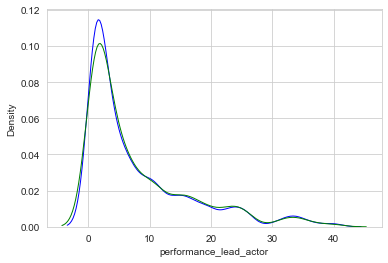

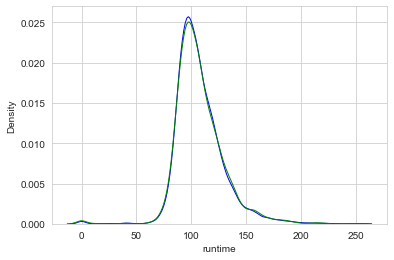

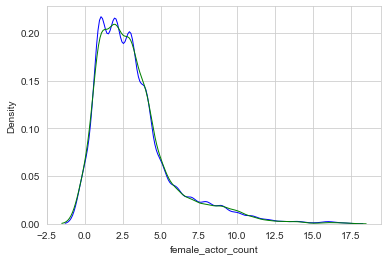

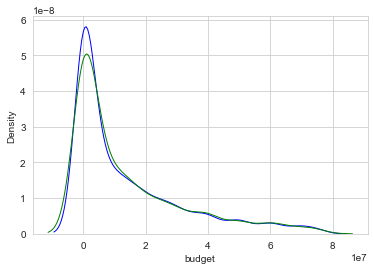

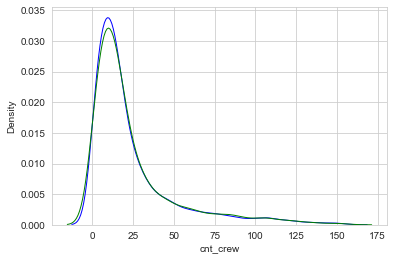

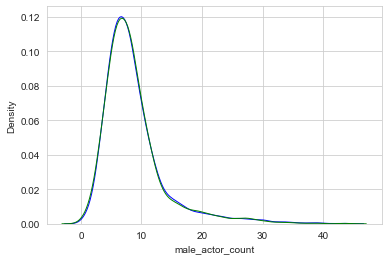

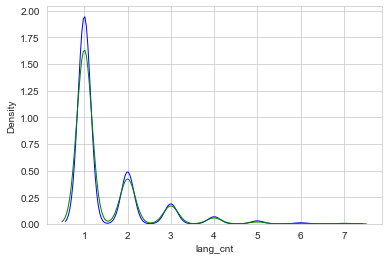

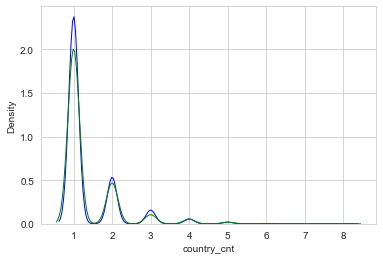

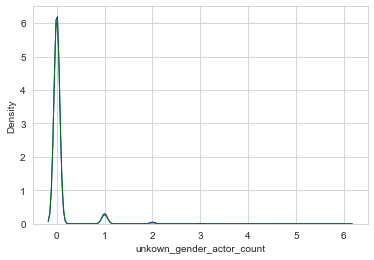

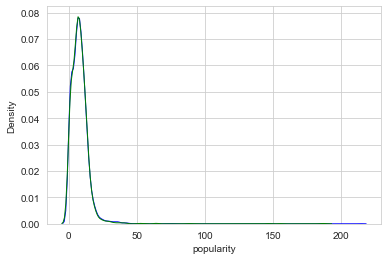

lang_cnt  has  202  nones


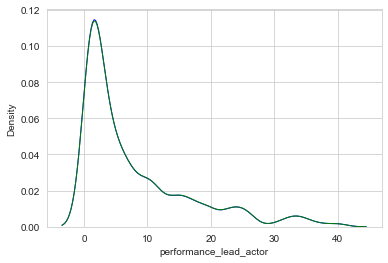

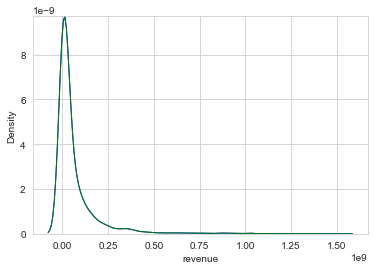

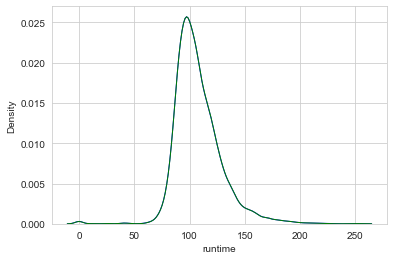

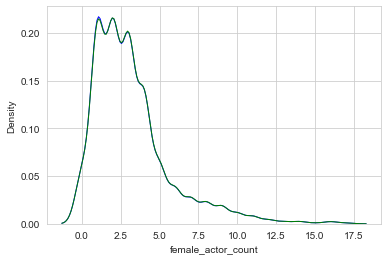

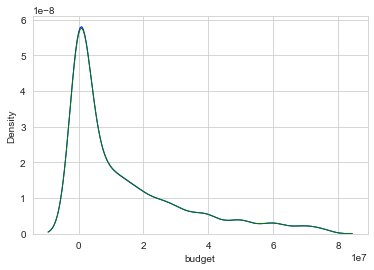

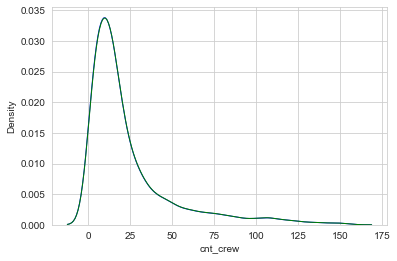

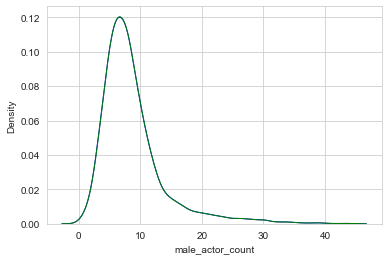

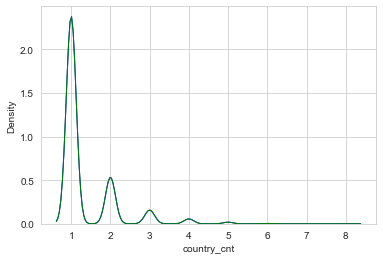

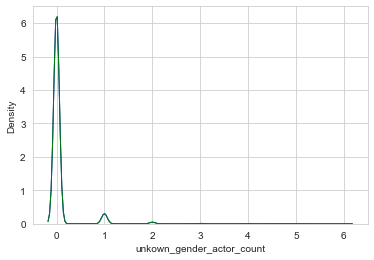

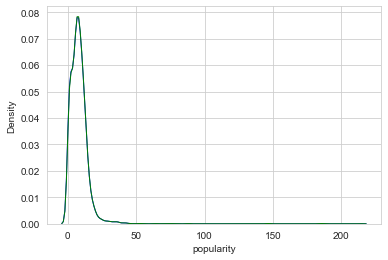

performance_lead_actor  has  408  nones


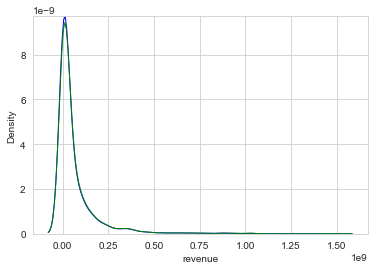

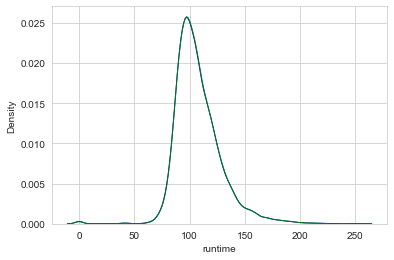

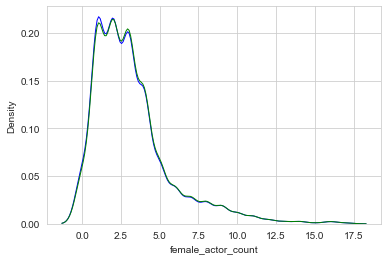

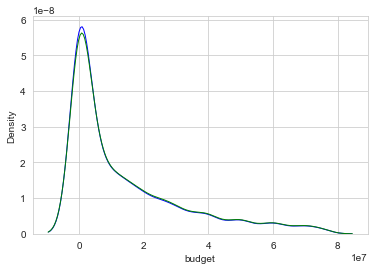

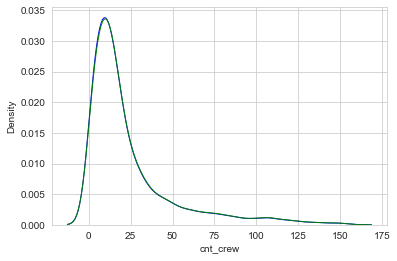

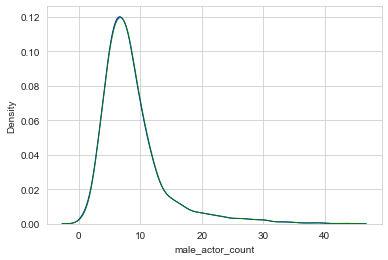

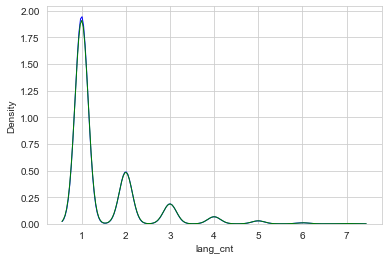

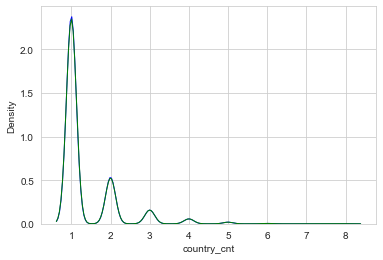

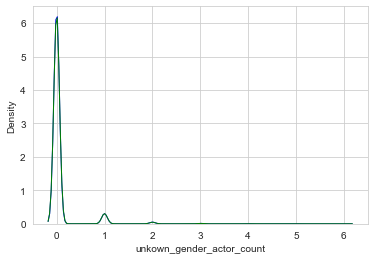

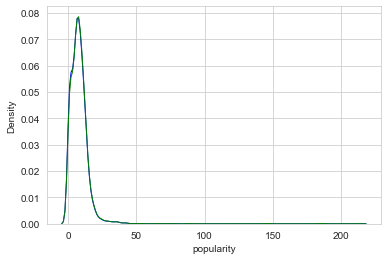

female_actor_count  has  148  nones
female_actor_count  does not have nones - ignore this column
male_actor_count  has  148  nones
male_actor_count  does not have nones - ignore this column
unkown_gender_actor_count  has  148  nones
unkown_gender_actor_count  does not have nones - ignore this column
country_cnt  has  283  nones


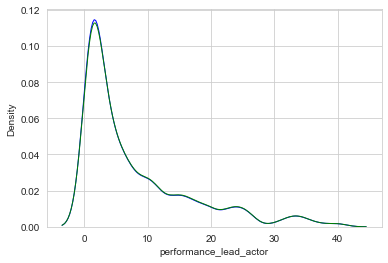

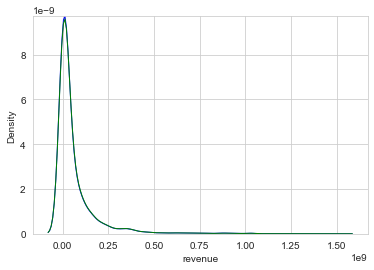

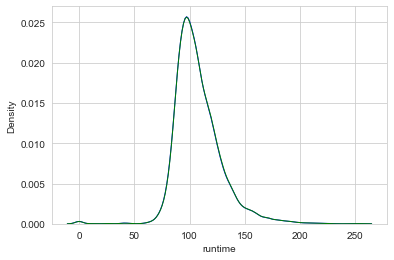

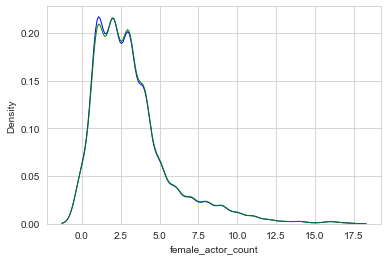

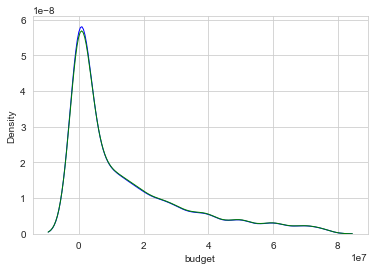

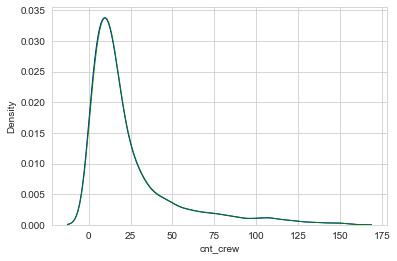

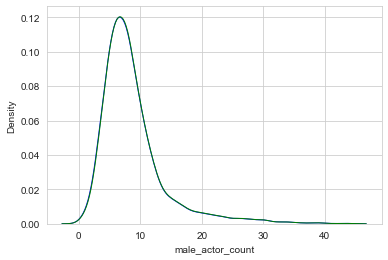

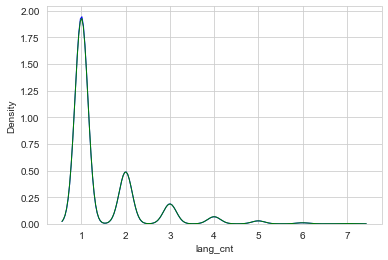

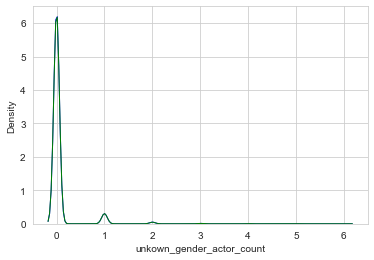

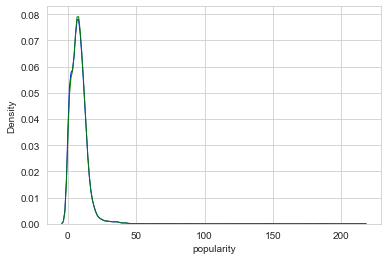

cnt_crew  has  148  nones
cnt_crew  does not have nones - ignore this column
budget  has  672  nones


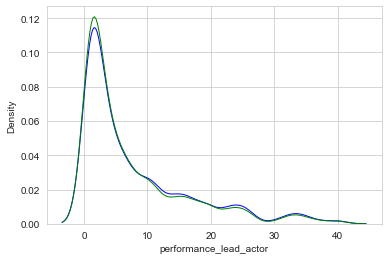

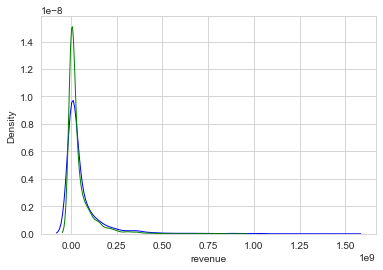

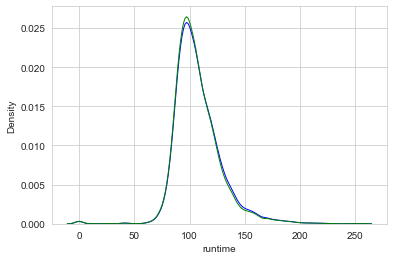

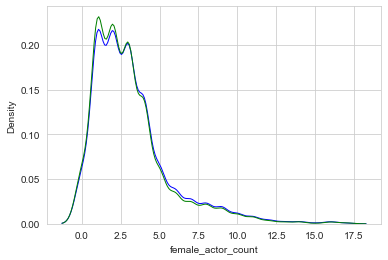

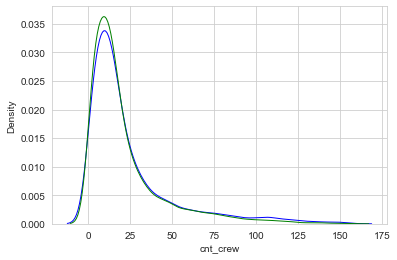

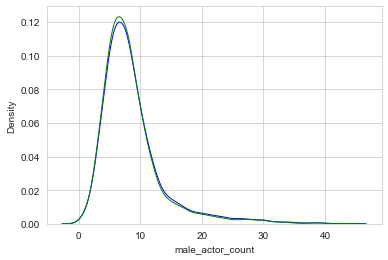

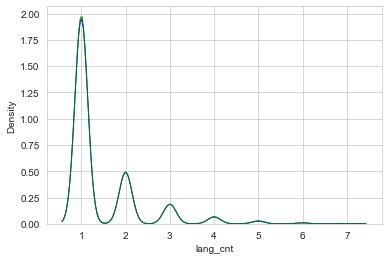

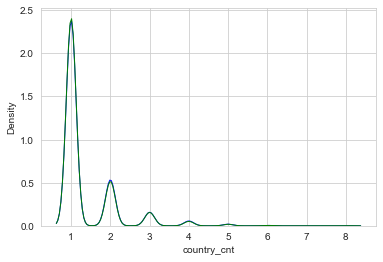

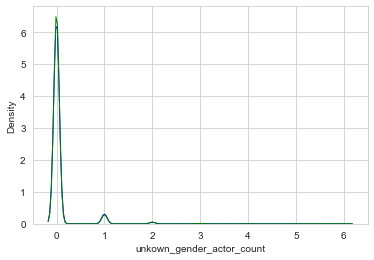

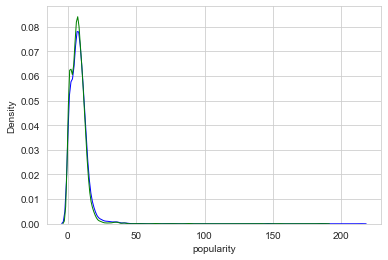

In [94]:
import warnings
warnings.filterwarnings("ignore")
""" 
sns.displot(df_temp,x= "revenue",
                        hist = False, kde = True,
                        kde_kws = {'shade': True, 'linewidth': 3})
sns.displot(df_temp, x= "revenue_is_na",
                        hist = False, kde = True,
                        kde_kws = {'shade': True, 'linewidth': 3})
"""

col_list = d_of_columns_types_local['float64'] + ['budget']
# num_of_figs = len(col_list)*(len(col_list)-1)
# ncols=5
# nrows=int(num_of_figs/5)
# print(ncols, " nrows: ", nrows)


for col in col_list:
    
    df_temp = df_movies_3.dropna(subset=[col])
    num_of_na = len(df_movies)-len(df_temp)
    
    print(col, " has ", num_of_na, " nones")
       
    if len(df_movies_3) == len(df_temp):
        print(col, " does not have nones - ignore this column")
        continue
    for col_sub in list(set(col_list) - set([col])):
        fig, ax = plt.subplots()
        sns.distplot(df_movies_3[col_sub],hist = False, kde = True, kde_kws = {'shade': False, 'linewidth': 1, "color": "B"})
        sns.distplot(df_temp[col_sub],hist = False, kde = True,kde_kws = {'shade': False, 'linewidth': 1, "color": "G"})
       
        plt.show()
    




## 3.2.2

###  Making desicion about the mechanism of missingness using the Kolmogorov-Smirnov test

In [95]:
def get_ks_2samp_df_on_na(_df_src, _col_list):
    #to do make it a function


    df_missing = get_rate_table_of_na_in_columns(_df_src)
    df_cols = pd.DataFrame({"var2": _col_list})
    df_missing['key'] = 1
    df_cols['key'] = 1
    df_missing_cross = pd.merge(df_missing, df_cols, on ='key').drop("key", 1).sort_values("var2", ascending=False)
    df_missing_cross = df_missing_cross[df_missing_cross["var"] != df_missing_cross["var2"] ]

    results = []
    for index ,row in df_missing_cross.iterrows():
        var = row['var']
        var2 = row['var2']
        statistic, pvalue = ks_2samp(_df_src[var2], _df_src.dropna(subset=[var])[var2],mode="asymp")
        result = {"var": var, "na.count": row["na.count"], "rate": row["rate"], "var2":var2, "statistic": statistic, "pvalue":pvalue, 
                  "distribution_changed": "+" if pvalue < 0.05 else "-" }
        results.append(result)

    return pd.DataFrame(results)


col_list = d_of_columns_types_local['float64'] + ['budget']

df_ks_2samp_df_on_na = get_ks_2samp_df_on_na(df_movies_3, col_list)

df_ks_2samp_df_on_na

var  na.count      rate                       var2  \
0                popularity         0  0.000000  unkown_gender_actor_count   
1    performance_lead_actor       260  3.586207  unkown_gender_actor_count   
2                 Adventure         0  0.000000  unkown_gender_actor_count   
3               country_cnt       135  1.862069  unkown_gender_actor_count   
4                    Family         0  0.000000  unkown_gender_actor_count   
..                      ...       ...       ...                        ...   
402                cnt_crew         0  0.000000                     budget   
403                      id         0  0.000000                     budget   
404                  Horror         0  0.000000                     budget   
405                   Crime         0  0.000000                     budget   
406      fixed_release_date         0  0.000000                     budget   

     statistic  pvalue distribution_changed  
0    -0.000000     1.0                    -  
1     0.000509     1.0                    -  
2    -0.000000     1.0                    -  
3     0.000219     1.0                    -  
4    -0.000000     1.0                    -  
..         ...     ...                  ...  
402  -0.000000     1.0                    -  
403  -0.000000     1.0                    -  
404  -0.000000     1.0                    -  
405  -0.000000     1.0                    -  
406  -0.000000     1.0                    -  

[407 rows x 7 columns]

In [96]:
df_ks_2samp_df_on_na[df_ks_2samp_df_on_na["distribution_changed"] == "+"]

var  na.count      rate        var2  statistic    pvalue  \
137  budget       524  7.227586  popularity   0.035183  0.000355   
341  budget       524  7.227586    cnt_crew   0.029480  0.004648   

    distribution_changed  
137                    +  
341                    +

### Making desicion about the mechanism of missingness using logistic regression

In [97]:
#add categories to the regression
category_cols = ['homepage' ,'best_seller',  'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'Thriller',  'War',
       'Western']

df_movies_4 = df_movies_3.copy()
for col in category_cols:
     df_movies_4[col] = df_movies_4[col].astype('float64')


In [98]:
#all the variables that enter to the regression
d_of_columns_types_local = get_dict_of_df_types(df_movies_4)
d_of_columns_types_local["float64"] 

['budget',
 'homepage',
 'popularity',
 'runtime',
 'revenue',
 'best_seller',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Thriller',
 'War',
 'Western',
 'lang_cnt',
 'performance_lead_actor',
 'female_actor_count',
 'male_actor_count',
 'unkown_gender_actor_count',
 'country_cnt',
 'cnt_crew']

In [99]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def pval_by_na(_df_src, _col_list_numeric_category, na_threshold_perc=2):
    df_src_with_nas = _df_src.copy()
    col_list = list(_df_src.columns)
    na_cols_list = []
    results = []
    num_of_rows = len(_df_src)
    for col in col_list:
       
        col_sum_of_nas = sum(_df_src[col].isna())
#         print(col, " sum of na: ", col_sum_of_nas)
        if float(col_sum_of_nas)*100.0/float(num_of_rows) > na_threshold_perc:
            na_col_name = col + "_is_na"
            na_cols_list.append(na_col_name)
            df_src_with_nas[na_col_name] = df_src_with_nas[col].isna().astype(int)
            x_cols_list = list(set(_col_list_numeric_category)-set([na_col_name, col]))
          
            X_train =  df_src_with_nas.loc[:,(x_cols_list)]
            y_train = df_src_with_nas.loc[:,(na_col_name)]
            formula = 'y_train ~ X_train'
            model = smf.glm(formula = formula, data=df_src_with_nas, family=sm.families.Binomial())
            model_fit_result = model.fit()
            model_fit_pval=model_fit_result.pvalues[1]
            result = {"var_na": na_col_name,"sum_of_nans":col_sum_of_nas ,"x_cols_list": x_cols_list, "p_value": model_fit_pval, 
                       "distribution_change": "+" if model_fit_pval < 0.05 else "-" }
            results.append(result)
#              print(result)
    return pd.DataFrame(results)

pval_by_na(df_movies_4, d_of_columns_types_local['float64'])
            


var_na  sum_of_nans  \
0                  budget_is_na          524   
1                 revenue_is_na         4303   
2  performance_lead_actor_is_na          260   

                                         x_cols_list   p_value  \
0  [runtime, Family, Science Fiction, revenue, Ad...  0.004097   
1  [runtime, budget, Family, Science Fiction, Adv...  0.101360   
2  [runtime, budget, Family, Science Fiction, rev...  0.353305   

  distribution_change  
0                   +  
1                   -  
2                   -

## 3.2.3 conclusions for the missing values:
I can not do imputation to budget because his distribution changes in Kolmogorov-Smirnov test - so I will replace 'budget' to category.
I can do imputation to the vars: performance_lead_actor_is_na and country_cnt_is_na because in both tests (Kolmogorov-Smirnov and regression) their distribution didn't changed.

### budget - replace var to category

In [100]:
def budget_level(_budget):
    if pd.isnull(_budget):
        return "missing_data"
    elif _budget == 0:
        return "0"
    elif _budget< 6.000000e+06:
        return "small"
    elif _budget< 2.200000e+07:
        return "medium"
    else:
        return "large"
    
df_movies_4['budget_cat']= df_movies_4['budget'].apply(budget_level)

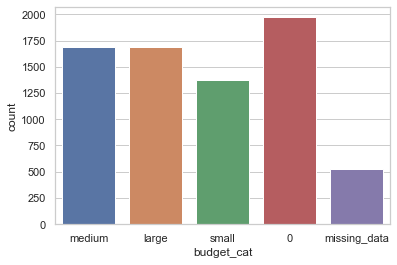

In [101]:
sns.set_theme(style="whitegrid")
sns.countplot(x='budget_cat', data=df_movies_4)

### Machine Learning imputation: kNN imputation

In [102]:
x_performance_lead_actor_list = list(set( d_of_columns_types_local['float64'])- set(['performance_lead_actor']))
x_performance_lead_actor_list

['runtime',
 'budget',
 'Family',
 'Science Fiction',
 'revenue',
 'Adventure',
 'Music',
 'male_actor_count',
 'Western',
 'unkown_gender_actor_count',
 'popularity',
 'Thriller',
 'Horror',
 'Foreign',
 'Animation',
 'Action',
 'Comedy',
 'female_actor_count',
 'lang_cnt',
 'homepage',
 'Romance',
 'Fantasy',
 'Drama',
 'War',
 'Mystery',
 'best_seller',
 'cnt_crew',
 'History',
 'Crime',
 'country_cnt',
 'Documentary']

In [103]:
df_temp = get_rate_table_of_na_in_columns(df_movies_4)
na_list = df_temp[df_temp["na.count"] > 0]["var"].tolist()

X_train = df_movies_4.copy()
X_train.dropna(inplace=True)

y_train_performance_lead_actor = X_train.loc[:,('performance_lead_actor')]
x_performance_lead_actor_list = list(set( d_of_columns_types_local['float64'])- set(na_list))
X_train_performance_lead_actor = X_train.loc[:,(x_performance_lead_actor_list)]


y_train_country_cnt = X_train.loc[:,('country_cnt')]
x_country_cnt_list = list(set( d_of_columns_types_local['float64'])- set(na_list))
X_train_country_cnt = X_train.loc[:,(x_country_cnt_list)]

print(y_train_performance_lead_actor.shape)
print(X_train_performance_lead_actor.shape)
X_train.head()

(2561,)
(2561, 27)


id      budget  homepage original_language  popularity popularity_cat  \
0   1  14000000.0       0.0                en    6.575393           High   
1   2  40000000.0       0.0                en    8.248895           High   
2   3   3300000.0       1.0                en   64.299988         Superb   
3   4   1200000.0       1.0                hi    3.174936         Medium   
4   5         0.0       0.0                ko    1.148070            Low   

   month  runtime     revenue  best_seller  ...  lang_cnt  \
0      2     93.0  12314651.0          1.0  ...       1.0   
1      8    113.0  95149435.0          1.0  ...       1.0   
2     10    105.0  13092000.0          1.0  ...       1.0   
3      3    122.0  16000000.0          1.0  ...       2.0   
4      2    118.0   3923970.0          1.0  ...       1.0   

   performance_lead_actor  female_actor_count  male_actor_count  \
0                     1.0                 5.0              11.0   
1                    10.0                 3.0               9.0   
2                     6.0                 8.0              19.0   
3                     1.0                 0.0               6.0   
4                     1.0                 1.0               3.0   

   unkown_gender_actor_count  country_cnt  cnt_crew  fixed_year  \
0                        0.0          1.0      72.0        2015   
1                        0.0          1.0       9.0        2004   
2                        0.0          1.0      64.0        2014   
3                        0.0          1.0       3.0        2012   
4                        0.0          1.0       2.0        2009   

   fixed_release_date  budget_cat  
0          2015-02-20      medium  
1          2004-08-06       large  
2          2014-10-10       small  
3          2012-03-09       small  
4          2009-02-05           0  

[5 rows x 39 columns]

In [104]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=5)  
reg.fit(X_train_performance_lead_actor, y_train_performance_lead_actor)
X_test_performance_lead_actor = df_movies_4.loc[(df_movies_4['performance_lead_actor'].isnull()),(x_performance_lead_actor_list)]

y_pred_performance_lead_actor = reg.predict(X_test_performance_lead_actor)

In [105]:
reg = KNeighborsRegressor(n_neighbors=5)  
reg.fit(X_train_country_cnt, y_train_country_cnt)
X_test_country_cnt = df_movies_4.loc[(df_movies_4['country_cnt'].isnull()),(x_country_cnt_list)]

y_pred_country_cnt= reg.predict(X_test_country_cnt)


In [106]:
X1 = X_test_country_cnt.copy()
X1['country_cnt_2'] = y_pred_country_cnt


In [107]:
X2 = X_test_performance_lead_actor.copy()
X2['performance_lead_actor_2'] = y_pred_performance_lead_actor

In [108]:
len(y_pred_country_cnt)
y_train1 = pd.DataFrame({'y1':y_train_country_cnt, 'popularity1':X_train_country_cnt['popularity']})
y_train1['cl'] = 0

y_pred1 = pd.DataFrame({'y1':y_pred_country_cnt, 'popularity1':X_test_country_cnt['popularity']})
y_pred1['cl'] = 1

y = pd.concat([y_train1,y_pred1])
y.head()


y1  popularity1  cl
0  1.0     6.575393   0
1  1.0     8.248895   0
2  1.0    64.299988   0
3  1.0     3.174936   0
4  1.0     1.148070   0

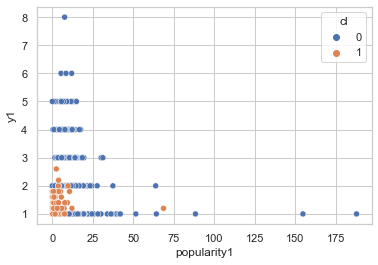

In [109]:
sns.scatterplot(x='popularity1',y='y1', data=y,hue='cl')


In [110]:
len(y_pred_performance_lead_actor)
y_train2 = pd.DataFrame({'y2':y_train_performance_lead_actor, 'popularity2':X_train_performance_lead_actor['popularity']})
y_train2['cl'] = 0

y_pred2 = pd.DataFrame({'y2':y_pred_performance_lead_actor, 'popularity2':X_test_performance_lead_actor['popularity']})
y_pred2['cl'] = 1

y = pd.concat([y_train2,y_pred2])
y.head()


y2  popularity2  cl
0   1.0     6.575393   0
1  10.0     8.248895   0
2   6.0    64.299988   0
3   1.0     3.174936   0
4   1.0     1.148070   0

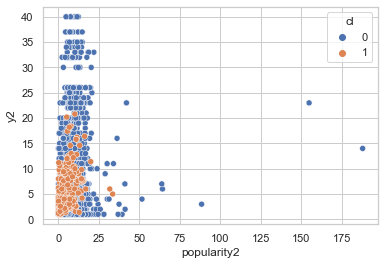

In [111]:
sns.scatterplot(x='popularity2',y='y2', data=y,hue='cl')

In [112]:
df_movies_4_impute = pd.merge(df_movies_4, X1[['country_cnt_2']] , left_index=True, right_index=True, how="left")
df_movies_4_impute['country_cnt'] = df_movies_4_impute['country_cnt'].fillna(df_movies_4_impute ["country_cnt_2"])

df_movies_4_impute = pd.merge(df_movies_4_impute, X2[['performance_lead_actor_2']] , left_index=True, right_index=True, how="left") 
df_movies_4_impute['performance_lead_actor'] = df_movies_4_impute['performance_lead_actor'].fillna(df_movies_4_impute ["performance_lead_actor_2"])
df_movies_4_impute = df_movies_4_impute.drop(columns=["country_cnt_2", "performance_lead_actor_2"])



In [113]:
sum(df_movies_4_impute['country_cnt'].isna())

0

In [114]:
df_clean= df_movies_4_impute
df_clean.head()

id      budget  homepage original_language  popularity popularity_cat  \
0   1  14000000.0       0.0                en    6.575393           High   
1   2  40000000.0       0.0                en    8.248895           High   
2   3   3300000.0       1.0                en   64.299988         Superb   
3   4   1200000.0       1.0                hi    3.174936         Medium   
4   5         0.0       0.0                ko    1.148070            Low   

   month  runtime     revenue  best_seller  ...  lang_cnt  \
0      2     93.0  12314651.0          1.0  ...       1.0   
1      8    113.0  95149435.0          1.0  ...       1.0   
2     10    105.0  13092000.0          1.0  ...       1.0   
3      3    122.0  16000000.0          1.0  ...       2.0   
4      2    118.0   3923970.0          1.0  ...       1.0   

   performance_lead_actor  female_actor_count  male_actor_count  \
0                     1.0                 5.0              11.0   
1                    10.0                 3.0               9.0   
2                     6.0                 8.0              19.0   
3                     1.0                 0.0               6.0   
4                     1.0                 1.0               3.0   

   unkown_gender_actor_count  country_cnt  cnt_crew  fixed_year  \
0                        0.0          1.0      72.0        2015   
1                        0.0          1.0       9.0        2004   
2                        0.0          1.0      64.0        2014   
3                        0.0          1.0       3.0        2012   
4                        0.0          1.0       2.0        2009   

   fixed_release_date  budget_cat  
0          2015-02-20      medium  
1          2004-08-06       large  
2          2014-10-10       small  
3          2012-03-09       small  
4          2009-02-05           0  

[5 rows x 39 columns]

In [115]:
print(df_clean.isnull().sum())

id                              0
budget                        524
homepage                        0
original_language               0
popularity                      0
popularity_cat                  0
month                           0
runtime                         0
revenue                      4303
best_seller                     0
Action                          0
Adventure                       0
Animation                       0
Comedy                          0
Crime                           0
Documentary                     0
Drama                           0
Family                          0
Fantasy                         0
Foreign                         0
History                         0
Horror                          0
Music                           0
Mystery                         0
Romance                         0
Science Fiction                 0
Thriller                        0
War                             0
Western                         0
lang_cnt      

### Number of languages

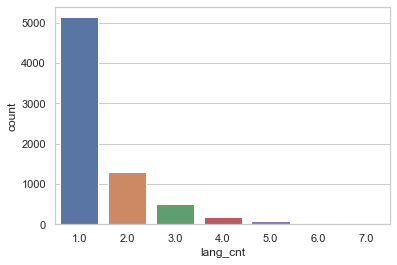

In [116]:
sns.set_theme(style="whitegrid")
g=sns.countplot(x="lang_cnt", data=df_clean)

In [117]:
def lang_level(_lang_cnt):
    if pd.isnull(_lang_cnt):
        return "missing_data"
    elif _lang_cnt == 1:
        return "1"
    else:
        return "more than 1"
    
df_clean['language_cnt']= df_clean['lang_cnt'].apply(lang_level)

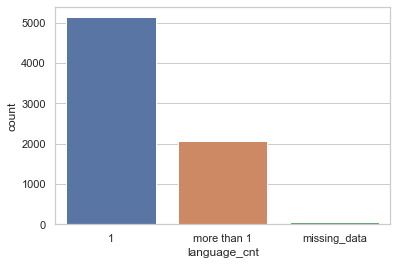

In [118]:
sns.set_theme(style="whitegrid")
g=sns.countplot(x="language_cnt", data=df_clean)

In [119]:
df_clean.drop(['lang_cnt'], axis=1, inplace=True)
df_clean.head()

id      budget  homepage original_language  popularity popularity_cat  \
0   1  14000000.0       0.0                en    6.575393           High   
1   2  40000000.0       0.0                en    8.248895           High   
2   3   3300000.0       1.0                en   64.299988         Superb   
3   4   1200000.0       1.0                hi    3.174936         Medium   
4   5         0.0       0.0                ko    1.148070            Low   

   month  runtime     revenue  best_seller  ...  performance_lead_actor  \
0      2     93.0  12314651.0          1.0  ...                     1.0   
1      8    113.0  95149435.0          1.0  ...                    10.0   
2     10    105.0  13092000.0          1.0  ...                     6.0   
3      3    122.0  16000000.0          1.0  ...                     1.0   
4      2    118.0   3923970.0          1.0  ...                     1.0   

   female_actor_count  male_actor_count  unkown_gender_actor_count  \
0                 5.0              11.0                        0.0   
1                 3.0               9.0                        0.0   
2                 8.0              19.0                        0.0   
3                 0.0               6.0                        0.0   
4                 1.0               3.0                        0.0   

   country_cnt  cnt_crew  fixed_year  fixed_release_date  budget_cat  \
0          1.0      72.0        2015          2015-02-20      medium   
1          1.0       9.0        2004          2004-08-06       large   
2          1.0      64.0        2014          2014-10-10       small   
3          1.0       3.0        2012          2012-03-09       small   
4          1.0       2.0        2009          2009-02-05           0   

   language_cnt  
0             1  
1             1  
2             1  
3   more than 1  
4             1  

[5 rows x 39 columns]

### gender actor and crew

In [120]:
df_clean.head()

id      budget  homepage original_language  popularity popularity_cat  \
0   1  14000000.0       0.0                en    6.575393           High   
1   2  40000000.0       0.0                en    8.248895           High   
2   3   3300000.0       1.0                en   64.299988         Superb   
3   4   1200000.0       1.0                hi    3.174936         Medium   
4   5         0.0       0.0                ko    1.148070            Low   

   month  runtime     revenue  best_seller  ...  performance_lead_actor  \
0      2     93.0  12314651.0          1.0  ...                     1.0   
1      8    113.0  95149435.0          1.0  ...                    10.0   
2     10    105.0  13092000.0          1.0  ...                     6.0   
3      3    122.0  16000000.0          1.0  ...                     1.0   
4      2    118.0   3923970.0          1.0  ...                     1.0   

   female_actor_count  male_actor_count  unkown_gender_actor_count  \
0                 5.0              11.0                        0.0   
1                 3.0               9.0                        0.0   
2                 8.0              19.0                        0.0   
3                 0.0               6.0                        0.0   
4                 1.0               3.0                        0.0   

   country_cnt  cnt_crew  fixed_year  fixed_release_date  budget_cat  \
0          1.0      72.0        2015          2015-02-20      medium   
1          1.0       9.0        2004          2004-08-06       large   
2          1.0      64.0        2014          2014-10-10       small   
3          1.0       3.0        2012          2012-03-09       small   
4          1.0       2.0        2009          2009-02-05           0   

   language_cnt  
0             1  
1             1  
2             1  
3   more than 1  
4             1  

[5 rows x 39 columns]

In [121]:
df_clean['actor_count'] = df_clean['female_actor_count'] + df_clean['male_actor_count'] + df_clean['unkown_gender_actor_count']
df_clean['actor_female_perc'] = df_clean['female_actor_count']/df_clean['actor_count']
df_clean['actor_male_perc'] = df_clean['male_actor_count']/df_clean['actor_count']
df_clean['actor_unkown_gender_perc'] = df_clean['unkown_gender_actor_count']/df_clean['actor_count']

In [122]:
df_clean.drop(['actor_count','female_actor_count','male_actor_count','unkown_gender_actor_count' ], axis=1, inplace=True)
df_clean.head()

id      budget  homepage original_language  popularity popularity_cat  \
0   1  14000000.0       0.0                en    6.575393           High   
1   2  40000000.0       0.0                en    8.248895           High   
2   3   3300000.0       1.0                en   64.299988         Superb   
3   4   1200000.0       1.0                hi    3.174936         Medium   
4   5         0.0       0.0                ko    1.148070            Low   

   month  runtime     revenue  best_seller  ...  performance_lead_actor  \
0      2     93.0  12314651.0          1.0  ...                     1.0   
1      8    113.0  95149435.0          1.0  ...                    10.0   
2     10    105.0  13092000.0          1.0  ...                     6.0   
3      3    122.0  16000000.0          1.0  ...                     1.0   
4      2    118.0   3923970.0          1.0  ...                     1.0   

   country_cnt  cnt_crew  fixed_year  fixed_release_date  budget_cat  \
0          1.0      72.0        2015          2015-02-20      medium   
1          1.0       9.0        2004          2004-08-06       large   
2          1.0      64.0        2014          2014-10-10       small   
3          1.0       3.0        2012          2012-03-09       small   
4          1.0       2.0        2009          2009-02-05           0   

   language_cnt  actor_female_perc  actor_male_perc  actor_unkown_gender_perc  
0             1           0.312500         0.687500                       0.0  
1             1           0.250000         0.750000                       0.0  
2             1           0.296296         0.703704                       0.0  
3   more than 1           0.000000         1.000000                       0.0  
4             1           0.250000         0.750000                       0.0  

[5 rows x 39 columns]

### original language

In [123]:
df_clean['original_language'].value_counts().to_dict()

{'en': 6222,
 'fr': 199,
 'hi': 117,
 'ru': 102,
 'es': 92,
 'ja': 89,
 'it': 55,
 'ko': 48,
 'de': 47,
 'zh': 46,
 'cn': 41,
 'ta': 31,
 'sv': 20,
 'da': 17,
 'pt': 13,
 'ml': 12,
 'nl': 11,
 'te': 9,
 'tr': 9,
 'ro': 8,
 'he': 6,
 'fa': 5,
 'th': 5,
 'no': 5,
 'pl': 5,
 'hu': 4,
 'el': 3,
 'fi': 3,
 'bn': 3,
 'cs': 3,
 'sr': 3,
 'id': 3,
 'xx': 2,
 'bm': 2,
 'is': 1,
 'ur': 1,
 'vi': 1,
 'ka': 1,
 'kn': 1,
 'mr': 1,
 'ca': 1,
 'nb': 1,
 'ar': 1,
 'af': 1}

In [124]:
numbers = {'set_of_numbers': ["en","fr","hi","ru","es","ja"]}
df = pd.DataFrame(numbers,columns=['set_of_numbers'])
df

set_of_numbers
0             en
1             fr
2             hi
3             ru
4             es
5             ja

In [125]:
df_clean['orig_lang_reduced'] =  df_clean['original_language'].apply(lambda x: str(x) if x in ["en","fr","in","ru","es","ja"] else 'other')
df_clean

id      budget  homepage original_language  popularity popularity_cat  \
0        1  14000000.0       0.0                en    6.575393           High   
1        2  40000000.0       0.0                en    8.248895           High   
2        3   3300000.0       1.0                en   64.299988         Superb   
3        4   1200000.0       1.0                hi    3.174936         Medium   
4        5         0.0       0.0                ko    1.148070            Low   
...    ...         ...       ...               ...         ...            ...   
7393  7394  42000000.0       0.0                en    9.970359         Superb   
7394  7395  19000000.0       0.0                en    6.046516           High   
7395  7396  16000000.0       0.0                en    9.596883         Superb   
7396  7397   2000000.0       0.0                en   20.359337         Superb   
7397  7398     64000.0       0.0                fr   11.305910         Superb   

      month  runtime     revenue  best_seller  ...  country_cnt  cnt_crew  \
0         2     93.0  12314651.0          1.0  ...          1.0      72.0   
1         8    113.0  95149435.0          1.0  ...          1.0       9.0   
2        10    105.0  13092000.0          1.0  ...          1.0      64.0   
3         3    122.0  16000000.0          1.0  ...          1.0       3.0   
4         2    118.0   3923970.0          1.0  ...          1.0       2.0   
...     ...      ...         ...          ...  ...          ...       ...   
7393      8    118.0         NaN          1.0  ...          2.0      11.0   
7394      8     95.0         NaN          1.0  ...          1.0      94.0   
7395     12    129.0         NaN          1.0  ...          1.0      12.0   
7396      2    100.0         NaN          1.0  ...          1.0      29.0   
7397      9     85.0         NaN          1.0  ...          1.0      25.0   

      fixed_year  fixed_release_date  budget_cat  language_cnt  \
0           2015          2015-02-20      medium             1   
1           2004          2004-08-06       large             1   
2           2014          2014-10-10       small             1   
3           2012          2012-03-09       small   more than 1   
4           2009          2009-02-05           0             1   
...          ...                 ...         ...           ...   
7393        2001          2001-08-03       large   more than 1   
7394        2004          2004-08-20      medium             1   
7395        1982          1982-12-08      medium             1   
7396        2015          2015-02-04       small             1   
7397        1962          1962-09-20       small             1   

      actor_female_perc  actor_male_perc  actor_unkown_gender_perc  \
0              0.312500         0.687500                       0.0   
1              0.250000         0.750000                       0.0   
2              0.296296         0.703704                       0.0   
3              0.000000         1.000000                       0.0   
4              0.250000         0.750000                       0.0   
...                 ...              ...                       ...   
7393           0.333333         0.666667                       0.0   
7394           0.333333         0.666667                       0.0   
7395           0.272727         0.727273                       0.0   
7396           0.250000         0.750000                       0.0   
7397           0.250000         0.750000                       0.0   

      orig_lang_reduced  
0                    en  
1                    en  
2                    en  
3                 other  
4                 other  
...                 ...  
7393                 en  
7394                 en  
7395                 en  
7396                 en  
7397                 fr  

[7250 rows x 40 columns]

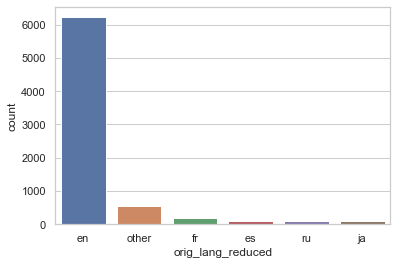

In [126]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='orig_lang_reduced', data=df_clean)

In [127]:
df_clean.drop(['original_language'], axis=1, inplace=True)
df_clean.head()

id      budget  homepage  popularity popularity_cat  month  runtime  \
0   1  14000000.0       0.0    6.575393           High      2     93.0   
1   2  40000000.0       0.0    8.248895           High      8    113.0   
2   3   3300000.0       1.0   64.299988         Superb     10    105.0   
3   4   1200000.0       1.0    3.174936         Medium      3    122.0   
4   5         0.0       0.0    1.148070            Low      2    118.0   

      revenue  best_seller  Action  ...  country_cnt  cnt_crew  fixed_year  \
0  12314651.0          1.0     0.0  ...          1.0      72.0        2015   
1  95149435.0          1.0     0.0  ...          1.0       9.0        2004   
2  13092000.0          1.0     0.0  ...          1.0      64.0        2014   
3  16000000.0          1.0     0.0  ...          1.0       3.0        2012   
4   3923970.0          1.0     1.0  ...          1.0       2.0        2009   

   fixed_release_date  budget_cat  language_cnt  actor_female_perc  \
0          2015-02-20      medium             1           0.312500   
1          2004-08-06       large             1           0.250000   
2          2014-10-10       small             1           0.296296   
3          2012-03-09       small   more than 1           0.000000   
4          2009-02-05           0             1           0.250000   

   actor_male_perc  actor_unkown_gender_perc  orig_lang_reduced  
0         0.687500                       0.0                 en  
1         0.750000                       0.0                 en  
2         0.703704                       0.0                 en  
3         1.000000                       0.0              other  
4         0.750000                       0.0              other  

[5 rows x 39 columns]

In [128]:
df_clean.drop(['budget'], axis=1, inplace=True)
df_clean.head()

id  homepage  popularity popularity_cat  month  runtime     revenue  \
0   1       0.0    6.575393           High      2     93.0  12314651.0   
1   2       0.0    8.248895           High      8    113.0  95149435.0   
2   3       1.0   64.299988         Superb     10    105.0  13092000.0   
3   4       1.0    3.174936         Medium      3    122.0  16000000.0   
4   5       0.0    1.148070            Low      2    118.0   3923970.0   

   best_seller  Action  Adventure  ...  country_cnt  cnt_crew  fixed_year  \
0          1.0     0.0        0.0  ...          1.0      72.0        2015   
1          1.0     0.0        0.0  ...          1.0       9.0        2004   
2          1.0     0.0        0.0  ...          1.0      64.0        2014   
3          1.0     0.0        0.0  ...          1.0       3.0        2012   
4          1.0     1.0        0.0  ...          1.0       2.0        2009   

   fixed_release_date  budget_cat  language_cnt  actor_female_perc  \
0          2015-02-20      medium             1           0.312500   
1          2004-08-06       large             1           0.250000   
2          2014-10-10       small             1           0.296296   
3          2012-03-09       small   more than 1           0.000000   
4          2009-02-05           0             1           0.250000   

   actor_male_perc  actor_unkown_gender_perc  orig_lang_reduced  
0         0.687500                       0.0                 en  
1         0.750000                       0.0                 en  
2         0.703704                       0.0                 en  
3         1.000000                       0.0              other  
4         0.750000                       0.0              other  

[5 rows x 38 columns]

## Adding variables

### day of week

In [129]:
# add variable day of week
df_clean['day_of_week_name'] = df_clean['fixed_release_date'].dt.day_name()
df_clean.head()

id  homepage  popularity popularity_cat  month  runtime     revenue  \
0   1       0.0    6.575393           High      2     93.0  12314651.0   
1   2       0.0    8.248895           High      8    113.0  95149435.0   
2   3       1.0   64.299988         Superb     10    105.0  13092000.0   
3   4       1.0    3.174936         Medium      3    122.0  16000000.0   
4   5       0.0    1.148070            Low      2    118.0   3923970.0   

   best_seller  Action  Adventure  ...  cnt_crew  fixed_year  \
0          1.0     0.0        0.0  ...      72.0        2015   
1          1.0     0.0        0.0  ...       9.0        2004   
2          1.0     0.0        0.0  ...      64.0        2014   
3          1.0     0.0        0.0  ...       3.0        2012   
4          1.0     1.0        0.0  ...       2.0        2009   

   fixed_release_date  budget_cat  language_cnt  actor_female_perc  \
0          2015-02-20      medium             1           0.312500   
1          2004-08-06       large             1           0.250000   
2          2014-10-10       small             1           0.296296   
3          2012-03-09       small   more than 1           0.000000   
4          2009-02-05           0             1           0.250000   

   actor_male_perc  actor_unkown_gender_perc  orig_lang_reduced  \
0         0.687500                       0.0                 en   
1         0.750000                       0.0                 en   
2         0.703704                       0.0                 en   
3         1.000000                       0.0              other   
4         0.750000                       0.0              other   

   day_of_week_name  
0            Friday  
1            Friday  
2            Friday  
3            Friday  
4          Thursday  

[5 rows x 39 columns]

In [130]:
df_agg = df_clean[(df_clean['fixed_year']>=1995) & (df_clean['fixed_year']<2017) ].groupby(['fixed_year','month'])['revenue'].mean().reset_index()


df_agg['year_month'] = pd.to_datetime(df_agg.fixed_year.astype(str) + df_agg.month.astype(str), format='%Y%m')



In [131]:
df_pivot_agg=df_agg[['fixed_year','month','revenue']].pivot(index='fixed_year', columns='month', values='revenue')

In [132]:
df_agg

fixed_year  month       revenue year_month
0          1995      1  2.211355e+07 1995-01-01
1          1995      2  4.653402e+07 1995-02-01
2          1995      3  7.499408e+07 1995-03-01
3          1995      4  6.832385e+07 1995-04-01
4          1995      5  1.295572e+08 1995-05-01
..          ...    ...           ...        ...
259        2016      8  6.222762e+07 2016-08-01
260        2016      9  4.805370e+07 2016-09-01
261        2016     10  5.577026e+07 2016-10-01
262        2016     11  3.350294e+07 2016-11-01
263        2016     12  1.242836e+08 2016-12-01

[264 rows x 4 columns]

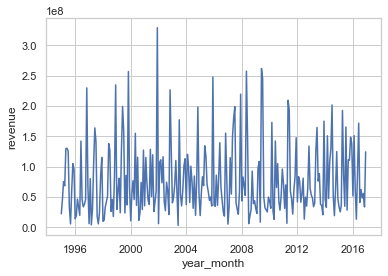

In [133]:
# sns.lineplot(data=df_agg)

sns.lineplot(data=df_agg, x="year_month", y="revenue")

## from time series - seasional

In [134]:
import statsmodels.api as sm

In [135]:
df_agg[['year_month','revenue']].set_index('year_month')

revenue
year_month              
1995-01-01  2.211355e+07
1995-02-01  4.653402e+07
1995-03-01  7.499408e+07
1995-04-01  6.832385e+07
1995-05-01  1.295572e+08
...                  ...
2016-08-01  6.222762e+07
2016-09-01  4.805370e+07
2016-10-01  5.577026e+07
2016-11-01  3.350294e+07
2016-12-01  1.242836e+08

[264 rows x 1 columns]

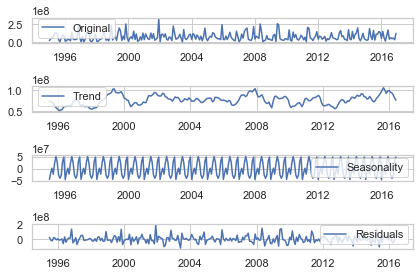

In [136]:
from statsmodels.tsa.seasonal import seasonal_decompose
df = df_agg[['year_month','revenue']].set_index('year_month') 
decomposition = seasonal_decompose(df , model='additive', freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [137]:
decomposition.seasonal

revenue
year_month              
1995-01-01 -4.527581e+07
1995-02-01 -1.710743e+07
1995-03-01  1.552855e+06
1995-04-01 -2.314095e+07
1995-05-01  2.252986e+07
...                  ...
2016-08-01 -2.655139e+07
2016-09-01 -4.056298e+07
2016-10-01 -2.819516e+07
2016-11-01  3.044717e+07
2016-12-01  4.868630e+07

[264 rows x 1 columns]

In [138]:
df_2012 = decomposition.seasonal[decomposition.seasonal.index.year == 2012]
df_2012['month'] = df_2012.index.month
df_2012 = df_2012.reset_index()
df_2012 = df_2012.rename(columns = {'revenue': 'montly_seasonal'})
df_2012 

year_month  montly_seasonal  month
0  2012-01-01    -4.527581e+07      1
1  2012-02-01    -1.710743e+07      2
2  2012-03-01     1.552855e+06      3
3  2012-04-01    -2.314095e+07      4
4  2012-05-01     2.252986e+07      5
5  2012-06-01     5.122427e+07      6
6  2012-07-01     2.639327e+07      7
7  2012-08-01    -2.655139e+07      8
8  2012-09-01    -4.056298e+07      9
9  2012-10-01    -2.819516e+07     10
10 2012-11-01     3.044717e+07     11
11 2012-12-01     4.868630e+07     12

In [139]:
df_clean=df_clean.merge(df_2012[['montly_seasonal','month']], how='inner', on='month')
df_clean.head()

id  homepage  popularity popularity_cat  month  runtime     revenue  \
0   1       0.0    6.575393           High      2     93.0  12314651.0   
1   5       0.0    1.148070            Low      2    118.0   3923970.0   
2   9       0.0    6.902423           High      2    100.0  34327391.0   
3  19       0.0    6.496259           High      2     96.0   1749457.0   
4  45       1.0    5.615303         Medium      2     88.0  47175038.0   

   best_seller  Action  Adventure  ...  fixed_year  fixed_release_date  \
0          1.0     0.0        0.0  ...        2015          2015-02-20   
1          1.0     1.0        0.0  ...        2009          2009-02-05   
2          1.0     1.0        1.0  ...        1996          1996-02-16   
3          1.0     0.0        0.0  ...        2011          2011-02-02   
4          1.0     0.0        0.0  ...        2005          2005-02-04   

   budget_cat  language_cnt  actor_female_perc  actor_male_perc  \
0      medium             1           0.312500         0.687500   
1           0             1           0.250000         0.750000   
2           0             1           0.375000         0.625000   
3      medium   more than 1           0.266667         0.733333   
4      medium             1           0.000000         1.000000   

   actor_unkown_gender_perc  orig_lang_reduced  day_of_week_name  \
0                       0.0                 en            Friday   
1                       0.0              other          Thursday   
2                       0.0                 en            Friday   
3                       0.0                 en         Wednesday   
4                       0.0                 en            Friday   

   montly_seasonal  
0    -1.710743e+07  
1    -1.710743e+07  
2    -1.710743e+07  
3    -1.710743e+07  
4    -1.710743e+07  

[5 rows x 40 columns]

### day of month

In [140]:
df_clean["day_of_month"] = df_clean['fixed_release_date'].dt.day

In [141]:
df_clean.head()

id  homepage  popularity popularity_cat  month  runtime     revenue  \
0   1       0.0    6.575393           High      2     93.0  12314651.0   
1   5       0.0    1.148070            Low      2    118.0   3923970.0   
2   9       0.0    6.902423           High      2    100.0  34327391.0   
3  19       0.0    6.496259           High      2     96.0   1749457.0   
4  45       1.0    5.615303         Medium      2     88.0  47175038.0   

   best_seller  Action  Adventure  ...  fixed_release_date  budget_cat  \
0          1.0     0.0        0.0  ...          2015-02-20      medium   
1          1.0     1.0        0.0  ...          2009-02-05           0   
2          1.0     1.0        1.0  ...          1996-02-16           0   
3          1.0     0.0        0.0  ...          2011-02-02      medium   
4          1.0     0.0        0.0  ...          2005-02-04      medium   

   language_cnt  actor_female_perc  actor_male_perc  actor_unkown_gender_perc  \
0             1           0.312500         0.687500                       0.0   
1             1           0.250000         0.750000                       0.0   
2             1           0.375000         0.625000                       0.0   
3   more than 1           0.266667         0.733333                       0.0   
4             1           0.000000         1.000000                       0.0   

   orig_lang_reduced  day_of_week_name  montly_seasonal  day_of_month  
0                 en            Friday    -1.710743e+07            20  
1              other          Thursday    -1.710743e+07             5  
2                 en            Friday    -1.710743e+07            16  
3                 en         Wednesday    -1.710743e+07             2  
4                 en            Friday    -1.710743e+07             4  

[5 rows x 41 columns]

In [142]:
df_clean['day_of_week_name']=df_clean['day_of_week_name'].astype('category')

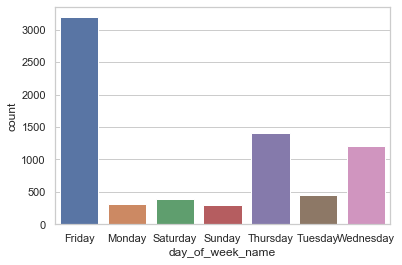

In [143]:
sns.set_theme(style="whitegrid")
sns.countplot(x="day_of_week_name", data=df_clean)

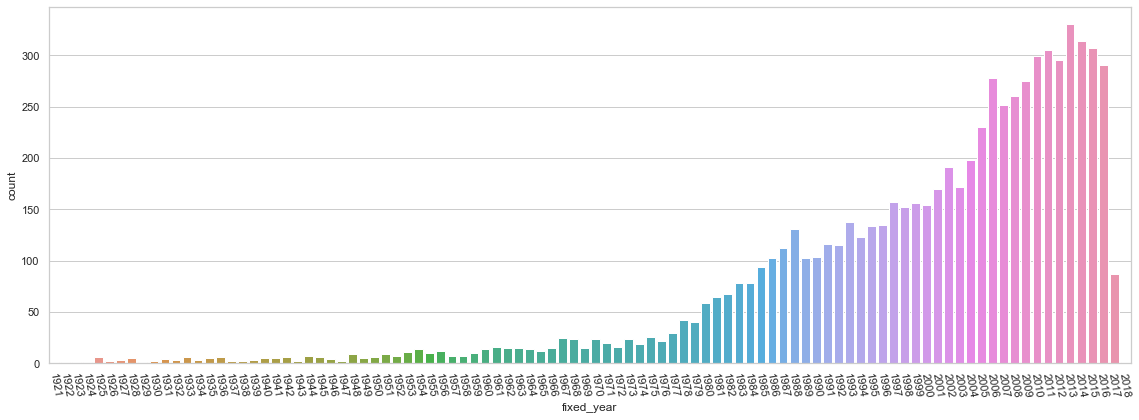

In [144]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 6))
sns.countplot(x="fixed_year", data=df_clean)
plt.xticks(rotation=1000)
plt.tight_layout()

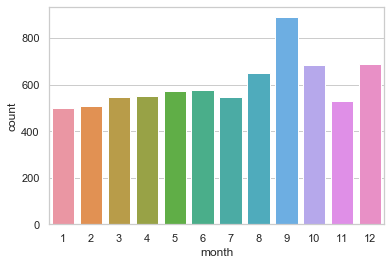

In [145]:
sns.set_theme(style="whitegrid")
g=sns.countplot(x="month", data=df_clean)

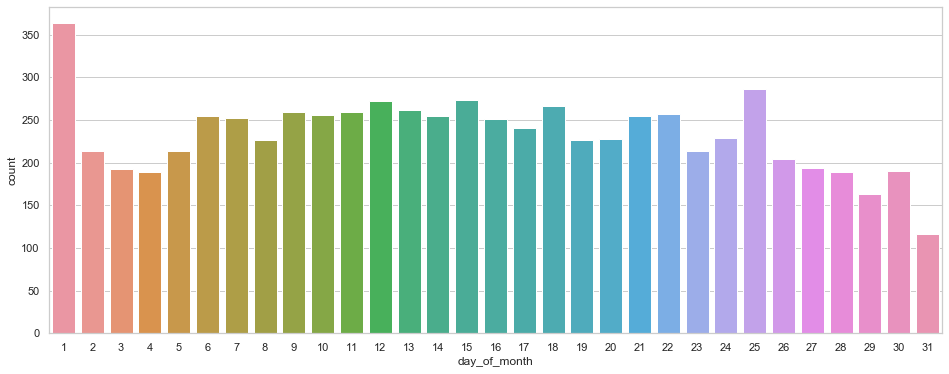

In [146]:
plt.figure(figsize=(16, 6))
sns.countplot(x="day_of_month", data=df_clean)

# PART 4 - Exploratory data analysis after Data Cleansing

## 1- Descriptive Statistics


In [147]:
df_clean.head()

id  homepage  popularity popularity_cat  month  runtime     revenue  \
0   1       0.0    6.575393           High      2     93.0  12314651.0   
1   5       0.0    1.148070            Low      2    118.0   3923970.0   
2   9       0.0    6.902423           High      2    100.0  34327391.0   
3  19       0.0    6.496259           High      2     96.0   1749457.0   
4  45       1.0    5.615303         Medium      2     88.0  47175038.0   

   best_seller  Action  Adventure  ...  fixed_release_date  budget_cat  \
0          1.0     0.0        0.0  ...          2015-02-20      medium   
1          1.0     1.0        0.0  ...          2009-02-05           0   
2          1.0     1.0        1.0  ...          1996-02-16           0   
3          1.0     0.0        0.0  ...          2011-02-02      medium   
4          1.0     0.0        0.0  ...          2005-02-04      medium   

   language_cnt  actor_female_perc  actor_male_perc  actor_unkown_gender_perc  \
0             1           0.312500         0.687500                       0.0   
1             1           0.250000         0.750000                       0.0   
2             1           0.375000         0.625000                       0.0   
3   more than 1           0.266667         0.733333                       0.0   
4             1           0.000000         1.000000                       0.0   

   orig_lang_reduced  day_of_week_name  montly_seasonal  day_of_month  
0                 en            Friday    -1.710743e+07            20  
1              other          Thursday    -1.710743e+07             5  
2                 en            Friday    -1.710743e+07            16  
3                 en         Wednesday    -1.710743e+07             2  
4                 en            Friday    -1.710743e+07             4  

[5 rows x 41 columns]

In [148]:
df_clean.shape

(7250, 41)

In [149]:
df_clean.describe()

id     homepage    popularity        month      runtime  \
count  7250.000000  7250.000000  7.250000e+03  7250.000000  7250.000000   
mean   3694.693379     0.316690  8.274657e+00     6.855862   107.587586   
std    2137.121231     0.465217  8.633765e+00     3.390328    20.974246   
min       1.000000     0.000000  1.000000e-06     1.000000     0.000000   
25%    1844.250000     0.000000  4.006336e+00     4.000000    94.000000   
50%    3692.500000     0.000000  7.440814e+00     7.000000   104.000000   
75%    5540.750000     1.000000  1.087858e+01    10.000000   118.000000   
max    7398.000000     1.000000  2.138499e+02    12.000000   254.000000   

            revenue  best_seller       Action    Adventure    Animation  ...  \
count  2.947000e+03  7250.000000  7250.000000  7250.000000  7250.000000  ...   
mean   6.420969e+07     0.927172     0.233517     0.150345     0.051586  ...   
std    1.292111e+08     0.259871     0.423098     0.357434     0.221205  ...   
min    1.000000e+00     0.000000     0.000000     0.000000     0.000000  ...   
25%    2.466948e+06     1.000000     0.000000     0.000000     0.000000  ...   
50%    1.681038e+07     1.000000     0.000000     0.000000     0.000000  ...   
75%    6.805312e+07     1.000000     0.000000     0.000000     0.000000  ...   
max    1.506249e+09     1.000000     1.000000     1.000000     1.000000  ...   

           Western  performance_lead_actor  country_cnt     cnt_crew  \
count  7250.000000             7250.000000  7250.000000  7250.000000   
mean      0.015862                7.853186     1.354897    23.946621   
std       0.124950                8.634661     0.740199    26.770687   
min       0.000000                1.000000     1.000000     1.000000   
25%       0.000000                1.000000     1.000000     8.000000   
50%       0.000000                4.000000     1.000000    14.000000   
75%       0.000000               11.000000     1.200000    28.000000   
max       1.000000               40.000000     8.000000   155.000000   

        fixed_year  actor_female_perc  actor_male_perc  \
count  7250.000000        7250.000000      7250.000000   
mean   1999.617931           0.250578         0.744202   
std      15.314497           0.112988         0.111796   
min    1921.000000           0.000000         0.000000   
25%    1992.000000           0.166667         0.666667   
50%    2004.000000           0.250000         0.750000   
75%    2011.000000           0.333333         0.818182   
max    2018.000000           1.000000         1.000000   

       actor_unkown_gender_perc  montly_seasonal  day_of_month  
count               7250.000000     7.250000e+03   7250.000000  
mean                   0.005220    -1.293547e+06     15.249103  
std                    0.033086     3.372073e+07      8.589488  
min                    0.000000    -4.527581e+07      1.000000  
25%                    0.000000    -2.819516e+07      8.000000  
50%                    0.000000    -1.710743e+07     15.000000  
75%                    0.000000     2.639327e+07     22.000000  
max                    0.500000     5.122427e+07     31.000000  

[8 rows x 35 columns]

In [150]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7250 entries, 0 to 7249
Data columns (total 41 columns):
id                          7250 non-null int64
homepage                    7250 non-null float64
popularity                  7250 non-null float64
popularity_cat              7250 non-null category
month                       7250 non-null int64
runtime                     7250 non-null float64
revenue                     2947 non-null float64
best_seller                 7250 non-null float64
Action                      7250 non-null float64
Adventure                   7250 non-null float64
Animation                   7250 non-null float64
Comedy                      7250 non-null float64
Crime                       7250 non-null float64
Documentary                 7250 non-null float64
Drama                       7250 non-null float64
Family                      7250 non-null float64
Fantasy                     7250 non-null float64
Foreign                     7250 non-null floa

In [151]:
print(df_clean.isnull().sum())

id                             0
homepage                       0
popularity                     0
popularity_cat                 0
month                          0
runtime                        0
revenue                     4303
best_seller                    0
Action                         0
Adventure                      0
Animation                      0
Comedy                         0
Crime                          0
Documentary                    0
Drama                          0
Family                         0
Fantasy                        0
Foreign                        0
History                        0
Horror                         0
Music                          0
Mystery                        0
Romance                        0
Science Fiction                0
Thriller                       0
War                            0
Western                        0
performance_lead_actor         0
country_cnt                    0
cnt_crew                       0
fixed_year

### 2- Distribution of variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CAA3B2888>,
      dtype=object)

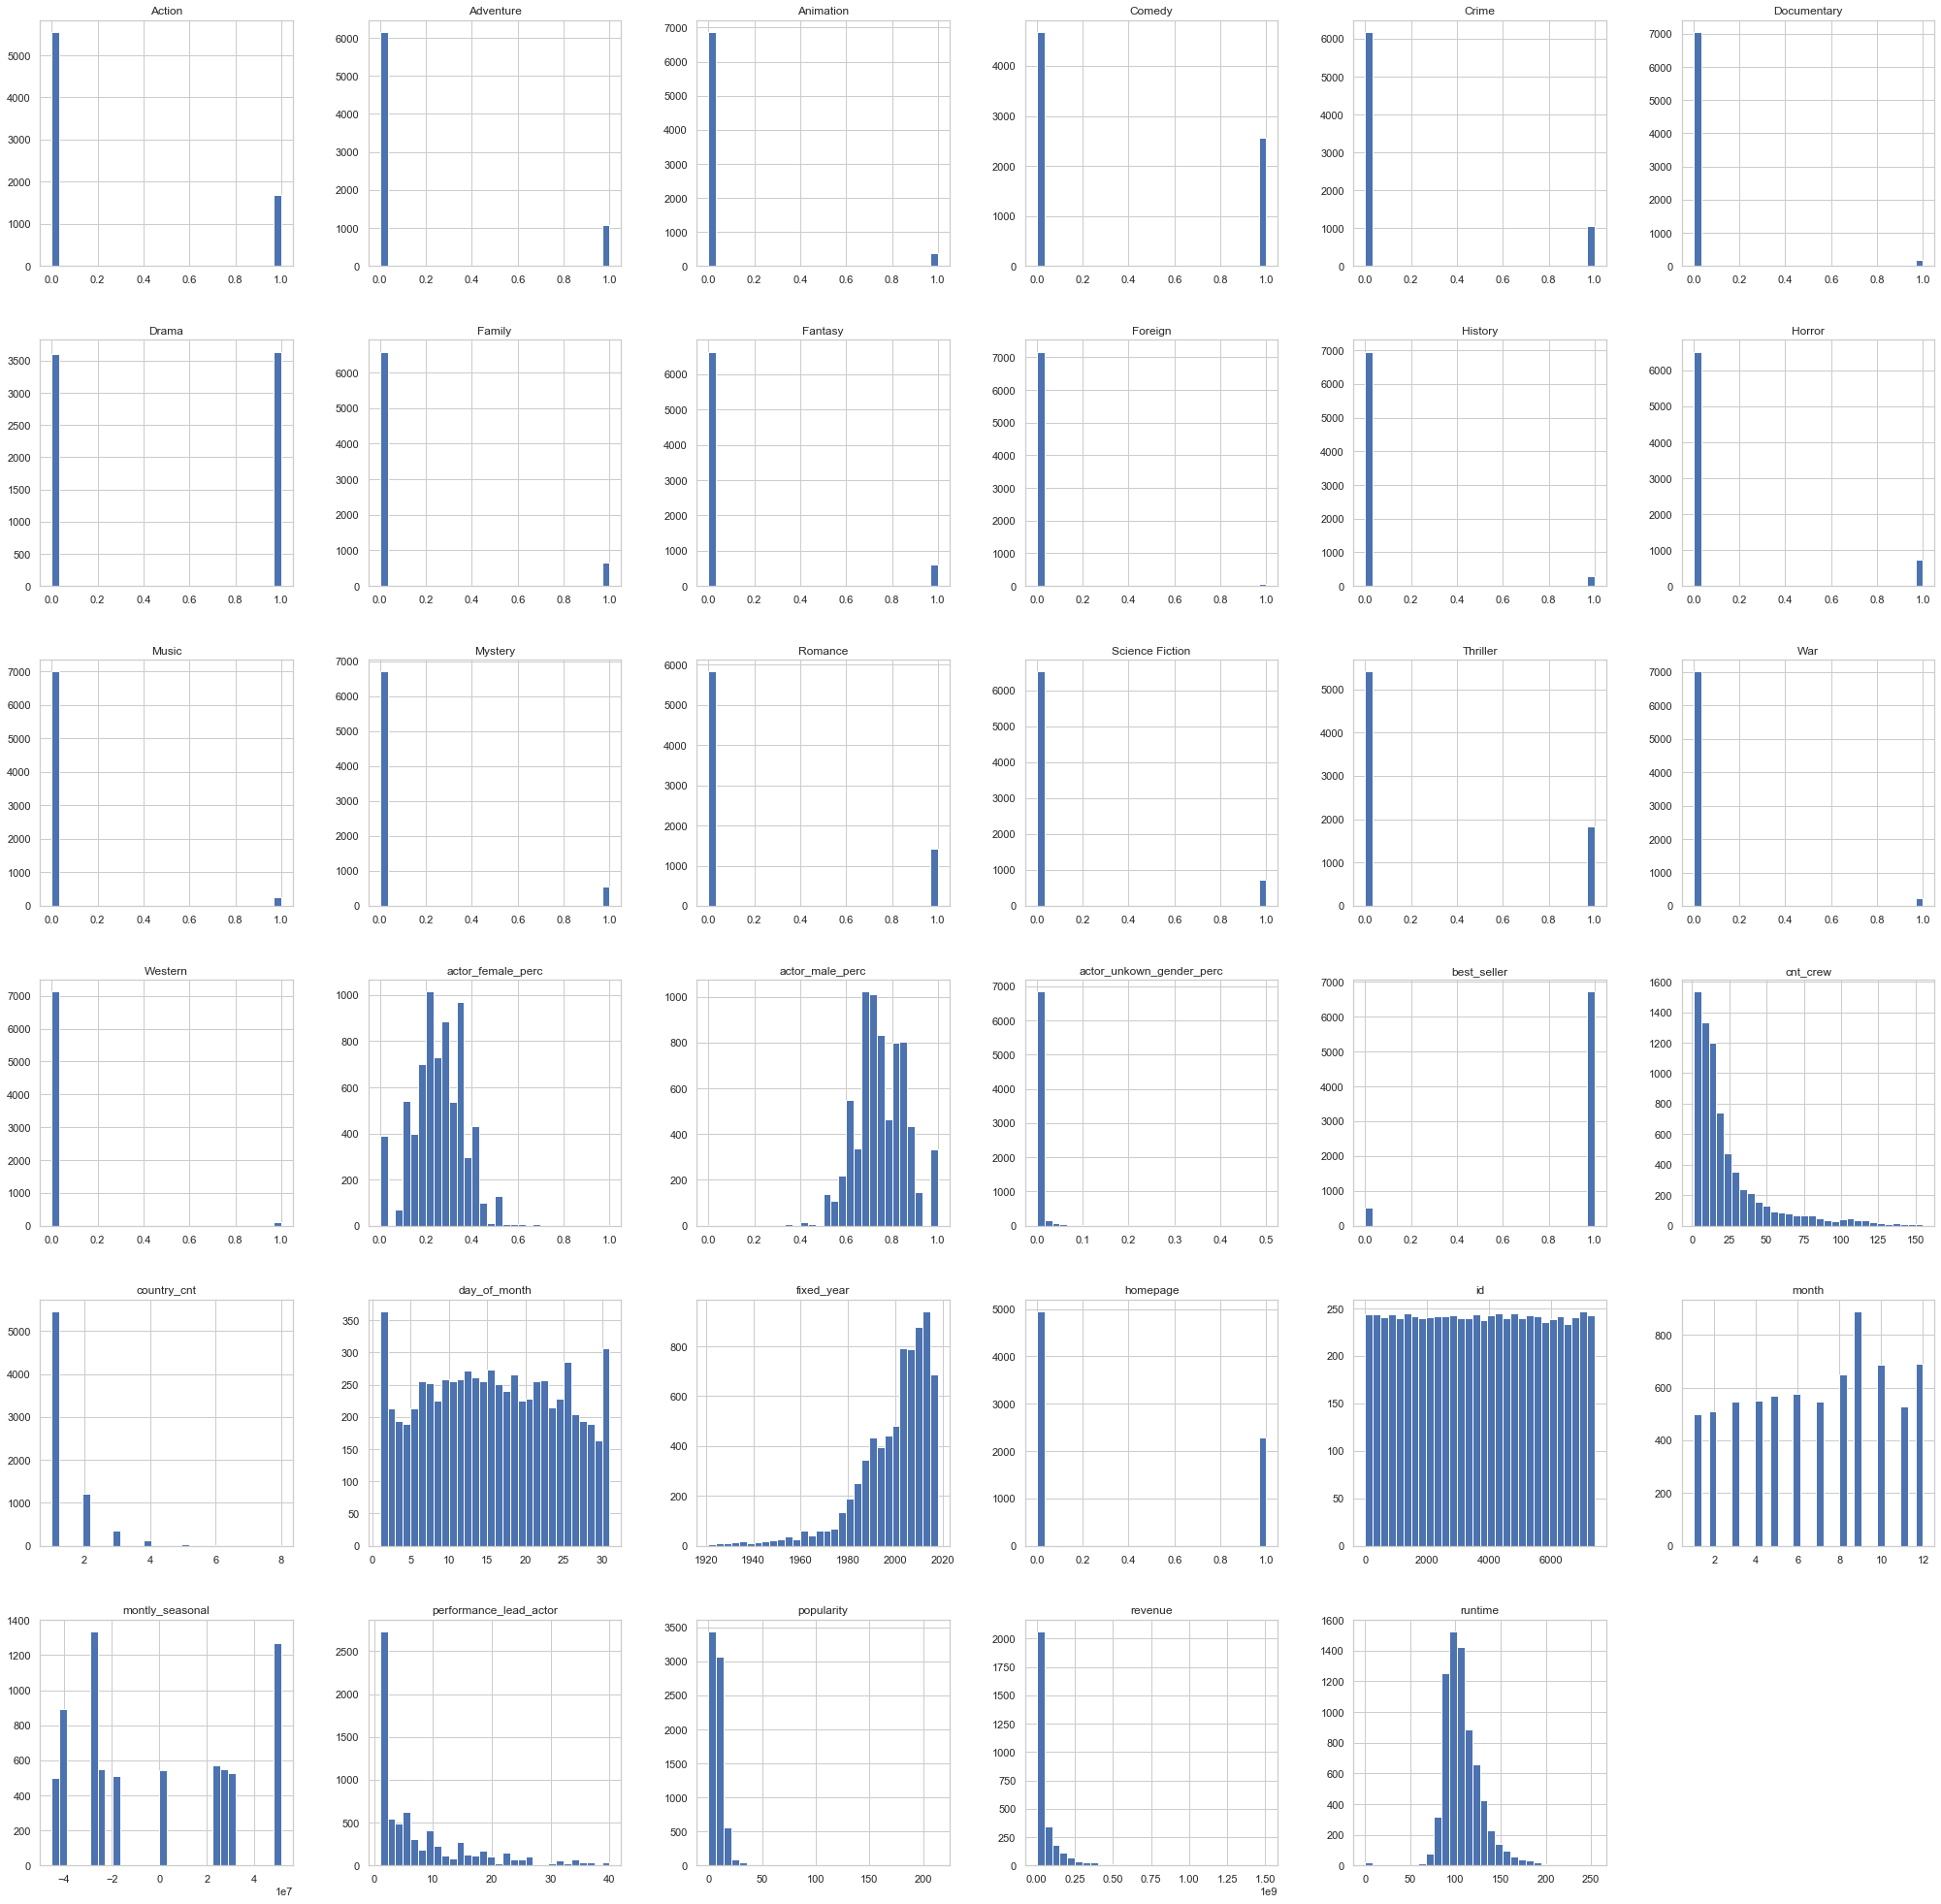

In [152]:
df_clean.hist(bins=30, figsize=(35, 35))

## 3- correlation matrix

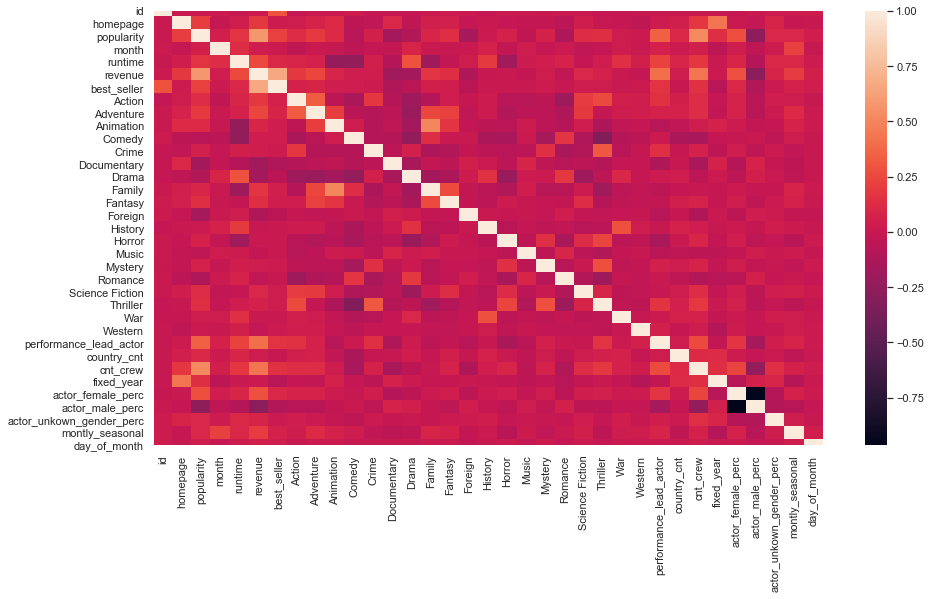

In [153]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df_clean.corr(method='spearman'))

In [154]:
corr = df_clean.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm', axis=None)

In [155]:
# dropping 'actor_male_perc' because there is high correlation to 'actor_female_perc'
df_clean.drop(['actor_male_perc'], axis=1, inplace=True)
df_clean.drop(['actor_unkown_gender_perc'], axis=1, inplace=True)
df_clean.head()

id  homepage  popularity popularity_cat  month  runtime     revenue  \
0   1       0.0    6.575393           High      2     93.0  12314651.0   
1   5       0.0    1.148070            Low      2    118.0   3923970.0   
2   9       0.0    6.902423           High      2    100.0  34327391.0   
3  19       0.0    6.496259           High      2     96.0   1749457.0   
4  45       1.0    5.615303         Medium      2     88.0  47175038.0   

   best_seller  Action  Adventure  ...  cnt_crew  fixed_year  \
0          1.0     0.0        0.0  ...      72.0        2015   
1          1.0     1.0        0.0  ...       2.0        2009   
2          1.0     1.0        1.0  ...       8.0        1996   
3          1.0     0.0        0.0  ...       2.0        2011   
4          1.0     0.0        0.0  ...      12.0        2005   

   fixed_release_date  budget_cat  language_cnt  actor_female_perc  \
0          2015-02-20      medium             1           0.312500   
1          2009-02-05           0             1           0.250000   
2          1996-02-16           0             1           0.375000   
3          2011-02-02      medium   more than 1           0.266667   
4          2005-02-04      medium             1           0.000000   

   orig_lang_reduced  day_of_week_name  montly_seasonal  day_of_month  
0                 en            Friday    -1.710743e+07            20  
1              other          Thursday    -1.710743e+07             5  
2                 en            Friday    -1.710743e+07            16  
3                 en         Wednesday    -1.710743e+07             2  
4                 en            Friday    -1.710743e+07             4  

[5 rows x 39 columns]

In [156]:
d_of_columns_types_local = get_dict_of_df_types(df_clean)
d_of_columns_types_local

{'int64': ['id', 'month', 'fixed_year', 'day_of_month'],
 'float64': ['homepage',
  'popularity',
  'runtime',
  'revenue',
  'best_seller',
  'Action',
  'Adventure',
  'Animation',
  'Comedy',
  'Crime',
  'Documentary',
  'Drama',
  'Family',
  'Fantasy',
  'Foreign',
  'History',
  'Horror',
  'Music',
  'Mystery',
  'Romance',
  'Science Fiction',
  'Thriller',
  'War',
  'Western',
  'performance_lead_actor',
  'country_cnt',
  'cnt_crew',
  'actor_female_perc',
  'montly_seasonal'],
 'category': ['popularity_cat', 'day_of_week_name'],
 'datetime64[ns]': ['fixed_release_date'],
 'object': ['budget_cat', 'language_cnt', 'orig_lang_reduced']}

In [157]:
numeric_columns_list = d_of_columns_types_local['float64']

df_numric_correlations = all_numric_correlations(df_clean,numeric_columns_list)
df_numric_correlations

var1               var2  correlation        pvalue
0             homepage         popularity     0.204663  2.059958e-69
1             homepage            runtime     0.041767  3.747180e-04
2             homepage            revenue     0.182878  1.404932e-23
3             homepage        best_seller     0.021922  6.197033e-02
4             homepage             Action     0.030028  1.056133e-02
..                 ...                ...          ...           ...
401        country_cnt  actor_female_perc     0.022794  5.229051e-02
402        country_cnt    montly_seasonal    -0.039381  7.968971e-04
403           cnt_crew  actor_female_perc     0.239965  1.768057e-95
404           cnt_crew    montly_seasonal     0.066630  1.357591e-08
405  actor_female_perc    montly_seasonal     0.066818  1.235417e-08

[406 rows x 4 columns]

### 4- Revenue - Target variable

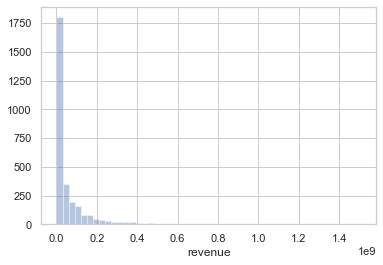

In [158]:
sns.distplot(df_clean['revenue'], kde=False, bins=50)

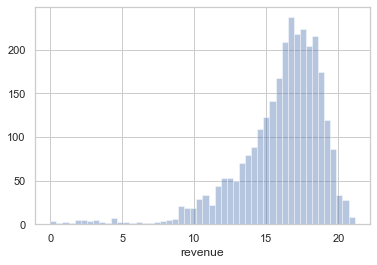

In [159]:
sns.distplot(np.log(df_clean['revenue']), kde=False, bins=50)

In [160]:
df_clean['revenue']=np.log(df_clean['revenue'])

In [161]:
category_cols = ['homepage', 'popularity_cat' , 'best_seller', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War','budget_cat', 'language_cnt', 'orig_lang_reduced',
       'Western']

for col in category_cols:
    df_clean[col] = df_clean[col].astype('category')

df_clean.dtypes

id                                 int64
homepage                        category
popularity                       float64
popularity_cat                  category
month                              int64
runtime                          float64
revenue                          float64
best_seller                     category
Action                          category
Adventure                       category
Animation                       category
Comedy                          category
Crime                           category
Documentary                     category
Drama                           category
Family                          category
Fantasy                         category
Foreign                         category
History                         category
Horror                          category
Music                           category
Mystery                         category
Romance                         category
Science Fiction                 category
Thriller        

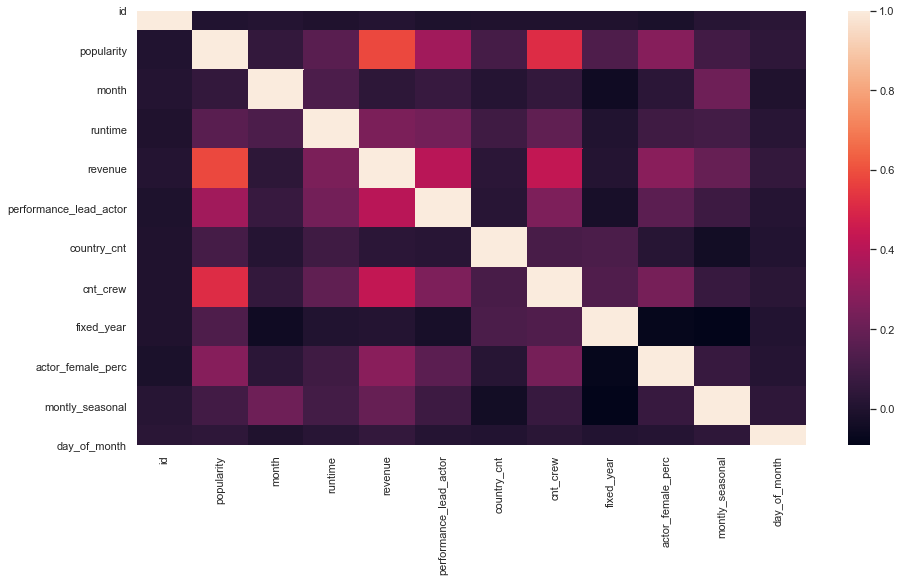

In [162]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df_clean.corr(method='spearman'))

In [163]:
corr = df_clean.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm', axis=None)

In [164]:
def get_dict_of_df_types(pdf):
    d_of_columns_types = {}

    for c,t in zip(pdf.columns, pdf.dtypes):
        t_str = str(t)
        if d_of_columns_types.get(t_str) == None:
            d_of_columns_types[t_str] = [c]
        else:
            d_of_columns_types[t_str].append(c)
    return d_of_columns_types


In [165]:
d_of_columns_types_local = get_dict_of_df_types(df_clean)
d_of_columns_types_local

{'int64': ['id', 'month', 'fixed_year', 'day_of_month'],
 'category': ['homepage',
  'popularity_cat',
  'best_seller',
  'Action',
  'Adventure',
  'Animation',
  'Comedy',
  'Crime',
  'Documentary',
  'Drama',
  'Family',
  'Fantasy',
  'Foreign',
  'History',
  'Horror',
  'Music',
  'Mystery',
  'Romance',
  'Science Fiction',
  'Thriller',
  'War',
  'Western',
  'budget_cat',
  'language_cnt',
  'orig_lang_reduced',
  'day_of_week_name'],
 'float64': ['popularity',
  'runtime',
  'revenue',
  'performance_lead_actor',
  'country_cnt',
  'cnt_crew',
  'actor_female_perc',
  'montly_seasonal'],
 'datetime64[ns]': ['fixed_release_date']}

In [166]:
category_values = {}
category_dfs = {}
for x in d_of_columns_types_local['category']:
    category_values[x] = df_clean[x].value_counts().to_dict()
    category_value_list = list(category_values[x].keys())
    category_count_list = list(category_values[x].values())
    category_dfs[x] = pd.DataFrame({x: category_value_list, "count":category_count_list })
    display( category_dfs[x])


homepage  count
0       0.0   4954
1       1.0   2296

popularity_cat  count
0         Superb   2722
1           High   1781
2            Low   1450
3         Medium   1297

best_seller  count
0          1.0   6722
1          0.0    528

Action  count
0     0.0   5557
1     1.0   1693

Adventure  count
0        0.0   6160
1        1.0   1090

Animation  count
0        0.0   6876
1        1.0    374

Comedy  count
0     0.0   4681
1     1.0   2569

Crime  count
0    0.0   6182
1    1.0   1068

Documentary  count
0          0.0   7057
1          1.0    193

Drama  count
0    1.0   3640
1    0.0   3610

Family  count
0     0.0   6589
1     1.0    661

Fantasy  count
0      0.0   6639
1      1.0    611

Foreign  count
0      0.0   7172
1      1.0     78

History  count
0      0.0   6960
1      1.0    290

Horror  count
0     0.0   6521
1     1.0    729

Music  count
0    0.0   6993
1    1.0    257

Mystery  count
0      0.0   6706
1      1.0    544

Romance  count
0      0.0   5829
1      1.0   1421

Science Fiction  count
0              0.0   6528
1              1.0    722

Thriller  count
0       0.0   5408
1       1.0   1842

War  count
0  0.0   7014
1  1.0    236

Western  count
0      0.0   7135
1      1.0    115

budget_cat  count
0             0   1973
1        medium   1693
2         large   1688
3         small   1372
4  missing_data    524

language_cnt  count
0             1   5138
1   more than 1   2058
2  missing_data     54

orig_lang_reduced  count
0                en   6222
1             other    546
2                fr    199
3                ru    102
4                es     92
5                ja     89

day_of_week_name  count
0           Friday   3193
1         Thursday   1404
2        Wednesday   1205
3          Tuesday    454
4         Saturday    393
5           Monday    309
6           Sunday    292

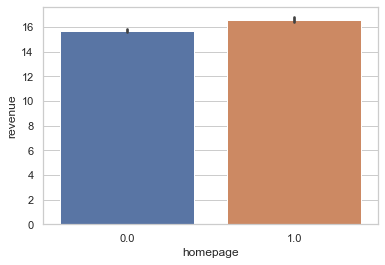

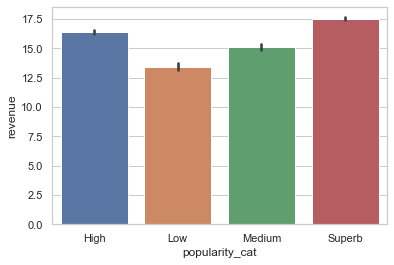

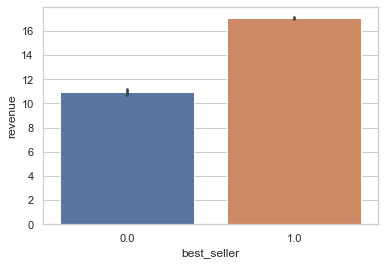

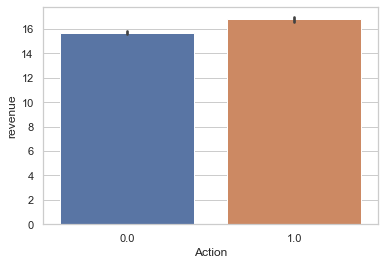

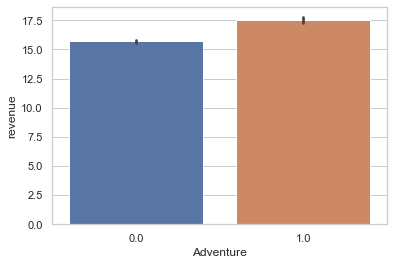

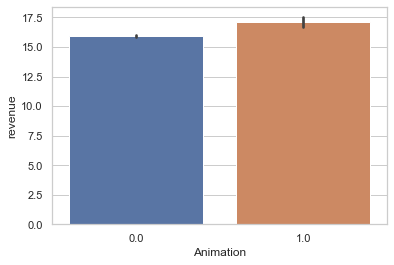

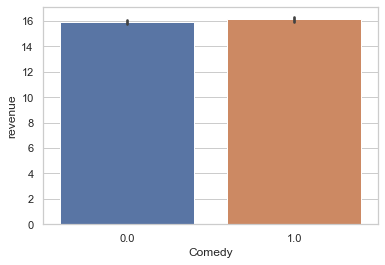

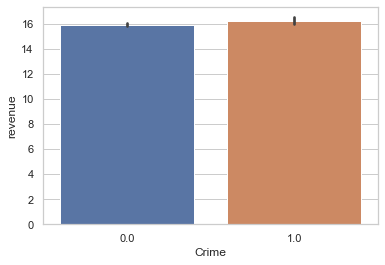

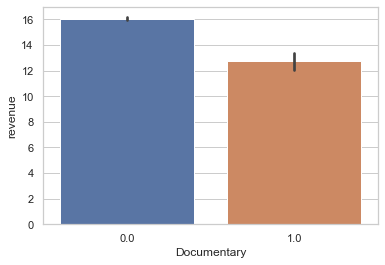

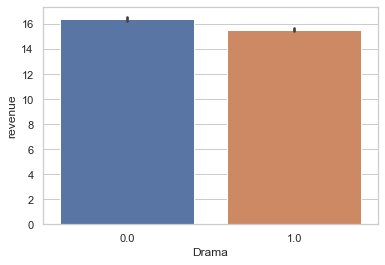

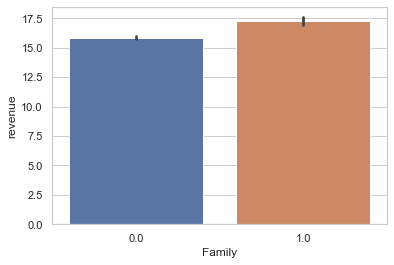

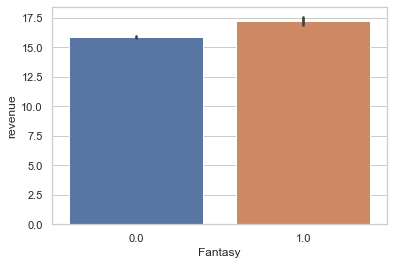

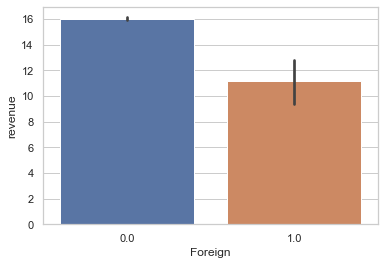

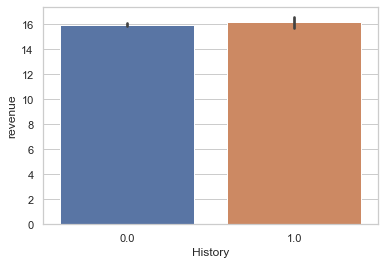

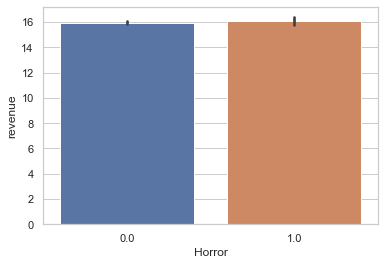

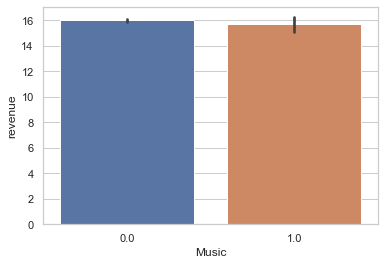

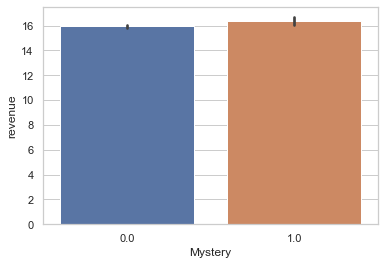

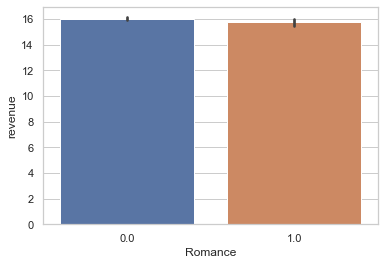

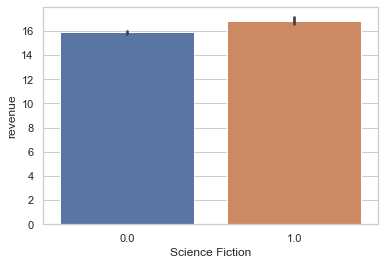

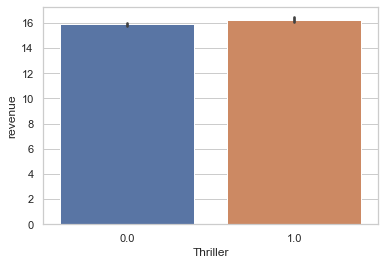

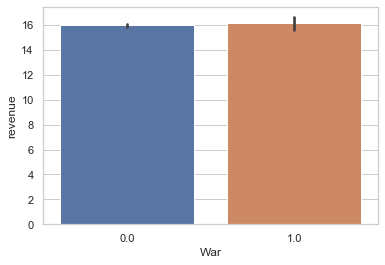

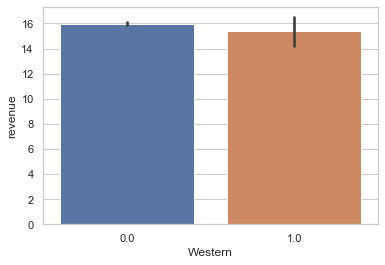

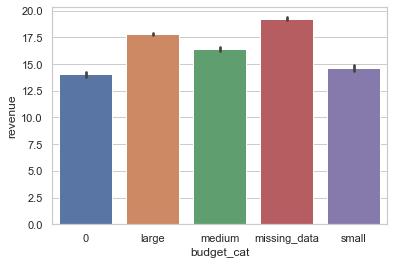

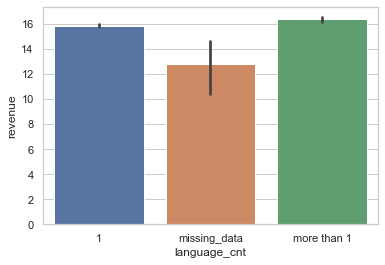

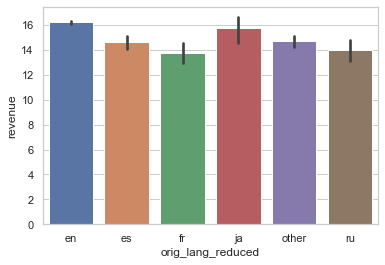

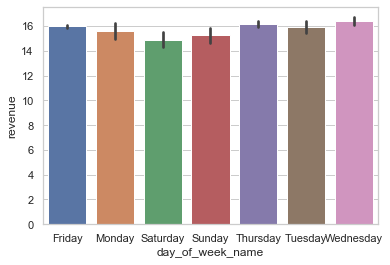

In [167]:
for x in d_of_columns_types_local['category']:
    plt.figure()
    sns.barplot(x=x, y='revenue', data=df_clean)

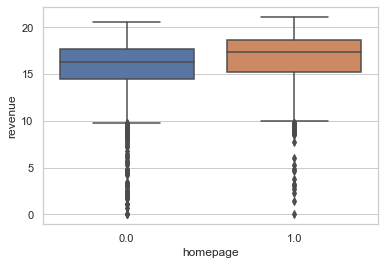

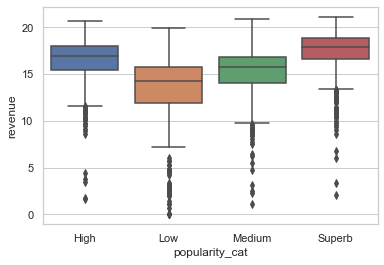

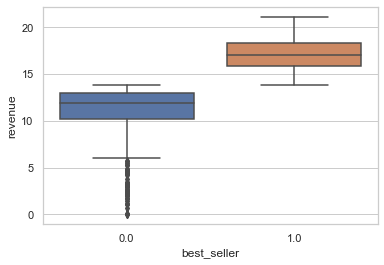

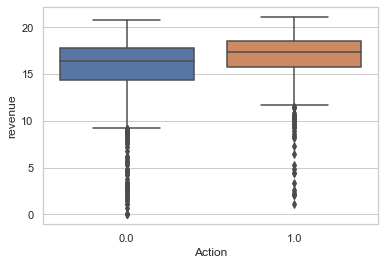

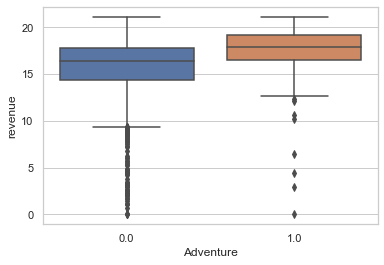

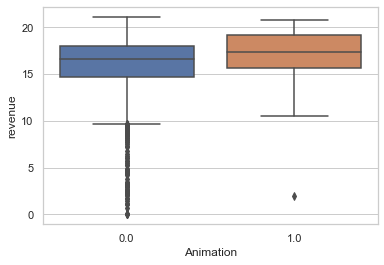

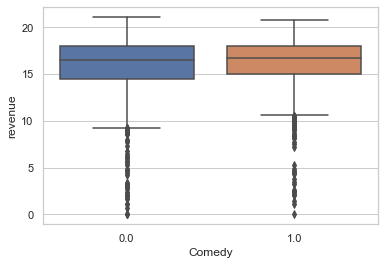

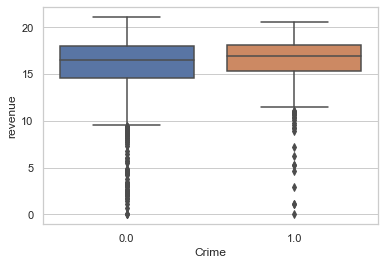

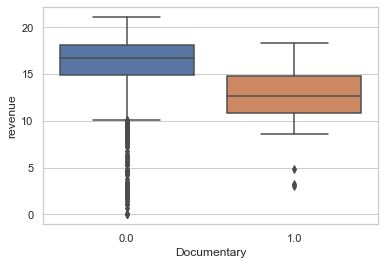

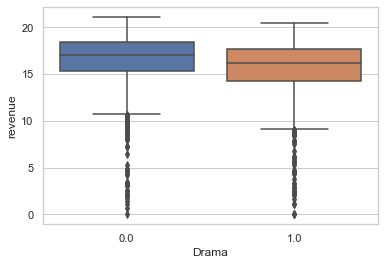

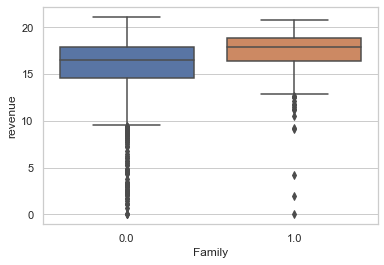

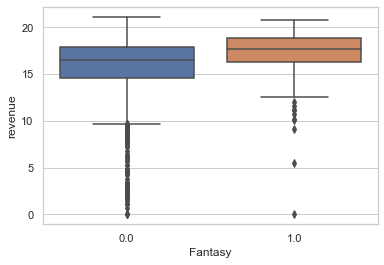

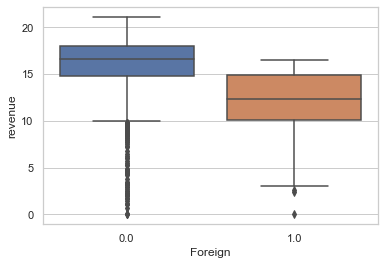

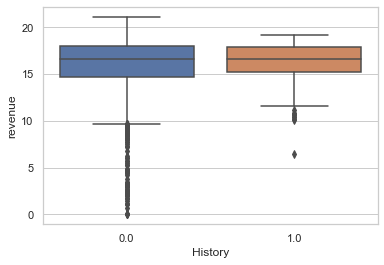

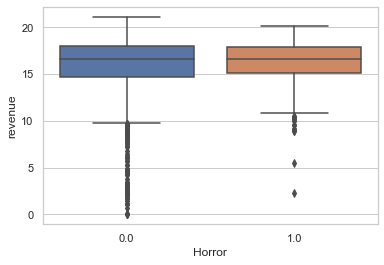

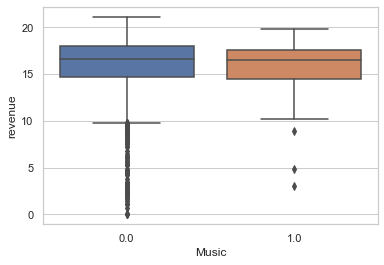

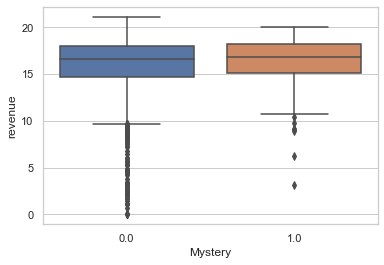

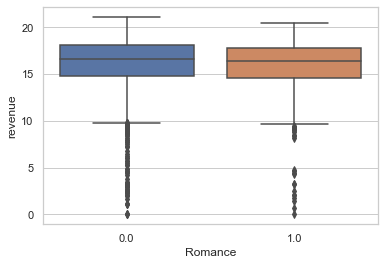

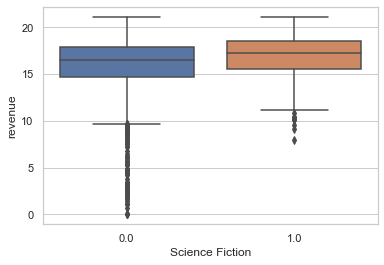

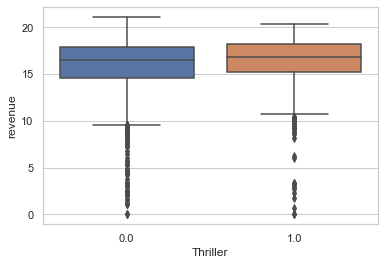

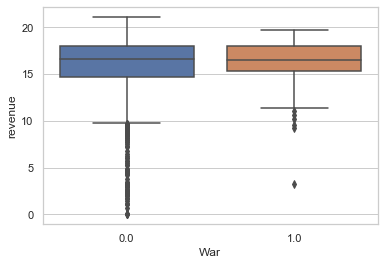

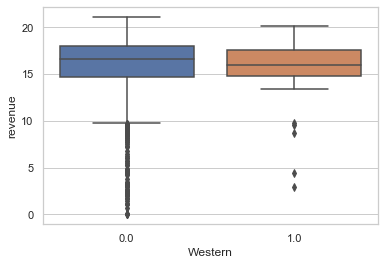

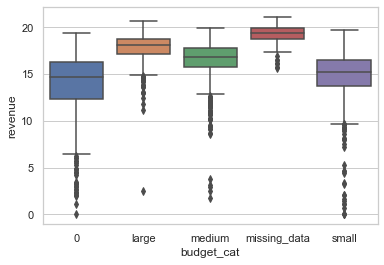

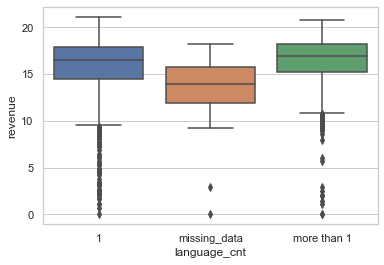

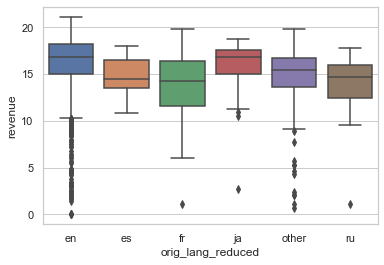

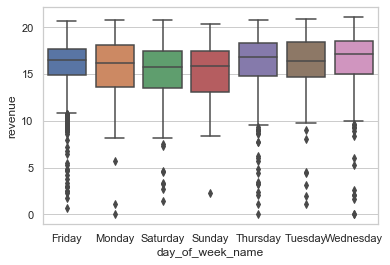

In [168]:
for x in d_of_columns_types_local['category']:
    plt.figure()
    sns.boxplot(x=x, y='revenue', data=df_clean)

### mann whitney u test

In [169]:
def my_mannwhitneyu(df, x, y):
    """
    
    """
    df_sub = df[[x,y]].dropna(axis=0, inplace=False)
    return stats.mannwhitneyu(df_sub[x],df_sub[y])


def all_categories_mannwhitneyu(df, ordinal_columns, y_target="revenue"):
    results_list = []
    for cat_col in ordinal_columns:
        mannwhitneyu_res = my_mannwhitneyu(df_movies, cat_col, y_target)
        res = {"x": cat_col, "y":y_target,"statistic":mannwhitneyu_res[0], "pvalue":mannwhitneyu_res[1]}
        results_list.append(res)
    df_results = pd.DataFrame(results_list)
    return df_results

In [170]:
ordinal_columns = ['homepage', 'Action', 'best_seller',
                   'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 
                   'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 
                   'Science Fiction', 'Thriller', 'War', 'Western']



df_categories_mannwhitneyu = all_categories_mannwhitneyu(df_clean, ordinal_columns, "revenue")
df_categories_mannwhitneyu

x        y  statistic  pvalue
0          homepage  revenue     1894.0     0.0
1            Action  revenue     1482.0     0.0
2       best_seller  revenue     4902.0     0.0
3         Adventure  revenue      878.0     0.0
4         Animation  revenue      282.0     0.0
5            Comedy  revenue     2056.0     0.0
6             Crime  revenue      938.0     0.0
7       Documentary  revenue      174.0     0.0
8             Drama  revenue     3064.0     0.0
9            Family  revenue      520.0     0.0
10          Fantasy  revenue      464.0     0.0
11          Foreign  revenue       62.0     0.0
12          History  revenue      264.0     0.0
13           Horror  revenue      602.0     0.0
14            Music  revenue      200.0     0.0
15          Mystery  revenue      450.0     0.0
16          Romance  revenue     1144.0     0.0
17  Science Fiction  revenue      580.0     0.0
18         Thriller  revenue     1578.0     0.0
19              War  revenue      200.0     0.0
20          Western  revenue       86.0     0.0

### 5- Checking for outliers

In [171]:
d_of_columns_types_local['float64']

['popularity',
 'runtime',
 'revenue',
 'performance_lead_actor',
 'country_cnt',
 'cnt_crew',
 'actor_female_perc',
 'montly_seasonal']

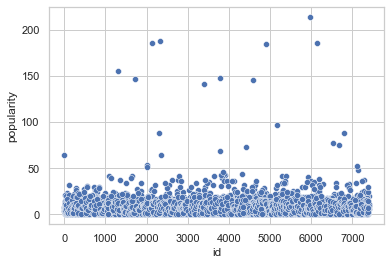

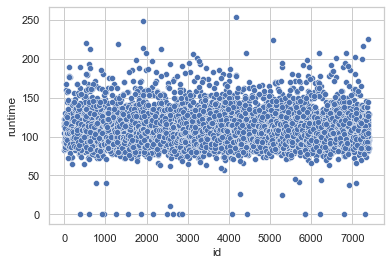

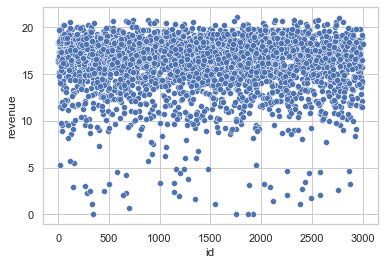

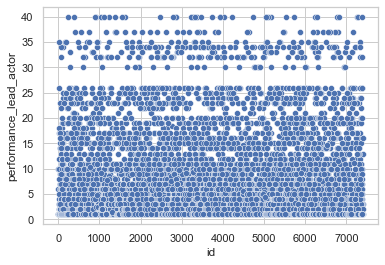

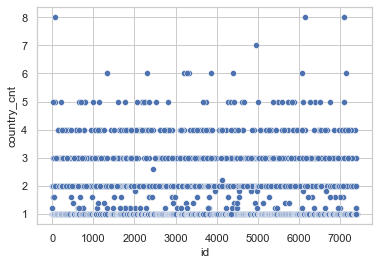

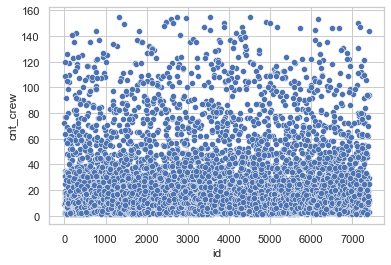

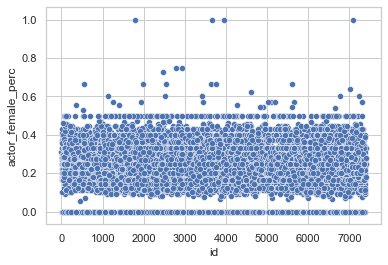

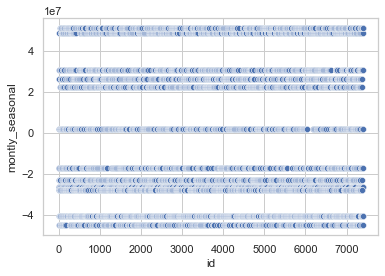

In [172]:
for x in d_of_columns_types_local['float64']:
    plt.figure()
    sns.scatterplot(data=df_clean, x="id", y=x, palette="deep")

### 6- Checking the Missing Mechanisms

In [173]:
print(df_clean.isnull().sum())

id                           0
homepage                     0
popularity                   0
popularity_cat               0
month                        0
runtime                      0
revenue                   4303
best_seller                  0
Action                       0
Adventure                    0
Animation                    0
Comedy                       0
Crime                        0
Documentary                  0
Drama                        0
Family                       0
Fantasy                      0
Foreign                      0
History                      0
Horror                       0
Music                        0
Mystery                      0
Romance                      0
Science Fiction              0
Thriller                     0
War                          0
Western                      0
performance_lead_actor       0
country_cnt                  0
cnt_crew                     0
fixed_year                   0
fixed_release_date           0
budget_c

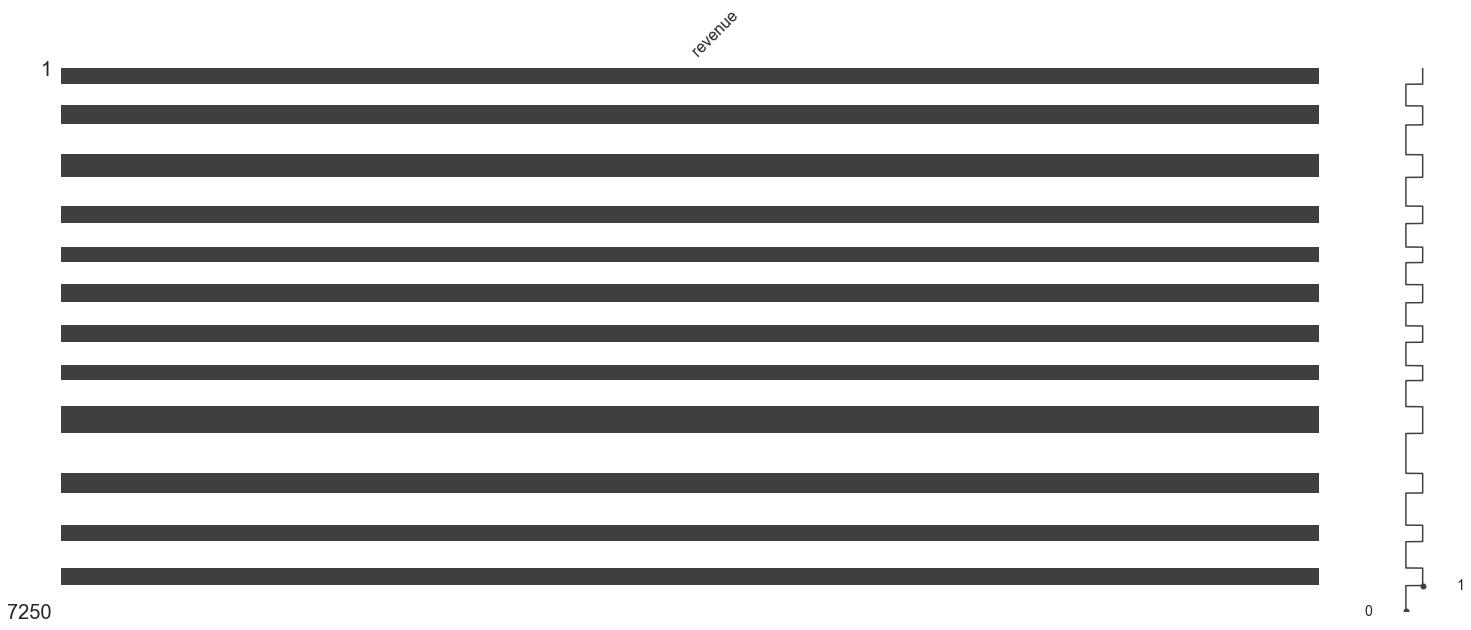

In [174]:
import missingno as msno

### plot the missingness (nullity) matrix
missingdata_df = df_clean.columns[df_clean.isnull().any()].tolist()
msno.matrix(df_clean[missingdata_df])

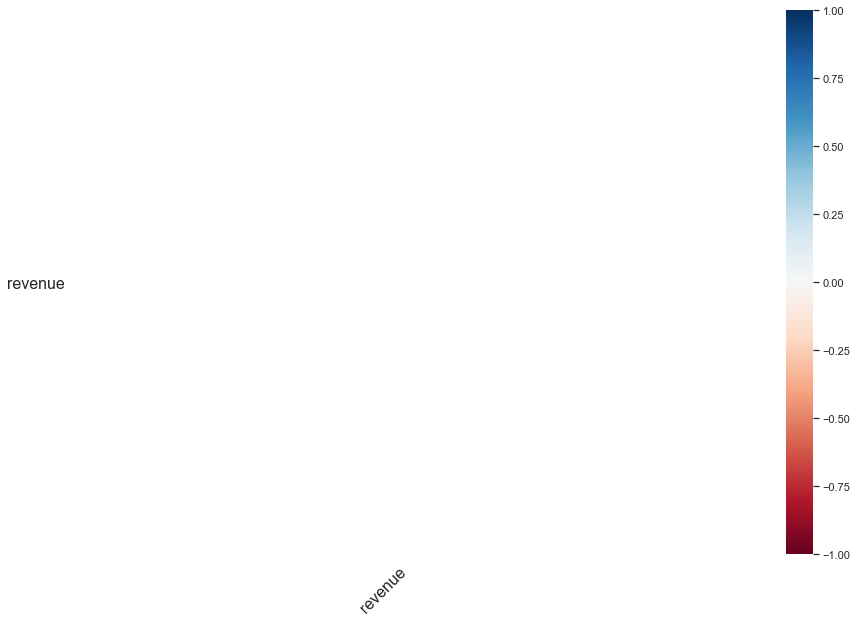

In [175]:
## missingness correlation heatmap

msno.heatmap(df_clean[missingdata_df], figsize=(15,10))

# The end